In [1]:
# ----------------------------------------------------------------------------------------------------------
# Instructions to run this notebook using ROOT, on LPNATLAS.
#   pip install jupyter
#   pip install metakernel
#   root --notebook
#   Copy the link from the server into Notebook existing server window, while selecting another kernel.
#   voilà !
# ! . /cvmfs/sft.cern.ch/lcg/app/releases/ROOT/6.24.08/x86_64-centos7-gcc48-opt/bin/thisroot.sh
# -----------------------------------------------------------------------------------------------------------
%load_ext autoreload
%autoreload 2

import numpy as np
from glob import glob
import math
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Agg') #CHANGES THE MATPLOTLIB BACKEND FOR LOOP PLOTS
import os

import ROOT
from ROOT import TCanvas, TPad, TH1F,TH2F,TH3F, TH1I, TFile,TLine,TGraph, TGraph2D, TGraphErrors, gStyle, THStack
from ROOT import TLatex, gPad, TLegend
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure

# %jsroot on # activate java script display (interactive mode)

# import json
import sys

import uproot
uprootLibrary = 'np'#'np' #'ak'
import mplhep as hep
plt.style.use([hep.style.ATLAS])

# --------- Lorenzetti plot style -------
def lorenzettiText(pos='out',subText=' Internal'):
    lorenzetti_title={'fontsize': 21, 'fontfamily': 'sans-serif', 'fontweight':'bold','fontstyle':'italic'}
    lorenzetti_subtitle={'fontsize': 14, 'fontfamily': 'sans-serif', 'fontweight':'normal','fontstyle':'italic'}

    if pos=='out':
        plt.figtext(x=.18   ,y=.945,s='Lorenzetti',fontdict=lorenzetti_title)
        plt.figtext(x=.318  ,y=.945,s=subText,fontdict=lorenzetti_subtitle)
    if pos=='in':
        plt.figtext(x=.18   ,y=.875,s='Lorenzetti',fontdict=lorenzetti_title)
        plt.figtext(x=.318  ,y=.875,s=subText,fontdict=lorenzetti_subtitle)

def conditionsText(conditions, pos='in'):
    # lorenzetti_title={'fontsize': 21, 'fontfamily': 'sans-serif', 'fontweight':'bold','fontstyle':'italic'}
    lorenzetti_subtitle={'fontsize': 12, 'fontfamily': 'sans-serif', 'fontweight':'normal','fontstyle':'italic'}
    
    subText = ''
    for key,value in conditions.items():
        subText = subText + str(key)+' '+str(value)+'\n'

    if pos=='out':
        plt.figtext(x=.318  ,y=.945,s=subText,fontdict=lorenzetti_subtitle)
    if pos=='in':
        plt.figtext(x=.2  ,y=.6,s=subText,fontdict=lorenzetti_subtitle)

# --------- Lorenzetti sampling and detector enumeration ---------
class Detector():
  LAR     = 0
  TILE    = 1
  TTEM    = 2
  TTHEC   = 3
  FCALEM  = 5
  FCALHAD = 6

class CaloSampling():
    PSB       = 0
    PSE       = 1
    EMB1      = 2
    EMB2      = 3
    EMB3      = 4
    TileCal1  = 5
    TileCal2  = 6
    TileCal3  = 7
    TileExt1  = 8
    TileExt2  = 9
    TileExt3  = 10
    EMEC1     = 11
    EMEC2     = 12
    EMEC3     = 13
    HEC1      = 14
    HEC2      = 15
    HEC3      = 16

Welcome to JupyROOT 6.24/08


# Comparison Cross-Talk

## 1 - varying XTL and XTC % (pyROOT)

In [ ]:
# reading the input
filename = "JetGraphs.root"

# Get the TTree inside it with uproot.
# the TTree is named gnnjet :
tree = uproot.open(filename+":gnnjet")

features = ['cst_E', 'cst_rap', 'cst_phi', 'cst_taste',  'cst_center_lambda', 'cst_isolation', 'cst_pos_energyFrac', 'cst_emproba', 'cst_second_lambda', 'cst_center_mag', 'cst_em3Frac', 'cst_emFrac', 'cst_tile0Frac']
nFeatures = len(features)
edges = ['cst_recieverI', 'cst_senderI',]
targets = ['jet_true_E']
auxVars = ['jet_nconstit', 'jet_numEdges', 'jet_E']

#load all the above branches
arrays = tree.arrays(features+edges+targets+auxVars)

# list of all loaded branches :
arrays.fields


In [80]:
# tree.key(key)
# hist = tree.key(key)

tree.classnames()
# tree["cl_e"].to_numpy()
# tree["cl_e"].errors()

{'cl_e;1': 'TH1F',
 'cl_et;1': 'TH1F',
 'cl_eta;1': 'TH1F',
 'cl_phi;1': 'TH1F',
 'cl_f1;1': 'TH1F',
 'cl_f3;1': 'TH1F',
 'cl_weta2;1': 'TH1F',
 'cl_reta;1': 'TH1F',
 'cl_rphi;1': 'TH1F',
 'cl_rhad;1': 'TH1F',
 'cl_eratio;1': 'TH1F',
 'res_eta;1': 'TH1F',
 'res_phi;1': 'TH1F',
 'res_e;1': 'TH1F',
 'res_et;1': 'TH1F'}

In [122]:
a = tree['cl_weta2']
# plt.hist(a.axis().edges())
a.to_pyroot()

(array([62., 10.,  3.,  3.,  2.,  3.,  1.,  5.,  1., 10.]),
 array([   0. ,  144.1,  288.2,  432.3,  576.4,  720.5,  864.6, 1008.7,
        1152.8, 1296.9, 1441. ], dtype=float32),
 <BarContainer object of 10 artists>)

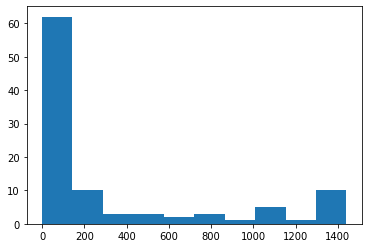

In [121]:
a = tree['cl_weta2']
# a.to_numpy()
# plt.plot(a.axis().edges()[:-1],a.values())
plt.hist(a.counts())

# plt.hist()
# a.to_hist()

In [48]:
a.all_members

{'@fUniqueID': 0,
 '@fBits': 50331656,
 'fName': 'cl_e',
 'fTitle': '',
 'fLineColor': 602,
 'fLineStyle': 1,
 'fLineWidth': 1,
 'fFillColor': 0,
 'fFillStyle': 1001,
 'fMarkerColor': 1,
 'fMarkerStyle': 1,
 'fMarkerSize': 1.0,
 'fNcells': 102,
 'fXaxis': <TAxis (version 10) at 0x7f980f9f4c18>,
 'fYaxis': <TAxis (version 10) at 0x7f980f9f4048>,
 'fZaxis': <TAxis (version 10) at 0x7f980f9f4438>,
 'fBarOffset': 0,
 'fBarWidth': 1000,
 'fEntries': 40422.0,
 'fTsumw': 34395.0,
 'fTsumw2': 34395.0,
 'fTsumwx': 2533724.8983496097,
 'fTsumwx2': 258279924.15361375,
 'fMaximum': -1111.0,
 'fMinimum': -1111.0,
 'fNormFactor': 0.0,
 'fContour': <TArrayD [] at 0x7f980f9f4780>,
 'fSumw2': <TArrayD [] at 0x7f980f9f4898>,
 'fOption': <TString '' at 0x7f98318e2b10>,
 'fFunctions': <TList of 0 items at 0x7f980f9f4978>,
 'fBufferSize': 0,
 'fBuffer': array([], dtype=float64),
 'fBinStatErrOpt': 0,
 'fStatOverflows': 2,
 'fN': 102}

In [41]:
gPad.GetY2()

2931.8625242711987

In [43]:
eventTypes          = ['Zee']
histFolders         = ['Clusters', 'XTClusters']

path_aod_lorenzetti = '/home/mhufnage/lorenzetti/fork_lzt_new/run/'
xtFile = path_aod_lorenzetti+'ZeeAllEvts_0.1Ind_0.1cap_XT/AOD/Zee.AOD.root'
tree = uproot.open(xtFile+":Expert/XTClusters")
keys = tree.keys()[0:11]

xt_amplitude = [0.1, 5.0, 10.0]
colors = [1,2,3]

for eventType in eventTypes:
    for key in keys:
        # fig = plt.figure()
        c = TCanvas("canvas_"+tree[key].to_pyroot().GetName(),"", 200,10,1400,900)
        legend = TLegend (0.7 ,0.6 ,0.85 ,0.75)

        # no XT plot #---------------------------
        xtFile = path_aod_lorenzetti+'{}AllEvts_{}Ind_{}cap_XT/AOD/Zee.AOD.root'.format(eventType, 0.1, 0.1)
        tree = uproot.open(xtFile+":Expert/Clusters")
        h1NoXT = tree[key].to_pyroot()
        h1NoXT.SetStats(0)
        h1NoXT.Draw('same H')
        h1NoXT.SetLineColor(4)
        yAxisName = h1NoXT.GetXaxis().GetTitle()
        xAxisName = h1NoXT.GetYaxis().GetTitle()
        h1NoXT.GetXaxis().SetTitle( xAxisName )
        h1NoXT.GetYaxis().SetTitle( yAxisName )
        legend . SetLineWidth (0)
        legend . AddEntry ( h1NoXT , " No XT ")
        #---------------------------

        for index, xtl in enumerate(xt_amplitude):
                for xtc in [5.0]:
                        xtFile = path_aod_lorenzetti+'{}AllEvts_{}Ind_{}cap_XT/AOD/Zee.AOD.root'.format(eventType, xtl, xtc)
                        tree = uproot.open(xtFile+":Expert/XTClusters")

                        h1XT = tree[key].to_pyroot()
                        # print(xtl,xtc,key)
                        
                        hName = h1XT.GetName()
                        if hName[0:3] == 'res':
                                continue
                        
                        # hNoXT = aod_xt.Get('Expert/Clusters/'+hName)
                        # h1XT = aod_xt.Get('Expert/XTClusters/'+hName)

                        # c = TCanvas("canvas_"+hName)
                        # c.Divide(1,2,0.01,0.01)
                        # c.cd(1)
                        
                        yAxisName = h1XT.GetXaxis().GetTitle()
                        xAxisName = h1XT.GetYaxis().GetTitle()
                                                
                        # XT 1GeV
                        # if (hName!='cl_eratio'):
                        h1XT.SetStats(0)
                        
                        # h1XT.Draw('same H')
                        # h1XT.SetMinimum()
                        # c.Update()
                        h1XT.SetLineColor(colors[index])
                        # Revert axis label (they are wrong)                    
                        h1XT.GetXaxis().SetTitle( xAxisName )
                        h1XT.GetYaxis().SetTitle( yAxisName )
                        gPad.cd()
                        h1XT.GetYaxis().SetLimits(0.,10000)
                        h1XT.Draw('same H')
                        # gPad.DrawFrame(xmin,ymin,xmax,ymax)
                        
                        # print(c.GetXaxis().GetTitle(), c.GetYaxis().GetTitle())
                                        
                        # XT 1MeV
                #                     h1MeVXT.Draw('pe,same')
                #                     h1MeVXT.SetLineColor(kBlack)
                        
                        # RATIO
                #                     pad2.Draw()
                #                     pad2.cd()
                        # c.cd(2)
                        # hRatio.Divide(h1XT)#(h1MeVXT)#
                        # hRatio.GetYaxis (). SetTitle ( " No XT / XT " )
                        # hRatio.Draw('pe')
                        
                        # c.cd(1)
                        # legend = TLegend (0.7 ,0.6 ,0.85 ,0.75)
                        # legend = TLegend()
                        # legend . AddEntry ( hNoXT , " No XT " )
                        legend . AddEntry ( h1XT , " cap{}_ind{} ".format(xtc,xtl))
                        legend . SetLineWidth (0)
                        # legend . Draw ( " same " )
        h1XT.SetMaximum()
        latex = ROOT . TLatex ()
        latex . SetNDC ()
        latex . SetTextSize (0.06)
        latex . DrawText (0.7 ,0.83 , " Lorenzetti" )
        latex . SetTextSize (0.04)
        latex . DrawText (0.7 ,0.77 , " CrossTalk - {} events ".format(eventType) )
        legend . Draw ( " same H" )
        c.Print('Plots_lorenzetti/test00_'+hName+'_'+eventType+'.pdf')


Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_e_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_et_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_eta_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_phi_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_f1_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_f3_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_weta2_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_reta_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_rphi_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_rhad_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/test00_cl_eratio_Zee.pdf has been crea

## 2 - varying XTL and XTC % (mplhep)

In [129]:
import mplhep as hep
plt.style.use([hep.style.ATLAS])



eventTypes          = ['Zee']
histFolders         = ['Clusters', 'XTClusters']

path_aod_lorenzetti = '/home/mhufnage/lorenzetti/fork_lzt_new/run/'
xtFile = path_aod_lorenzetti+'ZeeAllEvts_0.1Ind_0.1cap_XT/AOD/Zee.AOD.root'
tree = uproot.open(xtFile+":Expert/XTClusters")
keys = tree.keys()[0:11]

xt_amplitude_ind = [5.0, 10.0]
xt_amplitude_cap = [.1, 10.0]
colors = [1,2,3]

for eventType in eventTypes:
    for key in keys:
        # fig = plt.figure()
        # c = TCanvas("canvas_"+tree[key].to_pyroot().GetName(),"", 200,10,1400,900)
        # legend = TLegend (0.7 ,0.6 ,0.85 ,0.75)
        fig,ax = plt.subplots(figsize=(10,5))

        # no XT plot #---------------------------
        xtFile = path_aod_lorenzetti+'{}AllEvts_{}Ind_{}cap_XT/AOD/Zee.AOD.root'.format(eventType, 0.1, 0.1)
        tree = uproot.open(xtFile+":Expert/Clusters")

        h1NoXT = tree[key]

        hep.histplot(h1NoXT , 
                     histtype='fill',
                #      bins=bins,
                     color="b",
                     alpha=0.3,
                     edgecolor="black",
                     label="no XT",
                     ax=ax,
                     )
        
        #---------------------------

        for index, xtl in enumerate(xt_amplitude_ind):
                for xtc in xt_amplitude_cap:
                        xtFile = path_aod_lorenzetti+'{}AllEvts_{}Ind_{}cap_XT/AOD/Zee.AOD.root'.format(eventType, xtl, xtc)
                        xttree          = uproot.open(xtFile+":Expert/XTClusters")

                        h1XT = xttree[key]#.plot()
                        
                        hName = tree[key].to_pyroot().GetName()
                        if hName[0:3] == 'res':
                                continue
                        
                        hep.histplot(h1XT, histtype='step',label="cap{}_ind{} ".format(xtc,xtl))

        yAxisName = r'{}'.format(h1XT.to_pyroot().GetXaxis().GetTitle()).replace('#','\\')
        xAxisName = r'{}'.format(h1XT.to_pyroot().GetYaxis().GetTitle()).replace('#','\\')
        lorenzettiText(pos='out')
        ax.legend()
        
        if hName=='cl_e':
              xAxisName = 'E [GeV]'
        if hName=='cl_et':
              xAxisName=xAxisName+' [GeV]'
        ax.set_xlabel(r'$'+xAxisName+'$')
        ax.set_ylabel(r'$'+yAxisName+'$')
        plt.savefig(fname='Plots_lorenzetti/ssXTalkComparison_'+hName+'_'+eventType+'.png')
        # plt.show()
        # break
        # hep.savelabels('Plots_lorenzetti/test01_'+hName+'_'+eventType+'.pdf')
        plt.close()


(exptext: Custom Text(0.05, 0.95, 'ATLAS'),
 expsuffix: Custom Text(0.05, 0.955, 'Preliminary'))

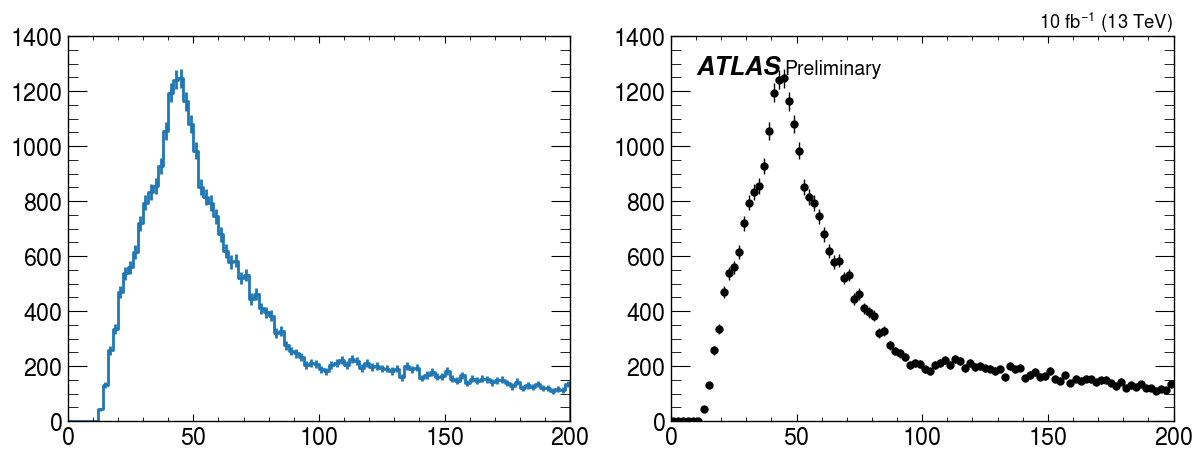

In [97]:
import mplhep as hep
plt.style.use([hep.style.ATLAS])
# plt.style.use([hep.style.fira])
# h1NoXT = tree[key].to_numpy()
h1NoXT = tree[key]

f, axs = plt.subplots(1,2, figsize=(14,5))
hep.histplot(h1NoXT , ax=axs[0] , histtype='step')
# hep.fira.label()
hep.histplot(h1NoXT , ax=axs[1], yerr=True , histtype='errorbar', c='black')
# hep.histplot(h1NoXT[0]*1.7, h1NoXT[1] , ax=axs[0] , histtype='step')
hep.atlas.label(data=True, paper=False, lumi=10,loc=1)
# hep.
# print(hep.style.ATLAS)

In [145]:
# tree.classnames()
tree["cl_weta2"].to_hist()
tree["cl_rhad"].to_hist()

Hist(Regular(200, -0.05, 0.05, name='xaxis', label='Count'), storage=Double()) # Sum: 38858.0 (40427.0 with flow)

## 2 - on Shower shapes

In [44]:
eventTypes          = ['Zee', 'electron']
# histFolders         = ['Clusters', 'XTClusters']

path_aod_lorenzetti = '/home/mhufnage/lorenzetti/fork_lzt_new/run/'

for eventType in eventTypes:
    # noxtFile            = path_aod_lorenzetti+'{}25000Evts/AOD/Zee.AOD.root'.format(eventType)
    xtFile              = path_aod_lorenzetti+'{}25000Evts_XT_recoPlugged/AOD/Zee.AOD.root'.format(eventType)

    # for folder in histFolders:
    aod_xt      = TFile.Open(xtFile)
    for hists in aod_xt.Get('Expert/Clusters').GetListOfKeys():
        hName = hists.GetName()
        if hName[0:3] == 'res':
            continue
        print(hists.GetName())

        hNoXT = aod_xt.Get('Expert/Clusters/'+hName)
        h1XT = aod_xt.Get('Expert/XTClusters/'+hName)

        c = TCanvas("canvas_"+hName)
        c.Divide(1,2,0.01,0.01)
        c.cd(1)
        
        yAxisName = h1XT.GetXaxis().GetTitle()
        xAxisName = h1XT.GetYaxis().GetTitle()
        
        # NO XT
        hNoXT.SetLineColor(kRed)
        hRatio = hNoXT.Clone()
#                     pad1.Draw()
#                     pad1.cd()
        hNoXT . Scale ( h1XT . Integral ()/ hNoXT . Integral ())
        hNoXT.SetStats(0)
            # Revert axis label (they are wrong)     
        hNoXT.GetXaxis().SetTitle( xAxisName )
        hNoXT.GetYaxis().SetTitle( yAxisName )
        hNoXT.Draw()
        
        # XT 1GeV
        # if (hName!='cl_eratio'):
        h1XT.SetStats(0)
        h1XT.Draw('pe,same')
        h1XT.SetLineColor(kBlue)
            # Revert axis label (they are wrong)                    
        h1XT.GetXaxis().SetTitle( xAxisName )
        h1XT.GetYaxis().SetTitle( yAxisName )
        # print(c.GetXaxis().GetTitle(), c.GetYaxis().GetTitle())
                            
        # XT 1MeV
#                     h1MeVXT.Draw('pe,same')
#                     h1MeVXT.SetLineColor(kBlack)
        
        # RATIO
#                     pad2.Draw()
#                     pad2.cd()
        c.cd(2)
        hRatio.Divide(h1XT)#(h1MeVXT)#
        hRatio.GetYaxis (). SetTitle ( " No XT / XT " )
        hRatio.Draw('pe')
        
        c.cd(1)
        legend = TLegend (0.7 ,0.6 ,0.85 ,0.75)
        legend . AddEntry ( hNoXT , " No XT " )
        legend . AddEntry ( h1XT , " With XT (1 GeV Threshold) " )
        legend . SetLineWidth (0)
        legend . Draw ( " same " )
        
        latex = ROOT . TLatex ()
        latex . SetNDC ()
        latex . SetTextSize (0.06)
        latex . DrawText (0.7 ,0.83 , " Lorenzetti" )
        latex . SetTextSize (0.04)
        latex . DrawText (0.7 ,0.77 , " CrossTalk - {} events ".format(eventType) )
        
        c.Print('Plots_lorenzetti/'+hName+'_'+eventType+'.pdf')

cl_e
cl_et
cl_eta
cl_phi
cl_f1
cl_f3
cl_weta2
cl_reta


cl_rphi
cl_rhad
cl_eratio
cl_e
cl_et
cl_eta
cl_phi
cl_f1
cl_f3
cl_weta2
cl_reta
cl_rphi
cl_rhad
cl_eratio


Warning in <TClass::Init>: no dictionary for class xAOD::EventInfo_t is available
Warning in <TClass::Init>: no dictionary for class xAOD::TruthParticle_t is available
Warning in <TClass::Init>: no dictionary for class xAOD::CaloRings_t is available
Warning in <TClass::Init>: no dictionary for class xAOD::CaloCluster_t is available
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/cl_e_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/cl_et_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/cl_eta_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/cl_phi_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/cl_f1_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/cl_f3_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/cl_weta2_Zee.pdf has been created
Info in <TCanvas::Print>: pdf file Plots_lorenzetti/cl_reta_Zee.pdf has been crea

In [ ]:
# hist = aod_xt.Get('Expert/Clusters').GetListOfKeys().GetName()
# .GetListOfKeys()
for varName in aod_xt.Get('Expert/Clusters').GetListOfKeys():
    print(varName.GetName())
# hist
# k.GetName()+'/'+k1.GetName()

## 3 - Shaper analysis

In [67]:
import pandas as pd

larshape            = pd.read_csv('/home/mhufnage/lorenzetti/fork_lzt_new/lorenzetti/geometry/ATLAS/data/pulseLar.dat', header=None,delim_whitespace=True)
tileshape           = pd.read_csv('/home/mhufnage/lorenzetti/fork_lzt_new/lorenzetti/geometry/ATLAS/data/pulseTile.dat', header=None,delim_whitespace=True)
minTimePlot         = -75.0
maxTimePlot         = 100.0
minTau              = -5
maxTau              = 5
LArstartSamplingBC  = -2
TilestartSamplingBC = -3

# tauRange        = np.linspace(minTau,maxTau,np.abs(maxTau - minTau)+1)
tauRange        = np.arange(minTau,maxTau+1,5)

# LAr
lartime     = larshape[0].values
laramp      = larshape[1].values
larres      = lartime[1] - lartime[0]

larshaperzeroindex      = [idx for idx,element in enumerate(lartime) if element == 0.0][0]
larminplottimeindex     = [idx for idx,element in enumerate(lartime) if element == minTimePlot]
larmaxplottimeindex     = [idx for idx,element in enumerate(lartime) if element == maxTimePlot]

# Tile
tiletime    = tileshape[0].values
tileamp     = tileshape[1].values
tileres     = tiletime[1] - tiletime[0]

tileshaperzeroindex  = [idx for idx,element in enumerate(tiletime) if element == 0.0][0]
tileminplottimeindex    = [idx for idx,element in enumerate(tiletime) if element == minTimePlot]
tilemaxplottimeindex    = [idx for idx,element in enumerate(tiletime) if element == maxTimePlot]

# Generate deterministic pulse with variable phase (tau)
def GenerateDeterministicPulse(pulse, amp, phase, lag, shr, shzi, samplingRate, shaperAmp, shaperTime , startSamplingBC, pedestal=0,timeSamples=[]):
    nsamples = len(pulse)

    for i in range(0, len(pulse)):
        ## random normal deformation
        deformation = 0

        shaperIndex = int(int(shzi) - int(lag/shr) + (i + startSamplingBC) * (samplingRate/shr) + round(phase/shr))
        if (shaperIndex < 0 or shaperIndex > int(len(shaperAmp)) - 1):
            pulse[i] = 0
            continue
        # print(i, shaperIndex)
        timeSamples.append(shaperTime[shaperIndex]) # the time that each sample from the shaper was sampled.
        pulse[i] += amp * shaperAmp[shaperIndex] + pedestal + deformation


lartestpulse        = []
lartestpulsetime    = []
tiletestpulse       = []
tiletestpulsetime   = []

for tau in tauRange:
    pulselar        = 5*[0]
    pulsetile       = 7*[0]
    timelar         = []
    timetile        = []

    GenerateDeterministicPulse(pulselar, amp=1, phase=tau, lag=0, shr=larres, shzi=larshaperzeroindex, samplingRate=25, shaperAmp=laramp, shaperTime=lartime, startSamplingBC=LArstartSamplingBC, pedestal=0, timeSamples=timelar)
    GenerateDeterministicPulse(pulsetile, amp=1, phase=tau, lag=0, shr=tileres, shzi=tileshaperzeroindex, samplingRate=25, shaperAmp=tileamp, shaperTime=tiletime, startSamplingBC=TilestartSamplingBC, pedestal=0, timeSamples=timetile)

    lartestpulse.append(pulselar)
    tiletestpulse.append(pulsetile)
    lartestpulsetime.append(timelar)
    tiletestpulsetime.append(timetile)

In [45]:
lartestpulsetime[1]

[-55.0, -30.0, -5.0, 20.0, 45.0]

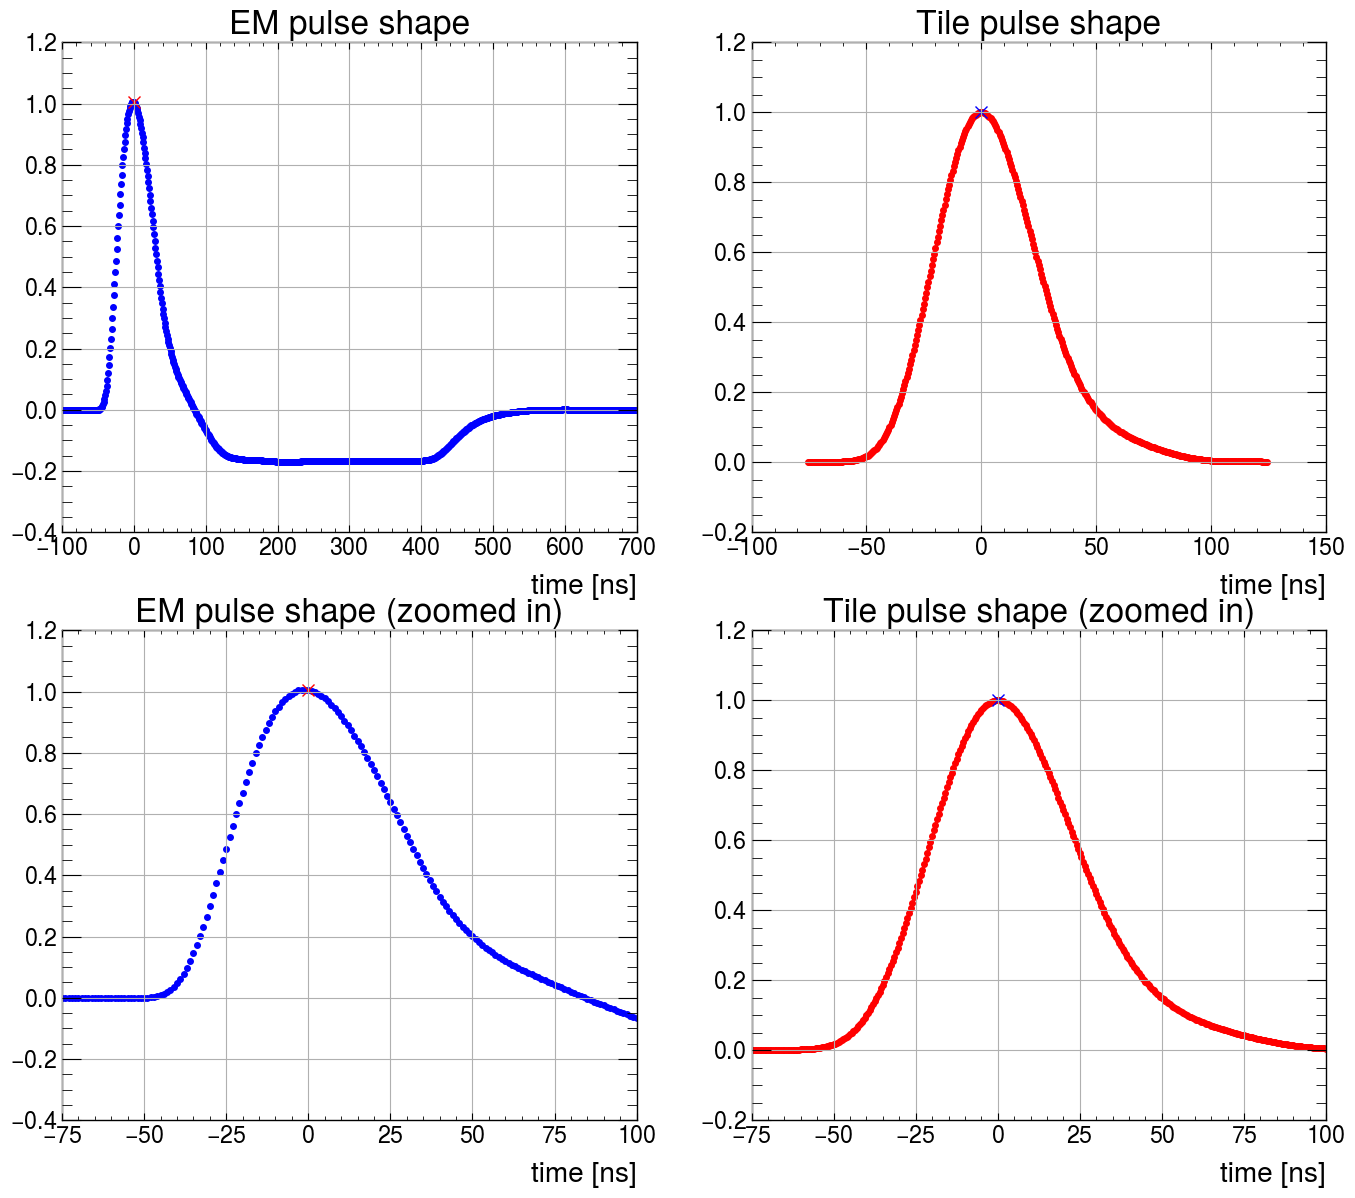

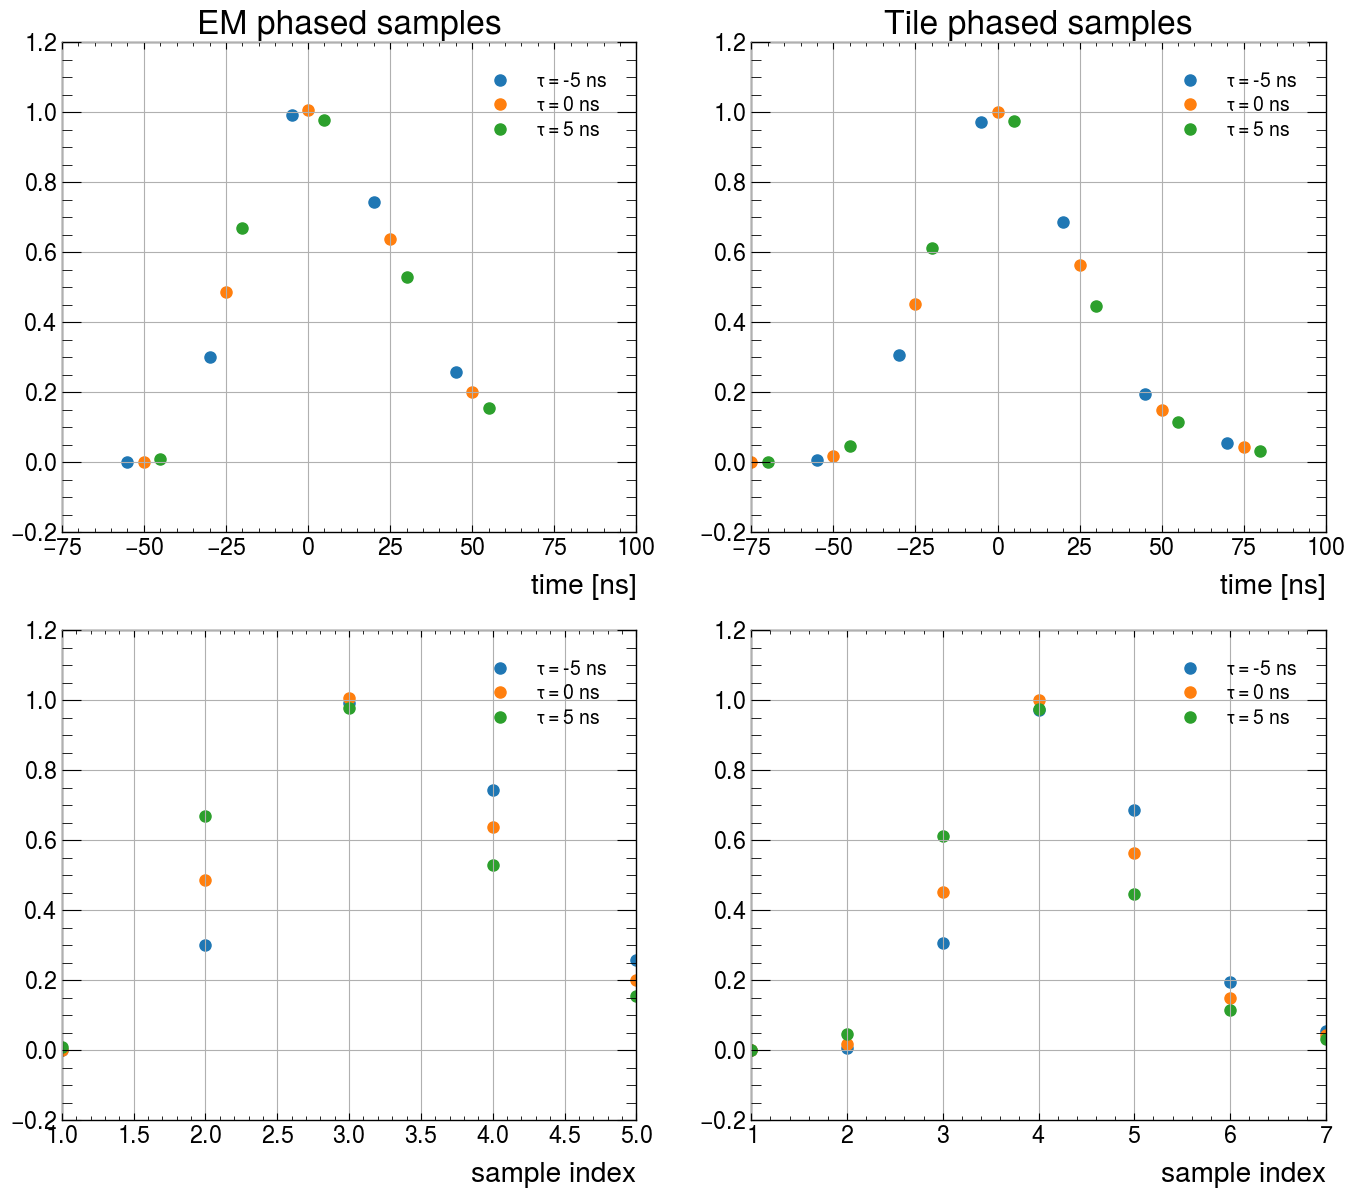

In [72]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,14))
ax[0][0].plot(lartime,laramp,'b.')
ax[0][0].plot(lartime[larshaperzeroindex],laramp[larshaperzeroindex],'rx')
ax[0][0].set_title("EM pulse shape")
ax[0][0].set_xlabel('time [ns]')
# lorenzettiText()
# ax[0][0].set_xlim([lartime[larminplottimeindex],lartime[larmaxplottimeindex]])
ax[0][0].grid()

ax[0][1].plot(tiletime,tileamp,'r.')
ax[0][1].plot(tiletime[tileshaperzeroindex],tileamp[tileshaperzeroindex],'bx')
ax[0][1].set_title("Tile pulse shape")
ax[0][1].set_xlabel('time [ns]')
# ax[0][1].set_xlim([tiletime[tileminplottimeindex],tiletime[tilemaxplottimeindex]])
ax[0][1].grid()

ax[1][0].plot(lartime,laramp,'b.')
ax[1][0].plot(lartime[larshaperzeroindex],laramp[larshaperzeroindex],'rx')
ax[1][0].set_xlim([lartime[larminplottimeindex],lartime[larmaxplottimeindex]])
ax[1][0].set_title("EM pulse shape (zoomed in)")
ax[1][0].set_xlabel('time [ns]')
ax[1][0].grid()

ax[1][1].plot(tiletime,tileamp,'r.')
ax[1][1].plot(tiletime[tileshaperzeroindex],tileamp[tileshaperzeroindex],'bx')
ax[1][1].set_xlim([tiletime[tileminplottimeindex],tiletime[tilemaxplottimeindex]])
ax[1][1].set_title("Tile pulse shape (zoomed in)")
ax[1][1].set_xlabel('time [ns]')
ax[1][1].grid()
plt.show()

## Delayed samples plot
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,14))
for tauIdx,PhasedAmp in enumerate(lartestpulse):
    ax[0][0].plot(lartestpulsetime[tauIdx],PhasedAmp,'o',label=r'$\tau=${} ns'.format(tauRange[tauIdx]))
    ax[1][0].plot(np.arange(1,len(PhasedAmp)+1),PhasedAmp,'o',label=r'$\tau=${} ns'.format(tauRange[tauIdx]))
ax[0][0].set_title('EM phased samples')
ax[0][0].set_xlabel('time [ns]')
ax[1][0].set_xlabel('sample index')
ax[0][0].set_xlim([lartime[larminplottimeindex],lartime[larmaxplottimeindex]])
ax[1][0].legend()
ax[0][0].legend()
ax[0][0].grid()
ax[1][0].grid()

for tauIdx,PhasedAmp in enumerate(tiletestpulse):
    if len(tiletestpulsetime[tauIdx]) == 6:
        startSample = 1
    else:
        startSample = 0
    ax[0][1].plot(tiletestpulsetime[tauIdx],PhasedAmp[startSample:],'o',label=r'$\tau=${} ns'.format(tauRange[tauIdx]))
    ax[1][1].plot(np.arange(1,len(PhasedAmp)+1),PhasedAmp,'o',label=r'$\tau=${} ns'.format(tauRange[tauIdx]))
ax[0][1].set_title('Tile phased samples')
ax[0][1].set_xlabel('time [ns]')
ax[1][1].set_xlabel('sample index')
ax[0][1].set_xlim([tiletime[tileminplottimeindex],tiletime[tilemaxplottimeindex]])
ax[0][1].legend()
ax[1][1].legend()
ax[0][1].grid()
ax[1][1].grid()

# ax[0][1].plot(tiletime,tileamp,'r.')
# ax[0][1].plot(tiletime[tileshaperzeroindex],tileamp[tileshaperzeroindex],'bx')
# ax[0][1].set_xlim([tiletime[tileminplottimeindex],tiletime[tilemaxplottimeindex]])
# ax[0][1].set_title("Tile pulse shape (zoomed in)")
# ax[0][1].set_xlabel('time [ns]')
# ax[0][1].grid()

plt.show()

## 4 - Cell time-energy analysis
- **Experimento 1**: (*Zee*) a função 'GenerateDeterministicPulse' foi modificada para fixar a fase do pulso em zero (0 Phase) e em outra situação, a fase foi adicionada para seguir o tempo truth (tof)
- **Experimento 2**: (*Zee*) o tempo de vôo truth (TOF) teve uma calibração aplicada, referente à posição da célula no detector.
- **Experimento 3**: (*Zee*) mesmo que o experimento 2, mas sem ruído eletrônico.
- **Experimento 3.1**: (*electron*) mesmo que o experimento 3, porém com single electorn atirado no volume de uma única célula do EM2.
- **Experimento 4**: (*electron*) elétrons atirados em uma única célula do EM2, direto no centróide (I) e no volume inteiro da célula (II)

In [17]:
matplotlib.use('Agg') #CHANGES THE MATPLOTLIB BACKEND FOR LOOP PLOTS


### Experimento 04 ###
# withPhaseFileName   = '/data/atlas/mhufnage/lzt_single_e/elec1000Evts_singleCell_centroid/ESD/electron.ESD.root.0'
# zeroPhaseFileName   = '/data/atlas/mhufnage/lzt_single_e/elec1000Evts_singleCell_volume/ESD/electron.ESD.root.0'

# phasedLabel         = 'EM2 cell centroid'
# nonPhasedLabel      = 'EM2 cell volume'
# aliasName           = 'tofAnalysis-elec-singleCell/'
# ********************************************************

# ### Experimento 03.1 ###
# withPhaseFileName   = '/data/atlas/mhufnage/lzt_single_e/elec_testWithNoise/ESD/electron.ESD.root.0'
# zeroPhaseFileName   = '/data/atlas/mhufnage/lzt_single_e/elec_testNoNoise/ESD/electron.ESD.root.0'

# phasedLabel         = 'with electronic noise'
# nonPhasedLabel      = 'w/o electronic noise'
# aliasName           = 'tofAnalysis-Calib-noNoise-singleCell/'
# # ********************************************************

# ### Experimento 03 ###
withPhaseFileName   = '/data/atlas/mhufnage/lzt_zee/Zee_test/ESD/Zee.ESD.root.0'
zeroPhaseFileName   = '/data/atlas/mhufnage/lzt_zee/Zee_testNoNoise/ESD/Zee.ESD.root.0'

phasedLabel         = 'with electronic noise'
nonPhasedLabel      = 'w/o electronic noise'
aliasName           = 'tofAnalysis-Calib-noNoise/'
# # ********************************************************

# ### Experimento 02 ###
# withPhaseFileName   = '/data/atlas/mhufnage/lzt_zee/Zee_testUncalib/ESD/Zee.ESD.root.0'
# zeroPhaseFileName   = '/data/atlas/mhufnage/lzt_zee/Zee_test/ESD/Zee.ESD.root.0'

# phasedLabel         = 'Uncalib.'
# nonPhasedLabel      = 'TOF Calib.'
# aliasName           = 'tofAnalysis-Calib/'
# # ********************************************************

### Experimento 01 ###
# withPhaseFileName   = '/home/mhufnage/lorenzetti/fork_lzt_new/run/Zee100Evts_TOF_withPhase/ESD/Zee.ESD.root.0'
# zeroPhaseFileName   = '/home/mhufnage/lorenzetti/fork_lzt_new/run/Zee100Evts_TOF_zeroPhase/ESD/Zee.ESD.root.0'
# # withPhaseFileName   = '/home/mhufnage/lorenzetti/fork_lzt_new/run/Zee100Evts_tof_vertexZero/ESD/Zee.ESD.root.0'
# # zeroPhaseFileName   = '/home/mhufnage/lorenzetti/fork_lzt_new/run/Zee100Evts_tof_vertexATLAS/ESD/Zee.ESD.root.0'
# phasedLabel         = 'With Phase'
# nonPhasedLabel      = '0 Phase'
# aliasName           = 'tofAnalysis/'
# ********************************************************

thePath = '/home/mhufnage/lorenzetti/Plots_lorenzetti/{}'.format(aliasName)
if not(os.path.isdir(thePath)):
    os.mkdir(thePath)

if withPhaseFileName.split('/')[-1].split('.')[1] == 'AOD':
    treeName = 'physics'
if withPhaseFileName.split('/')[-1].split('.')[1] == 'ESD':
    treeName = 'CollectionTree'

# query layer
nbins       = 70
eta         = 1.4
cellEcut    = .200 #GeV
layers      = [CaloSampling.PSB,CaloSampling.EMB1, CaloSampling.EMB2, CaloSampling.EMB3]
layersStr   = ['PSB','EMB1','EMB2','EMB3']

# branchName      = 'CaloDetDescriptor_Cells'
for cnt in ['Cells','XTCells']:
    print( "Container: {}".format(cnt))

    cntName         = 'CaloDetDescriptorContainer_{}'.format(cnt)
    uprootLibrary   = 'pd'
    MeVToGeV        = 1/1000
    psTons          = 1/1000

    phasedTree      = uproot.open(withPhaseFileName+":{}/{}".format(treeName,cntName))
    nonPhasedTree   = uproot.open(zeroPhaseFileName+":{}/{}".format(treeName,cntName))

    phasedCells     = phasedTree.arrays(library=uprootLibrary) #using pandas
    nonPhasedCells  = nonPhasedTree.arrays(library=uprootLibrary) #using pandas

    # rename 
    newColNames = {}
    for key in phasedCells.keys():
        newKey = key.split('.')[1]
        newColNames[key] = newKey
    phasedCells = phasedCells.rename(columns=newColNames,errors='raise')
    nonPhasedCells = nonPhasedCells.rename(columns=newColNames,errors='raise')

    # change unity
    phasedCells['e']       = phasedCells['e']*MeVToGeV
    phasedCells['edep']    = phasedCells['edep']*MeVToGeV
    # phasedCells['tof']     = phasedCells['tof']*psTons
    # phasedCells['tau']     = phasedCells['tau']*psTons
    nonPhasedCells['e']    = nonPhasedCells['e']*MeVToGeV
    nonPhasedCells['edep'] = nonPhasedCells['edep']*MeVToGeV
    # nonPhasedCells['tau']  = nonPhasedCells['tau']*psTons

    # new variables
    phasedCells['e_error']      = phasedCells['edep'] - phasedCells['e']
    phasedCells['tau_error']    = phasedCells['tof'] - phasedCells['tau']
    nonPhasedCells['e_error']   = nonPhasedCells['edep'] - nonPhasedCells['e']
    nonPhasedCells['tau_error'] = nonPhasedCells['tof'] - nonPhasedCells['tau']

    for layIdx,layer in enumerate(layers):
        rule = str('sampling == {} and abs(eta) < {} and e > {}'.format(layer,eta,cellEcut))
        print("Processing Layer {} with rule={}".format(layer,rule))

        ## Reco Energy
        plt.figure()
        # f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3,1]})
        hist, bin_edges = np.histogram(phasedCells.query(rule).e,bins=nbins)
        plt.hist(phasedCells.query(rule).e,bins=bin_edges, histtype='step',label="{}".format(phasedLabel), color='blue', density=True) 
        # hph     = a0.hist(phasedCells.query(rule).e,bins=bin_edges, histtype='step',label="{}".format(phasedLabel), color='blue')
        plt.hist(nonPhasedCells.query(rule).e,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red', density=True)
        # plt.hist(phasedCells.query(rule).edep,bins=bin_edges, histtype='step',label="{}".format(phasedLabel),color='green')
        # plt.hist(nonPhasedCells.query(rule).edep,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='black')
        # hnph    = a0.hist(nonPhasedCells.query(rule).e,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red')
        # a1.plot(np.array(hph)/np.array(hnph),'.')
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel('Reconstructed Energy [GeV]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        # f.tight_layout()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_ene_{}_eta{}.png'.format(aliasName,cnt,layersStr[layIdx],eta))
        plt.close()

        # Reco Energy Error
        plt.figure()
        hist,bin_edges = np.histogram(phasedCells.query(rule).e_error,bins=nbins)
        plt.hist(phasedCells.query(rule).e_error,bins=bin_edges,histtype='stepfilled',alpha=0.3,label="{}".format(phasedLabel),color='blue',density=True)
        plt.hist(nonPhasedCells.query(rule).e_error,bins=bin_edges,histtype='step',alpha=1,label="{}".format(nonPhasedLabel),color='red',density=True)
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$E_{truth}-E_{reco}$ [GeV]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/tofAnalysis_{}_eError_{}_eta{}.png'.format(cnt,layersStr[layIdx],eta))
        plt.close()

        # Reco Energy Error vs Energy Truth
        plt.figure()
        hist,bin_edges = np.histogram(phasedCells.query(rule).e_error,bins=nbins)
        plt.scatter(phasedCells.query(rule).edep,phasedCells.query(rule).e_error,alpha=0.2,label="{}".format(phasedLabel),color='blue',marker='^')
        plt.scatter(nonPhasedCells.query(rule).edep,nonPhasedCells.query(rule).e_error,alpha=0.2,label="{}".format(nonPhasedLabel),color='red',marker='v')
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$E_{truth}$ [GeV]')
        plt.ylabel(r'$E_{truth}-E_{reco}$ [GeV]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_eError-edep_{}_eta{}.png'.format(aliasName,cnt,layersStr[layIdx],eta))
        plt.close()

        # Reco TimeError
        plt.figure()
        hist,bin_edges = np.histogram(phasedCells.query(rule).tau_error,bins=nbins)
        plt.hist(phasedCells.query(rule).tau_error,bins=bin_edges,histtype='stepfilled',alpha=0.3,label="{}".format(phasedLabel),color='black',density=True)
        plt.hist(nonPhasedCells.query(rule).tau_error,bins=bin_edges,histtype='step',alpha=1,label="{}".format(nonPhasedLabel),color='green',density=True)
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\tau_{truth}-\tau_{reco}$ [ns]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_tauError_{}_eta{}.png'.format(aliasName,cnt,layersStr[layIdx],eta))
        plt.close()

        # Reco Time error vs Time Truth
        plt.figure()
        hist,bin_edges = np.histogram(phasedCells.query(rule).tau_error,bins=nbins)
        plt.scatter(phasedCells.query(rule).tof,phasedCells.query(rule).tau_error,alpha=0.2,label="{}".format(phasedLabel),color='black',marker='^')
        plt.scatter(nonPhasedCells.query(rule).tof,nonPhasedCells.query(rule).tau_error,alpha=0.2,label="{}".format(nonPhasedLabel),color='green',marker='v')
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\tau_{truth}$ [ns]')
        plt.ylabel(r'$\tau_{truth}-\tau_{reco}$ [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_tauError-tof_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        # Reco Time error vs Energy Truth
        plt.figure()
        # hist,bin_edges = np.histogram(phasedCells.query(rule).tau_error,bins=nbins)
        plt.scatter(phasedCells.query(rule).edep,phasedCells.query(rule).tau_error,alpha=0.2,label="{}".format(phasedLabel),color='black',marker='^')
        plt.scatter(nonPhasedCells.query(rule).edep,nonPhasedCells.query(rule).tau_error,alpha=0.2,label="{}".format(nonPhasedLabel),color='green',marker='v')
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$E_{truth}$ [GeV]')
        plt.ylabel(r'$\tau_{truth}-\tau_{reco}$ [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_tauError-e_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()


        ## Reco Time
        plt.figure()
        hist, bin_edges = np.histogram([-15.0,15.0],bins=nbins)
        plt.hist(phasedCells.query(rule).tau,bins=bin_edges, histtype='step',label="{}".format(phasedLabel), color='blue', density=True)
        plt.hist(nonPhasedCells.query(rule).tau,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red', density=True)
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel('Reconstructed Time [ns]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_tau_{}_eta{}.png'.format(aliasName,cnt,layersStr[layIdx],eta))
        plt.close()

        ## Truth Time
        plt.figure()
        hist, bin_edges = np.histogram([-5.0,5.0],bins=nbins)
        plt.hist(phasedCells.query(rule).tof,bins=bin_edges, histtype='stepfilled',alpha=0.2,label="{}".format(phasedLabel), color='blue', density=True) 
        plt.hist(nonPhasedCells.query(rule).tof,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red', density=True) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel('Truth Time [ns]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_tof_{}_eta{}.png'.format(aliasName,cnt,layersStr[layIdx],eta))
        plt.close()

        ## Truth Energy
        plt.figure()
        hist, bin_edges = np.histogram(phasedCells.query(rule).edep,bins=nbins)
        plt.hist(phasedCells.query(rule).edep,bins=bin_edges, histtype='stepfilled',alpha=0.2,label="{}".format(phasedLabel), color='blue',density=True)
        plt.hist(nonPhasedCells.query(rule).edep,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red',density=True)
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel('Truth Energy [GeV]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_edep_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Reco Energy vs Truth Energy
        plt.figure()
        plt.scatter(phasedCells.query(rule).edep,phasedCells.query(rule).e, color='blue',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).edep,nonPhasedCells.query(rule).e, color='red',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel('Truth Energy [GeV]')
        plt.ylabel('Reco Energy [GeV]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_edep-e_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Truth Time vs Truth Energy
        plt.figure()
        plt.scatter(phasedCells.query(rule).edep,phasedCells.query(rule).tof, color='blue',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).edep,nonPhasedCells.query(rule).tof, color='red',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel('Truth Energy [GeV]')
        plt.ylabel('Truth Time [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_edep-tof_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Reco Time vs Truth Time
        plt.figure()
        plt.scatter(phasedCells.query(rule).tof,phasedCells.query(rule).tau, color='black', label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).tof,nonPhasedCells.query(rule).tau, color='green', label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel('Truth Time [ns]')
        plt.ylabel('Reco Time [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_tof-tau_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Reco Time vs Reco Energy
        plt.figure()
        plt.scatter(phasedCells.query(rule).e,phasedCells.query(rule).tau, color='black',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).e,nonPhasedCells.query(rule).tau, color='green',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel('Reco Energy [GeV]')
        plt.ylabel('Reco Time [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_e-tau_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()
        
        ### ETA
        ## Truth time vs eta
        plt.figure()
        plt.scatter(phasedCells.query(rule).eta,phasedCells.query(rule).tof, color='black',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).eta,nonPhasedCells.query(rule).tof, color='green',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\eta$')
        plt.ylabel('Truth Time [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_eta-tof_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Reco time vs eta
        plt.figure()
        plt.scatter(phasedCells.query(rule).eta,phasedCells.query(rule).tau, color='black',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).eta,nonPhasedCells.query(rule).tau, color='green',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\eta$')
        plt.ylabel('Reco Time [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_eta-tau_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Truth ene vs eta
        plt.figure()
        plt.scatter(phasedCells.query(rule).eta,phasedCells.query(rule).edep, color='blue',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).eta,nonPhasedCells.query(rule).edep, color='red',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\eta$')
        plt.ylabel('Truth Energy [GeV]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_eta-edep_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Reco ene vs eta
        plt.figure()
        plt.scatter(phasedCells.query(rule).eta,phasedCells.query(rule).e, color='blue',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).eta,nonPhasedCells.query(rule).e, color='red',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\eta$')
        plt.ylabel('Reco Energy [GeV]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_eta-e_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ### PHI
        ## Truth time vs phi
        plt.figure()
        plt.scatter(phasedCells.query(rule).phi,phasedCells.query(rule).tof, color='black',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).phi,nonPhasedCells.query(rule).tof, color='green',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\phi$')
        plt.ylabel('Truth Time [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_phi-tof_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Reco time vs phi
        plt.figure()
        plt.scatter(phasedCells.query(rule).phi,phasedCells.query(rule).tau, color='black',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).phi,nonPhasedCells.query(rule).tau, color='green',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\phi$')
        plt.ylabel('Reco Time [ns]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_phi-tau_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Truth ene vs phi
        plt.figure()
        plt.scatter(phasedCells.query(rule).phi,phasedCells.query(rule).edep, color='blue',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).phi,nonPhasedCells.query(rule).edep, color='red',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\phi$')
        plt.ylabel('Truth Energy [GeV]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_phi-edep_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()

        ## Reco ene vs phi
        plt.figure()
        plt.scatter(phasedCells.query(rule).phi,phasedCells.query(rule).e, color='blue',label="{}".format(phasedLabel),marker='^', alpha=0.4) 
        plt.scatter(nonPhasedCells.query(rule).phi,nonPhasedCells.query(rule).e, color='red',label="{}".format(nonPhasedLabel),marker='v', alpha=0.4) 
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
        plt.xlabel(r'$\phi$')
        plt.ylabel('Reco Energy [GeV]')
        # plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}Analysis_{}_phi-e_{}_eta{}.png'.format(aliasName, cnt,layersStr[layIdx],eta))
        plt.close()
        

Container: Cells
Processing Layer 0 with rule=sampling == 0 and abs(eta) < 1.4 and e > 0.2


/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: Runt

Processing Layer 2 with rule=sampling == 2 and abs(eta) < 1.4 and e > 0.2
Processing Layer 3 with rule=sampling == 3 and abs(eta) < 1.4 and e > 0.2
Processing Layer 4 with rule=sampling == 4 and abs(eta) < 1.4 and e > 0.2


/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:122: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:136: UserWarning: Data ha

Container: XTCells
Processing Layer 0 with rule=sampling == 0 and abs(eta) < 1.4 and e > 0.2


/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: Runt

Processing Layer 2 with rule=sampling == 2 and abs(eta) < 1.4 and e > 0.2
Processing Layer 3 with rule=sampling == 3 and abs(eta) < 1.4 and e > 0.2
Processing Layer 4 with rule=sampling == 4 and abs(eta) < 1.4 and e > 0.2


/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:122: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:136: UserWarning: Data ha

In [18]:
L = [1,2,3,4,5,6]

In [19]:
L**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

### 4.1 - E/$\tau$ by layer
    - Experimento 1: a função 'GenerateDeterministicPulse' foi modificada para fixar a fase do pulso em zero (0 Phase) e em outra situação, a fase foi adicionada para seguir o tempo truth (tof)
    - Experimento 2: o tempo de vôo truth (TOF) teve uma calibração aplicada, referente à posição da célula no detector.

In [7]:
# query layer
nbins       = 70
eta         = 1.4
cellEcut    = .250 #GeV
layers      = [CaloSampling.PSB,CaloSampling.EMB1, CaloSampling.EMB2, CaloSampling.EMB3]
layersStr   = ['PSB','EMB1','EMB2','EMB3']

for layIdx,layer in enumerate(layers):
    rule = str('sampling == {} and abs(eta) < {} and e > {}'.format(layer,eta,cellEcut))
    ## Reco Energy
    plt.figure()
    # f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3,1]})
    hist, bin_edges = np.histogram(phasedCells.query(rule).e,bins=nbins)
    plt.hist(phasedCells.query(rule).e,bins=bin_edges, histtype='step',label="{}".format(phasedLabel), color='blue') 
    # hph     = a0.hist(phasedCells.query(rule).e,bins=bin_edges, histtype='step',label="{}".format(phasedLabel), color='blue')
    plt.hist(nonPhasedCells.query(rule).e,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red')
    # plt.hist(phasedCells.query(rule).edep,bins=bin_edges, histtype='step',label="{}".format(phasedLabel),color='green')
    # plt.hist(nonPhasedCells.query(rule).edep,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='black')
    # hnph    = a0.hist(nonPhasedCells.query(rule).e,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red')
    # a1.plot(np.array(hph)/np.array(hnph),'.')
    lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
    plt.xlabel('Reconstructed Energy [GeV]')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.legend()
    # f.tight_layout()
    plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}tofAnalysis_ene_{}_eta{}.png'.format(aliasName,layersStr[layIdx],eta))
    plt.close()

    ## Reco Time
    plt.figure()
    hist, bin_edges = np.histogram(phasedCells.query(rule).tau,bins=nbins)
    plt.hist(phasedCells.query(rule).tau,bins=bin_edges, histtype='step',label="{}".format(phasedLabel), color='blue') 
    plt.hist(nonPhasedCells.query(rule).tau,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red') 
    lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
    plt.xlabel('Reconstructed Time [ns]')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.legend()
    plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}tofAnalysis_tau_{}_eta{}.png'.format(aliasName,layersStr[layIdx],eta))
    plt.close()

    ## Truth Time
    plt.figure()
    hist, bin_edges = np.histogram(phasedCells.query(rule).tof,bins=nbins)
    plt.hist(phasedCells.query(rule).tof,bins=bin_edges, histtype='stepfilled',alpha=0.2,label="{}".format(phasedLabel), color='blue') 
    plt.hist(nonPhasedCells.query(rule).tof,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red') 
    lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
    plt.xlabel('Truth Time [ns]')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.legend()
    plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}tofAnalysis_tof_{}_eta{}.png'.format(aliasName,layersStr[layIdx],eta))
    plt.close()

    ## Truth Energy
    plt.figure()
    hist, bin_edges = np.histogram(phasedCells.query(rule).edep,bins=nbins)
    plt.hist(phasedCells.query(rule).edep,bins=bin_edges, histtype='stepfilled',alpha=0.2,label="{}".format(phasedLabel), color='blue') 
    plt.hist(nonPhasedCells.query(rule).edep,bins=bin_edges, histtype='step',label="{}".format(nonPhasedLabel),color='red') 
    lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
    plt.xlabel('Truth Energy [GeV]')
    plt.ylabel('Counts')
    plt.yscale('log')
    plt.legend()
    plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}tofAnalysis_edep_{}_eta{}.png'.format(aliasName,layersStr[layIdx],eta))
    plt.close()

    ## Reco Energy vs Truth Energy
    plt.figure()
    plt.scatter(phasedCells.query(rule).edep,phasedCells.query(rule).e, color='blue',label="{}".format(phasedLabel)) 
    plt.scatter(nonPhasedCells.query(rule).edep,nonPhasedCells.query(rule).e, color='red',label="{}".format(nonPhasedLabel)) 
    lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
    plt.xlabel('Truth Energy [GeV]')
    plt.ylabel('Reco Energy [GeV]')
    # plt.yscale('log')
    plt.legend()
    plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}tofAnalysis_edep-e_{}_eta{}.png'.format(aliasName,layersStr[layIdx],eta))
    plt.close()

    ## Truth Time vs Truth Energy
    plt.figure()
    plt.scatter(phasedCells.query(rule).edep,phasedCells.query(rule).tof, color='blue',label="{}".format(phasedLabel),marker='^') 
    plt.scatter(nonPhasedCells.query(rule).edep,nonPhasedCells.query(rule).tof, color='red',label="{}".format(nonPhasedLabel),marker='^') 
    lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
    plt.xlabel('Truth Energy [GeV]')
    plt.ylabel('Truth Time [ns]')
    # plt.yscale('log')
    plt.legend()
    plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}tofAnalysis_edep-tof_{}_eta{}.png'.format(aliasName,layersStr[layIdx],eta))
    plt.close()

    ## Reco Time vs Truth Time
    plt.figure()
    plt.scatter(phasedCells.query(rule).tof,phasedCells.query(rule).tau, color='black', label="{}".format(phasedLabel)) 
    plt.scatter(nonPhasedCells.query(rule).tof,nonPhasedCells.query(rule).tau, color='green', label="{}".format(nonPhasedLabel)) 
    lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
    plt.xlabel('Truth Time [ns]')
    plt.ylabel('Reco Time [ns]')
    # plt.yscale('log')
    plt.legend()
    plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}tofAnalysis_tof-tau_{}_eta{}.png'.format(aliasName,layersStr[layIdx],eta))
    plt.close()

    ## Reco Time vs Reco Energy
    plt.figure()
    plt.scatter(phasedCells.query(rule).e,phasedCells.query(rule).tau, color='black',label="{}".format(phasedLabel),marker='^') 
    plt.scatter(nonPhasedCells.query(rule).e,nonPhasedCells.query(rule).tau, color='green',label="{}".format(nonPhasedLabel),marker='^') 
    lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$>${} GeV, {}'.format(eta,cellEcut,cnt))
    plt.xlabel('Reco Energy [GeV]')
    plt.ylabel('Reco Time [ns]')
    # plt.yscale('log')
    plt.legend()
    plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}tofAnalysis_e-tau_{}_eta{}.png'.format(aliasName,layersStr[layIdx],eta))
    plt.close()

/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/mhufnage/lorenzetti/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


# 5 - Vertex-Time Analysis
- Experiment II: Observe differences in TOF for 2 generations:
1) **Pythia vertex generation**: the z values are too small, in the order of $10^{-15}$ mm
2) **ATLAS simulation vertex**: the z values from Pythia are added with a gaussian random variable of $\sigma=53$ mm

## 5.1 - Lorenzeti_utils code

In [2]:
# Lorenzetti Showers Collaboration 2020 - 2023 - https://doi.org/10.1016/j.cpc.2023.108671
import sys
sys.path.insert(0,'/home/mhufnage/lorenzetti/Applications') #lorenzetti utils path

# from ROOT import TFile, gROOT
from pandas import DataFrame
import itertools
# from lorenzetti_utils import dataframe_h
from pprint import pprint
import array
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from helper_lib.auxiliaryFunctions import *
from lorenzetti_reader import *

plt.rcParams['figure.constrained_layout.use'] = False

# MeVToGeV        = 1/1000


### Save Datasets (ML)

In [3]:

# Reading AOD data

#phase space regions
etBin  = [[15 , 20] ,[20, 30]  ,[30, 40]  ,[40, 50],[50,100],[100,10000000]]
etaBin = [[0.00, 0.80], [0.80, 1.37], [1.37,1.54],[1.54,2.50],[2.50,3.2]]

sampNoise = [90, 26, 26, 60, 40] # PSB, PSE, EM1, EM2, EM3
sampText  = ['PSB', 'PSE', 'EM1', 'EM2', 'EM3']
caloDetaWidth = [0.025, 0.025,0.00325,0.025,0.050]
caloDphiWidth = [np.pi/32, np.pi/32 ,np.pi/32,np.pi/128,np.pi/128]

evtMax          = 100
SigmaCut        = 1
dumpCells       = True
dumpWindowOnly  = True
caloSampling    = CaloSampling.EMB2
winSize         = 3

sig_dict = {}
for dsindex in range(1,3):
    path_signal         = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e20_DS{}/AOD/electron.AOD.root'.format(dsindex), 50]
    path            = '/'.join(path_signal[0].split('/')[:-1])+'/'
    print('DS {}: '.format(dsindex),path)

    # Saving NPZ data 
    sig_dict    = read_events(path_signal[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells, m_dumpOnlyWindow=dumpWindowOnly, m_sampling_filter=[caloSampling], m_eta_cut=1.4, m_eta_win=winSize, m_phi_win=winSize, m_sigma_cut=SigmaCut)

    # Saving complete NPZ data
    
    if (dumpCells):   addName='.WithCells'
    else:             addName=''

    np.savez(path+'user.mhufnage.lzt.e50.xtalk.DS{}.win{}.nopileup{}_{}.v0'.format(dsindex,winSize,addName,sampText[caloSampling]),**sig_dict)
print(' Dumped lzt data successfully')


DS 1:  /data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e20_DS1/AOD/


OSError: Failed to open file /data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e20_DS1/AOD/electron.AOD.root

Error in <TFile::TFile>: file /data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e20_DS1/AOD/electron.AOD.root does not exist


### Read AOD/ESD (Analysis)

In [6]:

# Reading AOD data
# path_signal     = '/data/atlas/mhufnage/lzt_zee/Zee10000Evts_thesisData_001/AOD/Zee.AOD.root'
# path_signal     = '/data/atlas/mhufnage/lzt_zee/Zee_test/AOD/Zee.AOD.root'
# path_signal         = '/data/atlas/mhufnage/lzt_zee/Zee_test/ESD/Zee.ESD.root.0' #calib
# path_signal         = '/data/atlas/mhufnage/lzt_single_e/elec1000Evts_singleCell_centroid/AOD/electron.AOD.root'
# path_signal         = '/data/atlas/mhufnage/lzt_single_e/elec_testXT/AOD/electron.AOD.root'
# path_signal         = '/data/atlas/mhufnage/lzt_single_e/elec_testWithNoise/AOD/electron.AOD.root'
path_signal         = '/data/atlas/mhufnage/lzt_single_e/elec_testNoNoise/AOD/electron.AOD.root'

path_signal50         = ['/data/atlas/mhufnage/lzt_single_e/elec_testNoNoise_newOFC/AOD/electron.AOD.root', 50] # no noise, 50 GeV
path_signal5          = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_centroidTest_e5/AOD/electron.AOD.root', 5] # no noise 5 GeV
path_signal20         = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_centroidTest_e20/AOD/electron.AOD.root', 20] # no noise 20 GeV
path_signal20Fix      = ['/data/atlas/mhufnage/lzt_single_e/elec_HitsCalibNew/AOD/electron.AOD.root', 20] # no noise 20 GeV
path_signal20gFix     = ['/data/atlas/mhufnage/lzt_single_ph/ph_HitsCalibNew/AOD/photon.AOD.root', 20] # no noise 20 GeV

# path_signal         = '/data/atlas/mhufnage/lzt_single_e/elec_test_singleCell_centroid/ESD/electron.ESD.root.0'
# path_signalUncalib  = '/data/atlas/mhufnage/lzt_zee/Zee_testUncalib/ESD/Zee.ESD.root.0' #uncalib
path            = '/'.join(path_signal.split('/')[:-1])+'/'


# file_sig50            = TFile(path_signal50[0])
# file_sig20            = TFile(path_signal20[0])
# file_sig5             = TFile(path_signal5[0])
# file_sig20Fix         = TFile(path_signal20Fix[0])
# file_sig20gFix        = TFile(path_signal20gFix[0])
# # file_sig_uncalib    = TFile(path_signalUncalib)
# gROOT.ProcessLine(dataframe_h)

# if path_signal.split('/')[-1].split('.')[1] == 'AOD':
#     treeName = 'physics'
# if path_signal.split('/')[-1].split('.')[1] == 'ESD':
#     treeName = 'CollectionTree'

# # tree_sig      = file_sig.Get(treeName)
# tree_sig50      = file_sig50.Get(treeName)
# tree_sig20      = file_sig20.Get(treeName)
# tree_sig5       = file_sig5.Get(treeName)
# tree_sig20Fix   = file_sig20Fix.Get(treeName)
# tree_sig20gFix  = file_sig20gFix.Get(treeName)
# # tree_uncalib  = file_sig_uncalib.Get(treeName)

# Saving NPZ data 
#phase space regions
etBin  = [[15 , 20] ,[20, 30]  ,[30, 40]  ,[40, 50],[50,100],[100,10000000]]
etaBin = [[0.00, 0.80], [0.80, 1.37], [1.37,1.54],[1.54,2.50],[2.50,3.2]]

# event max
sampNoise = [90, 26, 26, 60, 40] # PSB, PSE, EM1, EM2, EM3
sampText  = ['PSB', 'PSE', 'EM1', 'EM2', 'EM3']
caloDetaWidth = [0.025, 0.025,0.00325,0.025,0.050]
caloDphiWidth = [np.pi/32, np.pi/32 ,np.pi/32,np.pi/128,np.pi/128]


evtMax      = 1000
SigmaCut    = 1
caloSampling= CaloSampling.EMB1
dumpCells       = True

sig_dict50         = read_events(path_signal50[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,   m_sampling_filter=[caloSampling], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20         = read_events(path_signal20[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,   m_sampling_filter=[caloSampling], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20Fix      = read_events(path_signal20Fix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[caloSampling], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20FixPSB   = read_events(path_signal20Fix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[CaloSampling.PSB], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20FixEM1   = read_events(path_signal20Fix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[CaloSampling.EMB1], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20FixEM2   = read_events(path_signal20Fix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[CaloSampling.EMB2], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20FixEM3   = read_events(path_signal20Fix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[CaloSampling.EMB3], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20gFixPSB  = read_events(path_signal20gFix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[CaloSampling.PSB], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20gFixEM1  = read_events(path_signal20gFix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[CaloSampling.EMB1], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20gFixEM2  = read_events(path_signal20gFix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[CaloSampling.EMB2], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict20gFixEM3  = read_events(path_signal20gFix[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,m_sampling_filter=[CaloSampling.EMB3], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
sig_dict5          = read_events(path_signal5[0],evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_dumpOnlyWindow=False,    m_sampling_filter=[caloSampling], m_eta_cut=1.4, m_eta_win=7, m_phi_win=7, m_sigma_cut=SigmaCut)
# sig_dict_uncalib = read_events(tree_uncalib,evtMax,1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=dumpCells,m_sampling_filter=[CaloSampling.EMB2], m_eta_cut=1.4)


# Saving complete NPZ data
#go to the desired folder
# os.mkdir('./user.eegidiop.zee.mc23.lzt.000001.nopileup.v0')
# os.chdir(path)

if (dumpCells):   addName='.WithCells'
else:             addName=''

# np.savez('user.mhufnage.zee.lzt.000002.nopileup{}.v0'.format(addName),**sig_dict)
print(' Dumped lzt data successfully')


Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
Event 0/100...
Event 20/100...
Event 40/100...
Event 60/100...
Event 80/100...
 Dumped lzt data successfully


input_line_76:1:31: error: redefinition of 'cell_t'
namespace xAOD{        struct cell_t{          float e;          float et;          float eta;          float phi;          float deta;          float dphi;        };        struct CaloCell_t{          float e;          float tau;          float et;          float eta;          float phi;          float deta;          float dphi;          int descriptor_link;        };        struct CaloDetDescriptor_t{          int sampling;          int detector;          float eta;          float phi;          float deta;          float dphi;          float rmin;          float rmax;          float e;          float tau;          float edep;          float tof;          std::vector<float> pulse;          int bcid_start;          int bcid_end;          int bcid_truth;          float bc_duration;          unsigned int hash;          int cell_link;        };        struct CaloCluster_t{          float e;          float et;          float eta;         

In [16]:
import matplotlib.colors as mcolors

cell = 20
event = 7
layer = CaloSampling.EMB2

winIdx = sig_dict['cell_winIndex'][event]
winOrdIdx = sig_dict['cell_winOrdIndex'][event]
hotCellIdx = sig_dict['cell_hotCellIndex'][event]
ene = sig_dict['cell_e'][event]
time = sig_dict['cell_tau'][event]
hash = sig_dict['cell_hash'][event]
eta = sig_dict['cell_eta'][event]
phi = sig_dict['cell_phi'][event]
deta = sig_dict['cell_deta'][event]
dphi = sig_dict['cell_dphi'][event]
samp = sig_dict['cell_sampling'][event]
digits = sig_dict['cell_pulse'][event]

xbins = 7
theEne = np.asarray(ene)[winIdx]
theEneFull = np.asarray(ene)
theEnext = np.asarray(sig_dict['xtcell_e'][event])[winIdx]
theEnextFull = np.asarray(sig_dict['xtcell_e'][event])

theTime = np.asarray(time)[winIdx]
theTimeFull = np.asarray(ene)
theTimext = np.asarray(sig_dict['xtcell_tau'][event])[winIdx]
theTimextFull = np.asarray(sig_dict['xtcell_tau'][event])

logNorm = None#mcolors.SymLogNorm(linthresh=0.5, linscale=0.5, base=10)
linNorm = mcolors.BoundaryNorm(np.linspace(-100, 35000, 20), 19)

plt.figure()
im = plt.imshow(theEne.reshape(7,7), cmap=plt.cm.jet, interpolation='none', norm=logNorm)
# im.norm.autoscale([0, 1])
plt.colorbar(im)
# plt.grid()

plt.figure()
im = plt.imshow(theEnext.reshape(7,7), cmap=plt.cm.jet, interpolation='none', norm=logNorm)
plt.colorbar(im)

plt.figure()
im = plt.imshow((theEne - theEnext).reshape(7,7), cmap=plt.cm.jet, interpolation='none', norm=logNorm)
plt.colorbar(im)
# plt.grid()

plt.figure()
im = plt.imshow(theTime.reshape(7,7), cmap=plt.cm.jet, interpolation='none', norm=logNorm)
plt.colorbar(im)
# plt.grid()

plt.figure()
im = plt.imshow(theTimext.reshape(7,7), cmap=plt.cm.jet, interpolation='none', norm=logNorm)
plt.colorbar(im)

plt.figure()
im = plt.imshow((theTime-theTimext).reshape(7,7), cmap=plt.cm.jet, interpolation='none', norm=logNorm)
plt.colorbar(im)
# plt.grid()
# plt.hist2d(theEne, theEnext,bins=[xbins,xbins], cmin=1,norm=mcolors.SymLogNorm(linthresh=0.5, linscale=1, base=10), cmap=plt.cm.jet)
# plt.xlabel('Reconstructed cluster cell time [ns]', labelpad='test')
# plt.ylabel('Time reconstruction error [ns]')
# # plt.ylabel('Output - Input samples [ADC]')


ValueError: cannot reshape array of size 9 into shape (7,7)

<Figure size 800x600 with 0 Axes>

### Get info from single cell

In [26]:
cell = 20
event = 7
layer = CaloSampling.EMB2

hash = sig_dict['cell_hash'][event][cell]
eta = sig_dict['cell_eta'][event][cell]
phi = sig_dict['cell_phi'][event][cell]
deta = sig_dict['cell_deta'][event][cell]
dphi = sig_dict['cell_dphi'][event][cell]
samp = sig_dict['cell_sampling'][event][cell]

deta_var = deta/100
dphi_var = dphi/100

print('Single cell centroid: Sampling (hash): {} ({}). Eta={}, Phi={}, deta={}, dphi={}'.format(samp, hash,eta, phi, deta, dphi))
print('Closer to cell centroid: Sampling (hash): {} ({}). EtaRange={}|{}, PhiRange={}|{}, deta={}, dphi={}'.format(samp, hash, eta-eta*deta_var, eta+eta*deta_var, phi-phi*dphi_var,phi+phi*dphi_var, deta, dphi))
print('Within single cell range: Sampling (hash): {} ({}). EtaRange={}|{}, PhiRange={}|{}, deta={}, dphi={}'.format(samp, hash, eta-deta, eta+deta, phi-dphi,phi+dphi, deta, dphi))

Single cell centroid: Sampling (hash): 3 (30016287). Eta=0.08749999105930328, Phi=0.7731999158859253, deta=0.02499997615814209, dphi=0.024599790573120117
Closer to cell centroid: Sampling (hash): 3 (30016287). EtaRange=0.08747811608240008|0.08752186603620649, PhiRange=0.7730097103259058|0.7733901214459448, deta=0.02499997615814209, dphi=0.024599790573120117
Within single cell range: Sampling (hash): 3 (30016287). EtaRange=0.0625000149011612|0.11249996721744537, PhiRange=0.7486001253128052|0.7977997064590454, deta=0.02499997615814209, dphi=0.024599790573120117


## Validation plots for ML-XTalk

#### Timing I

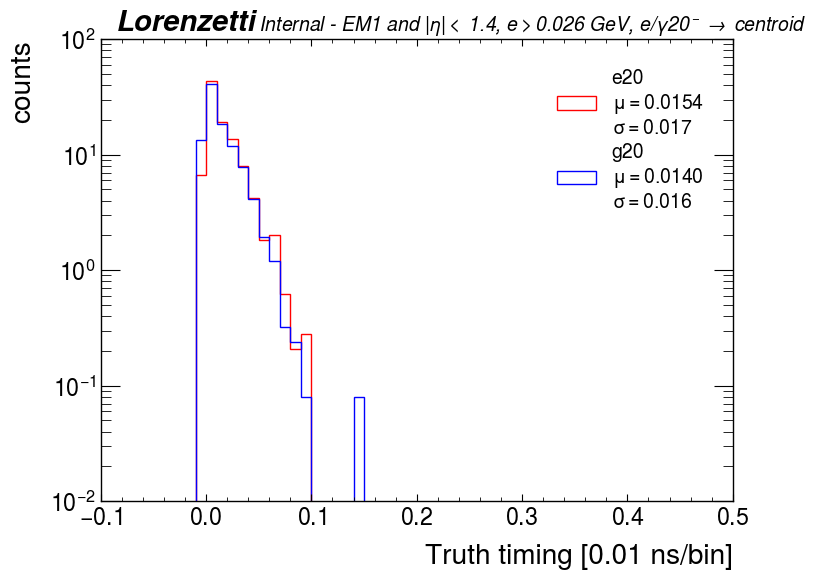

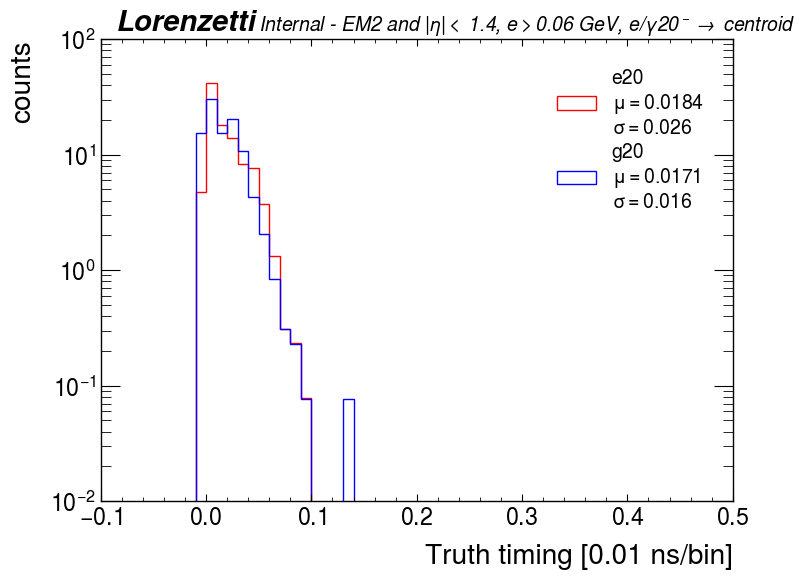

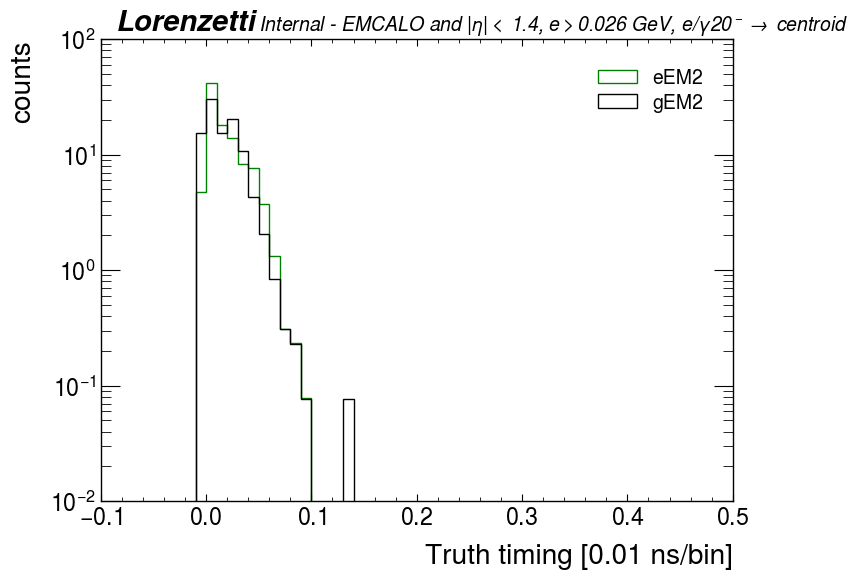

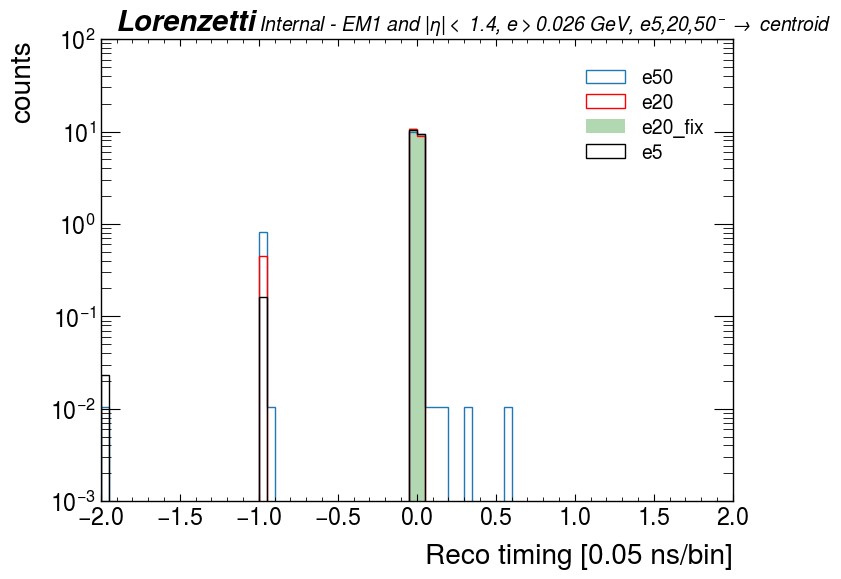

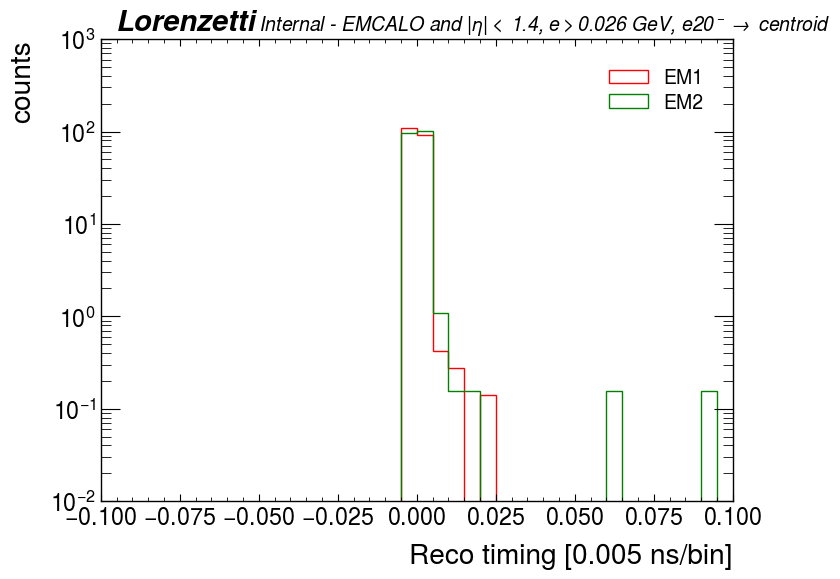

In [13]:
# matplotlib.use('module://ipykernel.pylab.backend_inline')  # show plots

plt.figure()
# plt.plot(sig_dict['cell_tof'][event], sig_dict['cell_tau'][event],'x')
binMin   = -0.1
binMax   = 0.5
binWidth = 0.01
# c, xbins = np.histogram([-50,50], bins=40)
xbins = np.arange(binMin, binMax, binWidth)
# plt.hist(np.concatenate(sig_dict50['cell_tau']).flatten(), bins =xbins, histtype='step',label='e50', density=True)
# plt.hist(np.concatenate(sig_dict20['cell_tof']).flatten(), bins =xbins, histtype='step',label='e20',color='red', density=True)
plt.hist(np.concatenate(sig_dict20FixEM1['cell_tof']).flatten(), bins =xbins, histtype='step',label='e20\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dict20FixEM1['cell_tof']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dict20FixEM1['cell_tof']).flatten())),color='red', density=True)
plt.hist(np.concatenate(sig_dict20gFixEM1['cell_tof']).flatten(), bins =xbins, histtype='step',label='g20\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dict20gFixEM1['cell_tof']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dict20gFixEM1['cell_tof']).flatten())),color='blue', density=True)
# plt.hist(np.concatenate(sig_dict5['cell_tof']).flatten(), bins =xbins, histtype='step',label='e5',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[CaloSampling.EMB1])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e/\gamma${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[CaloSampling.EMB1]/1000,'20'))
plt.yscale('log')
plt.xlabel('Truth timing [{} ns/bin]'.format(binWidth))
plt.ylabel('counts')
plt.legend()
plt.show()

plt.figure()
binMin   = -0.1
binMax   = 0.5
binWidth = 0.01
# c, xbins = np.histogram([-50,50], bins=40)
xbins = np.arange(binMin, binMax, binWidth)
# plt.hist(np.concatenate(sig_dict20FixPSB['cell_tof']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.2,label='ePSB', density=True)
plt.hist(np.concatenate(sig_dict20FixEM2['cell_tof']).flatten(), bins =xbins, histtype='step',label='e20\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dict20FixEM2['cell_tof']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dict20FixEM2['cell_tof']).flatten())),color='red', density=True)
# plt.hist(np.concatenate(sig_dict20FixEM2['cell_tof']).flatten(), bins =xbins, histtype='step',label='eEM2',color='green', density=True)
# plt.hist(np.concatenate(sig_dict20gFixPSB['cell_tof']).flatten(), bins =xbins, histtype='step',label='gPSB',color='blue', density=True)
plt.hist(np.concatenate(sig_dict20gFixEM2['cell_tof']).flatten(), bins =xbins, histtype='step',label='g20\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dict20gFixEM2['cell_tof']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dict20gFixEM2['cell_tof']).flatten())),color='blue', density=True)
# plt.hist(np.concatenate(sig_dict20gFixEM2['cell_tof']).flatten(), bins =xbins, histtype='step',label='gEM2',color='black', density=True)
# plt.hist(np.concatenate(sig_dict20FixEM3['cell_tof']).flatten(), bins =xbins, histtype='step',label='EM3',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[CaloSampling.EMB2])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e/\gamma${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[CaloSampling.EMB2]/1000,'20'))
plt.yscale('log')
plt.xlabel('Truth timing [{} ns/bin]'.format(binWidth))
plt.ylabel('counts')
plt.legend()
plt.show()

xbins = np.arange(binMin, binMax, binWidth)
# plt.hist(np.concatenate(sig_dict20FixPSB['cell_tof']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='PSB', density=True)
# plt.hist(np.concatenate(sig_dict20FixEM1['cell_tof']).flatten(), bins =xbins, histtype='step',label='eEM1',color='red', density=True)
plt.hist(np.concatenate(sig_dict20FixEM2['cell_tof']).flatten(), bins =xbins, histtype='step',label='eEM2',color='green', density=True)
# plt.hist(np.concatenate(sig_dict20gFixEM1['cell_tof']).flatten(), bins =xbins, histtype='step',label='gEM1',color='blue', density=True)
plt.hist(np.concatenate(sig_dict20gFixEM2['cell_tof']).flatten(), bins =xbins, histtype='step',label='gEM2',color='black', density=True)
# plt.hist(np.concatenate(sig_dict20FixEM3['cell_tof']).flatten(), bins =xbins, histtype='step',label='EM3',color='black', density=True)
lorenzettiText(subText='      Internal - EMCALO'+r' and |$\eta$|$<$ {}, e$>${} GeV, $e/\gamma${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,'20'))
plt.yscale('log')
plt.xlabel('Truth timing [{} ns/bin]'.format(binWidth))
plt.ylabel('counts')
plt.legend()
plt.show()

plt.figure()
# plt.plot(sig_dict['cell_tof'][event], sig_dict['cell_tau'][event],'x')
binMin   = -2.0
binMax   = 2.0
binWidth = 0.05
# c, xbins = np.histogram([-50,50], bins=40)
xbins = np.arange(binMin, binMax, binWidth)
plt.hist(np.concatenate(sig_dict50['cell_tau']).flatten(), bins =xbins, histtype='step',label='e50', density=True)
plt.hist(np.concatenate(sig_dict20['cell_tau']).flatten(), bins =xbins, histtype='step',label='e20',color='red', density=True)
plt.hist(np.concatenate(sig_dict20Fix['cell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='e20_fix',color='green', density=True)
plt.hist(np.concatenate(sig_dict5['cell_tau']).flatten(), bins =xbins, histtype='step',label='e5',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,'5,20,50'))
plt.yscale('log')
plt.xlabel('Reco timing [{} ns/bin]'.format(binWidth))
plt.ylabel('counts')
plt.legend()
plt.show()

plt.figure()
binMin   = -0.10
binMax   = 0.10
binWidth = 0.005
# c, xbins = np.histogram([-50,50], bins=40)
xbins = np.arange(binMin, binMax, binWidth)
# plt.hist(np.concatenate(sig_dict20FixPSB['cell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='PSB', density=True)
plt.hist(np.concatenate(sig_dict20FixEM1['cell_tau']).flatten(), bins =xbins, histtype='step',label='EM1',color='red', density=True)
plt.hist(np.concatenate(sig_dict20FixEM2['cell_tau']).flatten(), bins =xbins, histtype='step',label='EM2',color='green', density=True)
# plt.hist(np.concatenate(sig_dict20FixEM3['cell_tau']).flatten(), bins =xbins, histtype='step',label='EM3',color='black', density=True)
lorenzettiText(subText='      Internal - EMCALO'+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,'20'))
plt.yscale('log')
plt.xlabel('Reco timing [{} ns/bin]'.format(binWidth))
plt.ylabel('counts')
plt.legend()
plt.show()



#### Timing II

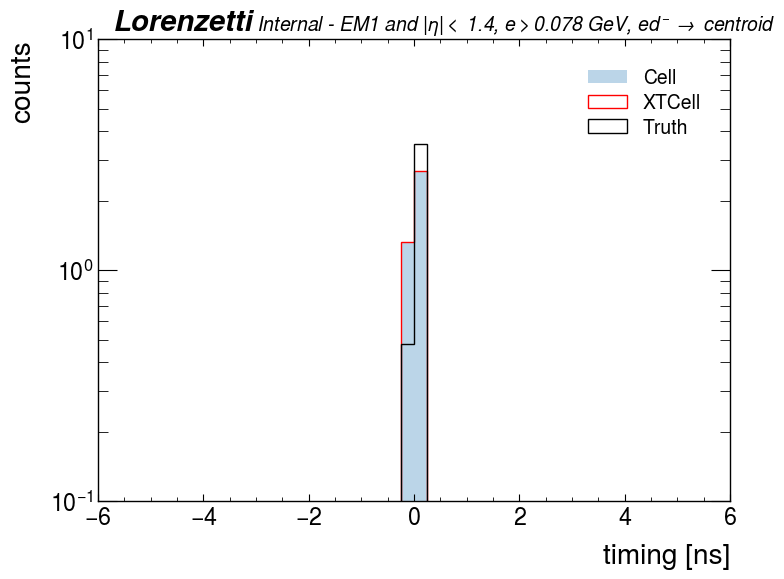

No handles with labels found to put in legend.


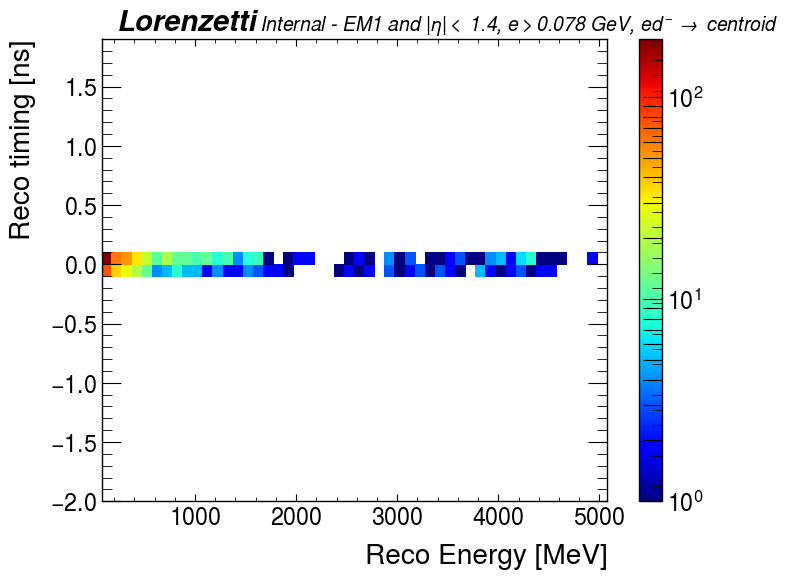

No handles with labels found to put in legend.


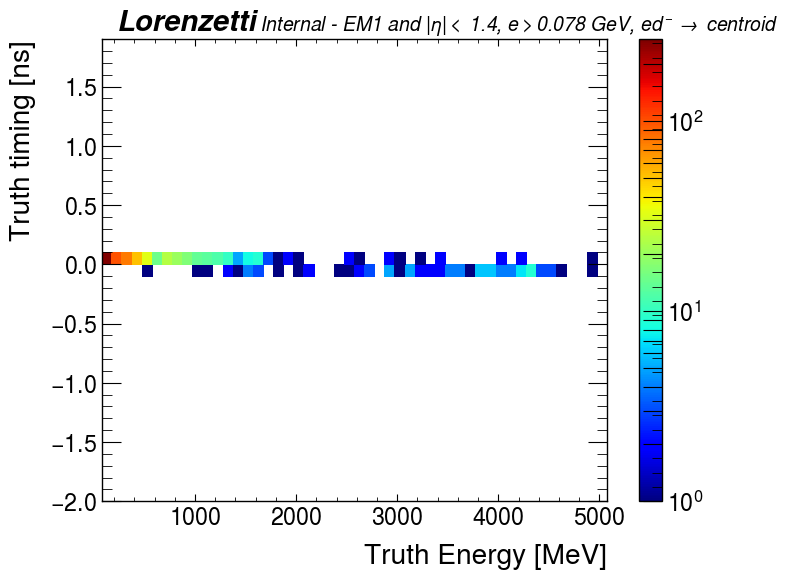

No handles with labels found to put in legend.


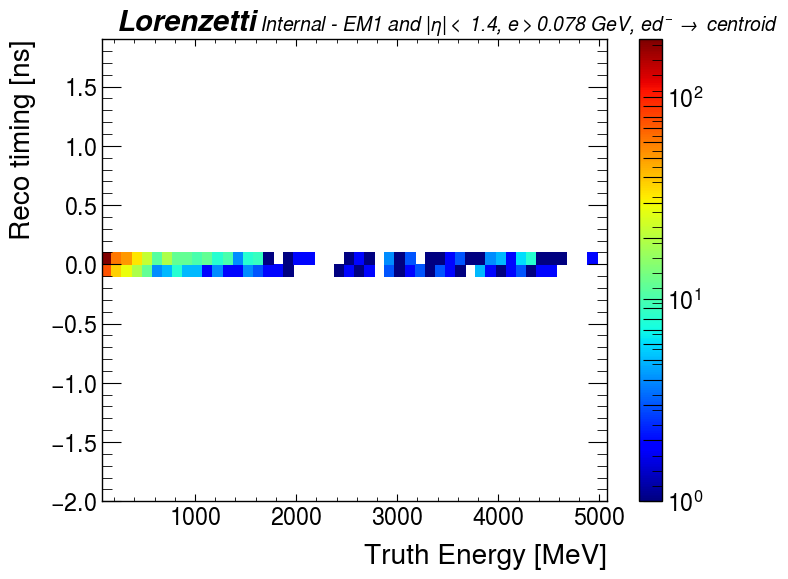

No handles with labels found to put in legend.


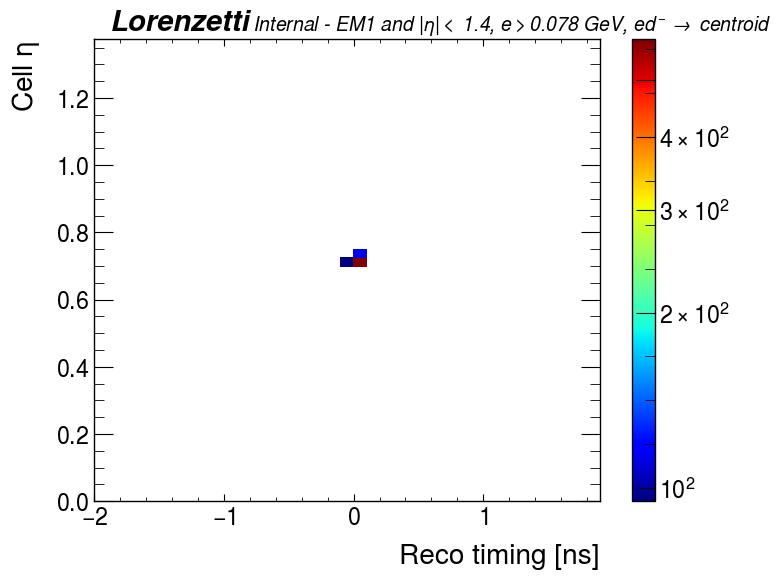

No handles with labels found to put in legend.


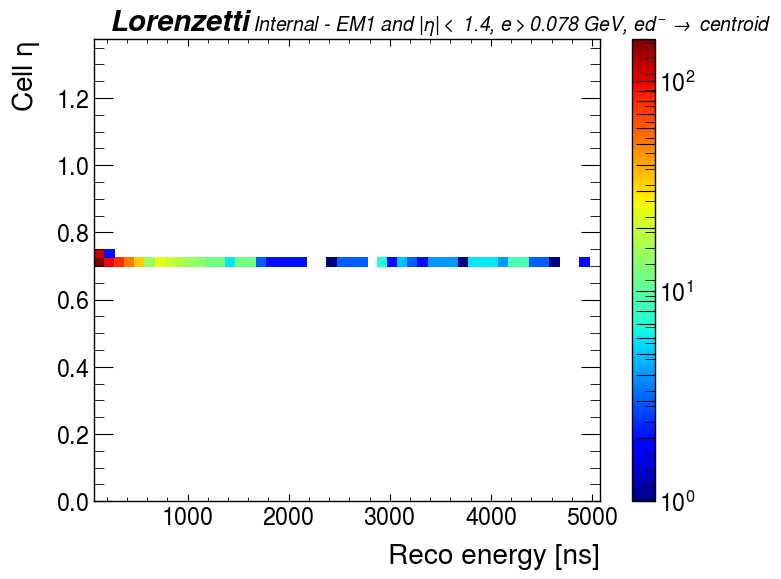

In [20]:
sig_dict = sig_dict20Fix


plt.figure()
# plt.plot(sig_dict['cell_tof'][event], sig_dict['cell_tau'][event],'x')
binMin   = -5.0
binMax   = 5.0
binWidth = 0.25
# c, xbins = np.histogram([-50,50], bins=40)
xbins = np.arange(binMin, binMax, binWidth)
plt.hist(np.concatenate(sig_dict['cell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='Cell', density=True)
plt.hist(np.concatenate(sig_dict['xtcell_tau']).flatten(), bins =xbins, histtype='step',label='XTCell',color='red', density=True)
plt.hist(np.concatenate(sig_dict['cell_tof']).flatten(), bins =xbins, histtype='step',label='Truth',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,path_signal[1]))
plt.yscale('log')
plt.xlabel('timing [ns]')
plt.ylabel('counts')
plt.legend()
plt.show()

ybinMin   = -2.0
ybinMax   = 2.0
ybinWidth = 0.1
xbinMin   = SigmaCut*sampNoise[caloSampling]
xbinMax   = max(np.concatenate(sig_dict['cell_e']).flatten())
xbinWidth = 100
ybins = np.arange(ybinMin, ybinMax, ybinWidth)
xbins = np.arange(xbinMin, xbinMax, xbinWidth)
# plt.hist(np.concatenate(sig_dict['cell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='Cell', density=True)
plt.hist2d(np.concatenate(sig_dict['cell_e']).flatten(), np.concatenate(sig_dict['cell_tau']).flatten(),bins=[xbins,ybins], cmin=1,norm=mcolors.SymLogNorm(linthresh=0.5, linscale=1, base=10), cmap=plt.cm.jet)
# plt.hist(np.concatenate(sig_dict['xtcell_tau']).flatten(), bins =xbins, histtype='step',label='XTCell',color='red', density=True)
# plt.hist(np.concatenate(sig_dict['cell_tof']).flatten(), bins =xbins, histtype='step',label='Truth',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,path_signal[1]))
# plt.yscale('log')
plt.colorbar()
plt.xlabel('Reco Energy [MeV]')
plt.ylabel('Reco timing [ns]')
plt.legend()
plt.show()

ybinMin   = -2.0
ybinMax   = 2.0
ybinWidth = 0.1
xbinMin   = SigmaCut*sampNoise[caloSampling]
xbinMax   = max(np.concatenate(sig_dict['cell_edep']).flatten())
xbinWidth = 100
ybins = np.arange(ybinMin, ybinMax, ybinWidth)
xbins = np.arange(xbinMin, xbinMax, xbinWidth)
# plt.hist(np.concatenate(sig_dict['cell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='Cell', density=True)
plt.hist2d(np.concatenate(sig_dict['cell_edep']).flatten(), np.concatenate(sig_dict['cell_tof']).flatten(),bins=[xbins,ybins], cmin=1,norm=mcolors.SymLogNorm(linthresh=0.5, linscale=1, base=10), cmap=plt.cm.jet)
# plt.hist(np.concatenate(sig_dict['xtcell_tau']).flatten(), bins =xbins, histtype='step',label='XTCell',color='red', density=True)
# plt.hist(np.concatenate(sig_dict['cell_tof']).flatten(), bins =xbins, histtype='step',label='Truth',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,path_signal[1]))
# plt.xscale('log')
plt.colorbar()
plt.xlabel('Truth Energy [MeV]')
plt.ylabel('Truth timing [ns]')
plt.legend()
plt.show()

ybinMin   = -2.0
ybinMax   = 2.0
ybinWidth = 0.1
xbinMin   = SigmaCut*sampNoise[caloSampling]
xbinMax   = max(np.concatenate(sig_dict['cell_edep']).flatten())
xbinWidth = 100
ybins = np.arange(ybinMin, ybinMax, ybinWidth)
xbins = np.arange(xbinMin, xbinMax, xbinWidth)
# plt.hist(np.concatenate(sig_dict['cell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='Cell', density=True)
plt.hist2d(np.concatenate(sig_dict['cell_edep']).flatten(), np.concatenate(sig_dict['cell_tau']).flatten(),bins=[xbins,ybins], cmin=1,norm=mcolors.SymLogNorm(linthresh=0.5, linscale=1, base=10), cmap=plt.cm.jet)
# plt.hist(np.concatenate(sig_dict['xtcell_tau']).flatten(), bins =xbins, histtype='step',label='XTCell',color='red', density=True)
# plt.hist(np.concatenate(sig_dict['cell_tof']).flatten(), bins =xbins, histtype='step',label='Truth',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,path_signal[1]))
# plt.xscale('log')
plt.colorbar()
plt.xlabel('Truth Energy [MeV]')
plt.ylabel('Reco timing [ns]')
plt.legend()
plt.show()

ybinMin   = 0
ybinMax   = 1.4
ybinWidth = caloDetaWidth[caloSampling]
xbinMin   = -2.0
xbinMax   = 2.0
xbinWidth = 0.1
ybins = np.arange(ybinMin, ybinMax, ybinWidth)
xbins = np.arange(xbinMin, xbinMax, xbinWidth)
# plt.hist(np.concatenate(sig_dict['cell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='Cell', density=True)
plt.hist2d(np.concatenate(sig_dict['cell_tof']).flatten(), np.concatenate(sig_dict['cell_eta']).flatten(),bins=[xbins,ybins], cmin=1,norm=mcolors.SymLogNorm(linthresh=0.5, linscale=1, base=10), cmap=plt.cm.jet)
# plt.hist(np.concatenate(sig_dict['xtcell_tau']).flatten(), bins =xbins, histtype='step',label='XTCell',color='red', density=True)
# plt.hist(np.concatenate(sig_dict['cell_tof']).flatten(), bins =xbins, histtype='step',label='Truth',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,path_signal[1]))
# plt.yscale('log')
plt.colorbar()
plt.ylabel('Cell $\eta$')
plt.xlabel('Reco timing [ns]')
plt.legend()
plt.show()

ybinMin   = 0
ybinMax   = 1.4
ybinWidth = caloDetaWidth[caloSampling]
xbinMin   = SigmaCut*sampNoise[caloSampling]
xbinMax   = max(np.concatenate(sig_dict['cell_edep']).flatten())
xbinWidth = 100
ybins = np.arange(ybinMin, ybinMax, ybinWidth)
xbins = np.arange(xbinMin, xbinMax, xbinWidth)
# plt.hist(np.concatenate(sig_dict['cell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='Cell', density=True)
plt.hist2d(np.concatenate(sig_dict['cell_edep']).flatten(), np.concatenate(sig_dict['cell_eta']).flatten(),bins=[xbins,ybins], cmin=1,norm=mcolors.SymLogNorm(linthresh=0.5, linscale=1, base=10), cmap=plt.cm.jet)
# plt.hist(np.concatenate(sig_dict['xtcell_tau']).flatten(), bins =xbins, histtype='step',label='XTCell',color='red', density=True)
# plt.hist(np.concatenate(sig_dict['cell_tof']).flatten(), bins =xbins, histtype='step',label='Truth',color='black', density=True)
lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ centroid'.format(1.4,SigmaCut*sampNoise[caloSampling]/1000,path_signal[1]))
# plt.yscale('log')
plt.colorbar()
plt.ylabel('Cell $\eta$')
plt.xlabel('Reco energy [ns]')
plt.legend()
plt.show()


#### Timing III - XT bump

In [8]:
# Reading AOD data

plotsPath = '/home/mhufnage/lorenzetti/Plots_lorenzetti/ML_data_validation/Timing/'
aliasName = 'timingBump'

xt_ind = 2.3
xt_cap = 4.2

path_signal50Centroid                       = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_Cap{}_Ind{}/electron.AOD.root'.format(xt_cap, xt_ind), 50,'centroid']
path_signal50CentroidNewChargeFix           = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_newChargeCorrection/electron.AOD.root', 50,'centroid'] # L=2.3,C=4.2
path_signal50CentroidNewChargeFixUncert     = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_newChargeCorrectionUncert/electron.AOD.root', 50,'centroid'] # L=2.3,C=4.2
path_signal50CentroidNoNoise                = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_noNoise_Cap{}_Ind{}/electron.AOD.root'.format(xt_cap, xt_ind), 50,'centroid']
# path_signal50Volume                       = ['/data/atlas/mhufnage/lzt_single_e/elec1000Evts_singleCell_volume/AOD/electron.AOD.root', 50,'volume']
# path_signal50VolumeNoNoise                = ['/data/atlas/mhufnage/lzt_single_e/elec1000Evts_singleCell_volume/AOD_noNoise/electron.AOD.root', 50,'volume']
path_signal50Volume                         = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_volume_e50_DS1/AOD/electron.AOD.root', 50,'volume']
path_signal50VolumeNoNoise                  = ['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_volume_e50_DS1/AOD_noNoise/electron.AOD.root', 50,'volume']

path = '/'.join(path_signal50Centroid[0].split('/')[:-1])+'/'

# Saving NPZ data 
#phase space regions
etBin  = [[15 , 20] ,[20, 30]  ,[30, 40]  ,[40, 50],[50,100],[100,10000000]]
etaBin = [[0.00, 0.80], [0.80, 1.37], [1.37,1.54],[1.54,2.50],[2.50,3.2]]

# event max
sampNoise = [90, 26, 26, 60, 40] # PSB, PSE, EM1, EM2, EM3
sampText  = ['PSB', 'PSE', 'EM1', 'EM2', 'EM3']
caloDetaWidth = [0.025, 0.025,0.00325,0.025,0.050]
caloDphiWidth = [np.pi/32, np.pi/32 ,np.pi/32,np.pi/128,np.pi/128]

conditions = {
    'evtMax':          1000,
    'SigmaCut':        1,
    'caloSampling':    CaloSampling.EMB2,
    'EtaCut':          1.4,
    'etaSize':         5,
    'phiSize':         5,
    'dumpCells':       True,
    'bDumpWindowOnly': True,
    'bNoEneCut':       True,
    'XTalkLevel':      'L = 2.3%, C = 4.2%'
}

sig_dictCent                    = read_events(path_signal50Centroid[0]                  ,conditions['evtMax'],1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=conditions['dumpCells'],m_dumpOnlyWindow=conditions['bDumpWindowOnly'],   m_sampling_filter=[conditions['caloSampling']], m_eta_cut=1.4, m_eta_win=conditions['etaSize'], m_phi_win=conditions['phiSize'], m_sigma_cut=conditions['SigmaCut'], m_noEneCut=conditions['bNoEneCut'])
sig_dictCentNNoise              = read_events(path_signal50CentroidNoNoise[0]           ,conditions['evtMax'],1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=conditions['dumpCells'],m_dumpOnlyWindow=conditions['bDumpWindowOnly'],   m_sampling_filter=[conditions['caloSampling']], m_eta_cut=1.4, m_eta_win=conditions['etaSize'], m_phi_win=conditions['phiSize'], m_sigma_cut=conditions['SigmaCut'], m_noEneCut=conditions['bNoEneCut'])
sig_dictVol                     = read_events(path_signal50Volume[0]                    ,conditions['evtMax'],1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=conditions['dumpCells'],m_dumpOnlyWindow=conditions['bDumpWindowOnly'],   m_sampling_filter=[conditions['caloSampling']], m_eta_cut=1.4, m_eta_win=conditions['etaSize'], m_phi_win=conditions['phiSize'], m_sigma_cut=conditions['SigmaCut'], m_noEneCut=conditions['bNoEneCut'])
sig_dictVolNNoise               = read_events(path_signal50VolumeNoNoise[0]             ,conditions['evtMax'],1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=conditions['dumpCells'],m_dumpOnlyWindow=conditions['bDumpWindowOnly'],   m_sampling_filter=[conditions['caloSampling']], m_eta_cut=1.4, m_eta_win=conditions['etaSize'], m_phi_win=conditions['phiSize'], m_sigma_cut=conditions['SigmaCut'], m_noEneCut=conditions['bNoEneCut'])
sig_dictCentNewChargeFix        = read_events(path_signal50CentroidNewChargeFix[0]      ,conditions['evtMax'],1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=conditions['dumpCells'],m_dumpOnlyWindow=conditions['bDumpWindowOnly'],   m_sampling_filter=[conditions['caloSampling']], m_eta_cut=1.4, m_eta_win=conditions['etaSize'], m_phi_win=conditions['phiSize'], m_sigma_cut=conditions['SigmaCut'], m_noEneCut=conditions['bNoEneCut'])
sig_dictCentNewChargeFixUncert  = read_events(path_signal50CentroidNewChargeFixUncert[0],conditions['evtMax'],1,etBin,etaBin,m_phaseSpaceDiv=False,m_dumpCells=conditions['dumpCells'],m_dumpOnlyWindow=conditions['bDumpWindowOnly'],   m_sampling_filter=[conditions['caloSampling']], m_eta_cut=1.4, m_eta_win=conditions['etaSize'], m_phi_win=conditions['phiSize'], m_sigma_cut=conditions['SigmaCut'], m_noEneCut=conditions['bNoEneCut'])

print(' Dumped lzt data successfully')


	Event 0/9970...


	Event 0/9970...
	Event 0/9970...
	Event 0/9970...
	Event 0/9970...
	Event 0/9970...
 Dumped lzt data successfully


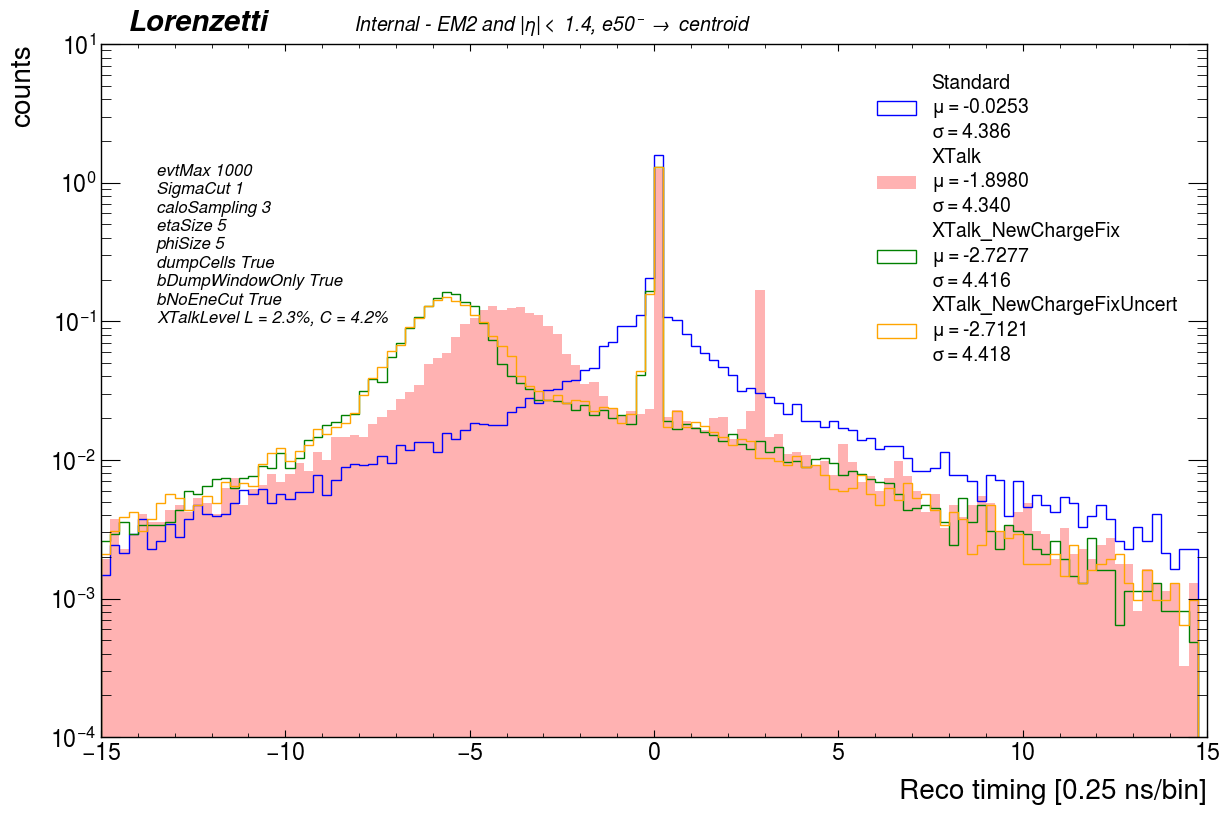

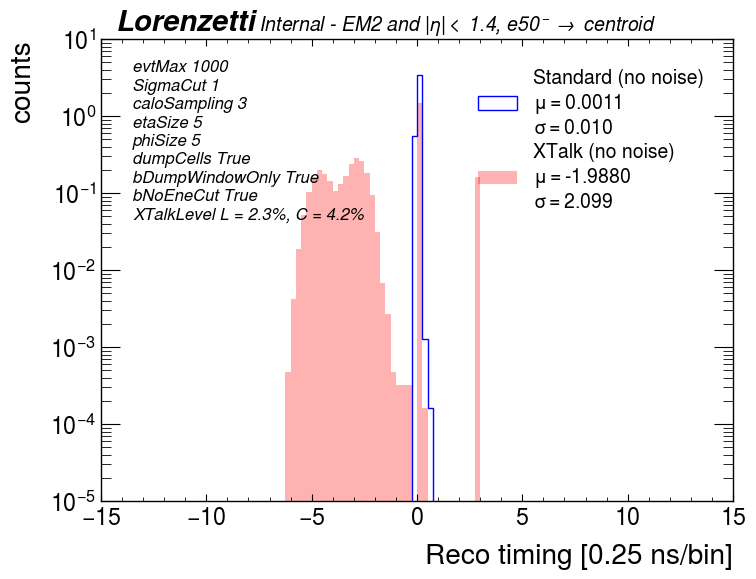

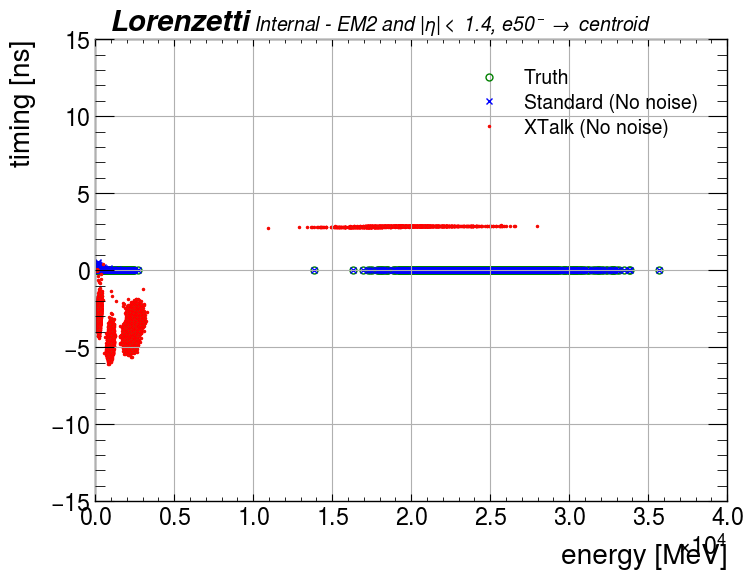

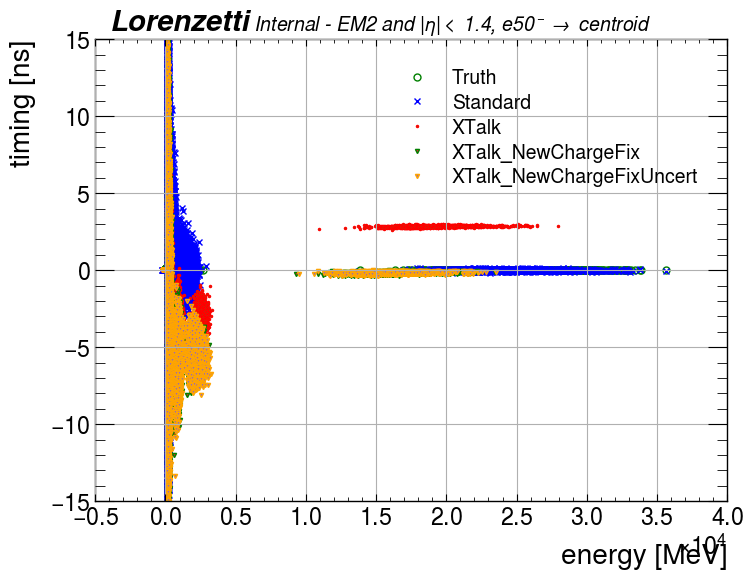

In [9]:
simulationType = 'centroid'

if simulationType == 'centroid':
    standardDict = sig_dictCent
    noNoiseDict  = sig_dictCentNNoise
if simulationType == 'volume':
    standardDict = sig_dictVol
    noNoiseDict  = sig_dictVolNNoise
    

caloSampling = conditions['caloSampling']

binMin   = -15
binMax   = 15
binWidth = 0.25

plt.figure(figsize=(14,9))
xbins = np.arange(binMin, binMax, binWidth)
plt.hist(np.concatenate(standardDict['cell_tau']).flatten(), bins =xbins, histtype='step',label='Standard\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['cell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['cell_tau']).flatten())),color='blue', density=True)
plt.hist(np.concatenate(standardDict['xtcell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='XTalk\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['xtcell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['xtcell_tau']).flatten())),color='red', density=True)
plt.hist(np.concatenate(sig_dictCentNewChargeFix['xtcell_tau']).flatten(), bins =xbins, histtype='step',label='XTalk_NewChargeFix\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCentNewChargeFix['xtcell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCentNewChargeFix['xtcell_tau']).flatten())),color='green', density=True)
plt.hist(np.concatenate(sig_dictCentNewChargeFixUncert['xtcell_tau']).flatten(), bins =xbins, histtype='step',label='XTalk_NewChargeFixUncert\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCentNewChargeFixUncert['xtcell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCentNewChargeFixUncert['xtcell_tau']).flatten())),color='orange', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(1.4,'50',simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(1.4,conditions['SigmaCut']*sampNoise[caloSampling]/1000,'50',simulationType))
conditionsText(conditions)
plt.yscale('log')
plt.xlabel('Reco timing [{} ns/bin]'.format(binWidth))
plt.ylabel('counts')
plt.legend()
plt.savefig(plotsPath+'{}_{}_{}_tau_reco_eta{}.png'.format(aliasName,simulationType,sampText[caloSampling],1.4))
# plt.close()
plt.show()

plt.figure()
xbins = np.arange(binMin, binMax, binWidth)
plt.hist(np.concatenate(noNoiseDict['cell_tau']).flatten(), bins =xbins, histtype='step',label='Standard (no noise)\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(noNoiseDict['cell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(noNoiseDict['cell_tau']).flatten())),color='blue', density=True)
plt.hist(np.concatenate(noNoiseDict['xtcell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='XTalk (no noise)\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(noNoiseDict['xtcell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(noNoiseDict['xtcell_tau']).flatten())),color='red', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(1.4,'50',simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(1.4,conditions['SigmaCut']*sampNoise[caloSampling]/1000,'50',simulationType))
conditionsText(conditions)
plt.yscale('log')
plt.xlabel('Reco timing [{} ns/bin]'.format(binWidth))
plt.ylabel('counts')
plt.legend()
plt.savefig(plotsPath+'{}_{}_{}_tau_reco_noNoise_eta{}.png'.format(aliasName,simulationType,sampText[caloSampling],1.4))
# plt.close()
plt.show()

plt.figure()
# plt.hist(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten(), bins =xbins, histtype='step',label='Standard (no noise)\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten())),color='blue', density=True)
plt.plot( np.concatenate(noNoiseDict['cell_edep']).flatten() ,np.concatenate(noNoiseDict['cell_tof']).flatten(),marker='o', mfc='none',mec='green', ms=5, lw=0, label='Truth')
plt.plot( np.concatenate(noNoiseDict['cell_e']).flatten() ,np.concatenate(noNoiseDict['cell_tau']).flatten(),marker='x', mec='blue', ms=5, lw=0, label='Standard (No noise)')
plt.plot( np.concatenate(noNoiseDict['xtcell_e']).flatten() ,np.concatenate(noNoiseDict['xtcell_tau']).flatten(),marker='.', mec='red', ms=3, lw=0, label='XTalk (No noise)')
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(1.4,'50',simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(1.4,conditions['SigmaCut']*sampNoise[caloSampling]/1000,'50',simulationType))
# conditionsText(conditions)
# plt.yscale('log')
plt.ylabel('timing [ns]')
plt.xlabel('energy [MeV]')
plt.ylim([binMin,binMax])
plt.legend()
plt.savefig(plotsPath+'{}_{}_{}_ene-tau_reco_noNoise_eta{}.png'.format(aliasName,simulationType,sampText[caloSampling],1.4))
plt.grid()
# plt.close()
plt.show()

plt.figure()
# plt.hist(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten(), bins =xbins, histtype='step',label='Standard (no noise)\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten())),color='blue', density=True)
plt.plot( np.concatenate(standardDict['cell_edep']).flatten() ,np.concatenate(standardDict['cell_tof']).flatten(),marker='o', mfc='none',mec='green', ms=5, lw=0, label='Truth')
plt.plot( np.concatenate(standardDict['cell_e']).flatten() ,np.concatenate(standardDict['cell_tau']).flatten(),marker='x', mec='blue', ms=5, lw=0, label='Standard')
plt.plot( np.concatenate(standardDict['xtcell_e']).flatten() ,np.concatenate(standardDict['xtcell_tau']).flatten(),marker='.', mec='red', ms=3, lw=0, label='XTalk')
plt.plot( np.concatenate(sig_dictCentNewChargeFix['xtcell_e']).flatten() ,np.concatenate(sig_dictCentNewChargeFix['xtcell_tau']).flatten(),marker='v', mec='green', ms=3, lw=0, label='XTalk_NewChargeFix')
plt.plot( np.concatenate(sig_dictCentNewChargeFixUncert['xtcell_e']).flatten() ,np.concatenate(sig_dictCentNewChargeFixUncert['xtcell_tau']).flatten(),marker='v', mec='orange', ms=3, lw=0, label='XTalk_NewChargeFixUncert')
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(1.4,'50',simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(1.4,conditions['SigmaCut']*sampNoise[caloSampling]/1000,'50',simulationType))
# conditionsText(conditions)
# plt.yscale('log')
plt.ylabel('timing [ns]')
plt.xlabel('energy [MeV]')
plt.ylim([binMin,binMax])
plt.legend()
plt.savefig(plotsPath+'{}_{}_{}_ene-tau_reco_eta{}.png'.format(aliasName,simulationType,sampText[caloSampling],1.4))
plt.grid()
# plt.close()
plt.show()


### Multiple Energy (Analysis)
    - Electrons on centroid:
        - 1.000 Events
        - 1, 2, 5, 10, 15, 20, 30, 40, 50, 60, 80, 100, 120, 150, 200 GeV.

In [11]:

datasetPath     = '/data/atlas/mhufnage/lzt_single_e/'
datasets        = glob(datasetPath+'elec_1kEvts_centroid_e*/AOD/electron.AOD.root')

data_e50_highXT = '/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_Cap{}_Ind{}/electron.AOD.root'.format(4.2, 2.3)
data_e50_lowXT  ='/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_Cap0.0_Ind0.4/electron.AOD.root'

aliasName = 'timingBump_multiEnergy'

eventLim = 1000

# path            = '/'.join(path_signal.split('/')[:-1])+'/'

datasetsEnergies = []
for path in datasets:
    ene = str(path).split('/')[-3].split('_e')[-1]
    datasetsEnergies.append(int(ene))

# Saving NPZ data 
#phase space regions
etBin  = [[15 , 20] ,[20, 30]  ,[30, 40]  ,[40, 50],[50,100],[100,10000000]]
etaBin = [[0.00, 0.80], [0.80, 1.37], [1.37,1.54],[1.54,2.50],[2.50,3.2]]

# event max
sampNoise = [90, 26, 26, 60, 40] # PSB, PSE, EM1, EM2, EM3
sampText  = ['PSB', 'PSE', 'EM1', 'EM2', 'EM3']
caloDetaWidth = [0.025, 0.025,0.00325,0.025,0.050]
caloDphiWidth = [np.pi/32, np.pi/32 ,np.pi/32,np.pi/128,np.pi/128]

conditions = {
    'evtMax':          eventLim,
    'SigmaCut':        1,
    'EtaCut':          1.4,
    'caloSampling':    CaloSampling.EMB2,
    'etaSize':         5,
    'phiSize':         5,
    'dumpCells':       True,
    'bDumpWindowOnly': True,
    'bNoEneCut':       True,
    'XTalkLevel':      'L = 1.1%, C = 0.0%'
}

conditionsHighXT = {
    'evtMax':          eventLim,
    'SigmaCut':        1,
    'EtaCut':          1.4,
    'caloSampling':    CaloSampling.EMB2,
    'etaSize':         5,
    'phiSize':         5,
    'dumpCells':       True,
    'bDumpWindowOnly': True,
    'bNoEneCut':       True,
    'XTalkLevel':      'L = 2.3%, C = 4.2%'
}
conditionsLowXT = {
    'evtMax':          eventLim,
    'SigmaCut':        1,
    'EtaCut':          1.4,
    'caloSampling':    CaloSampling.EMB2,
    'etaSize':         5,
    'phiSize':         5,
    'dumpCells':       True,
    'bDumpWindowOnly': True,
    'bNoEneCut':       True,
    'XTalkLevel':      'L = 0.4%, C = 0.0%'
}

dataAnalysisDict = {}

for dsIndex, inputRootData in enumerate(datasets):
    if datasetsEnergies[dsIndex] != 50:
        continue
    print(' Dataset energy: {} GeV ({}/{})'.format(datasetsEnergies[dsIndex], dsIndex+1, len(datasets)))
    dsDict = read_events(inputRootData ,
                                conditions['evtMax'],
                                1,etBin,etaBin,
                                m_phaseSpaceDiv=False,
                                m_dumpCells=conditions['dumpCells'],
                                m_dumpOnlyWindow=conditions['bDumpWindowOnly'],
                                m_sampling_filter=[conditions['caloSampling']], 
                                m_eta_cut=conditions['EtaCut'], 
                                m_eta_win=conditions['etaSize'], 
                                m_phi_win=conditions['phiSize'], 
                                m_sigma_cut=conditions['SigmaCut'], 
                                m_noEneCut=conditions['bNoEneCut'])

    dataAnalysisDict.update( {'e{}'.format(datasetsEnergies[dsIndex]): dsDict} )

sig_dictCent_high = read_events(data_e50_highXT ,
                    conditionsHighXT['evtMax'],
                    1,etBin,etaBin,
                    m_phaseSpaceDiv=False,
                    m_dumpCells=conditionsHighXT['dumpCells'],
                    m_dumpOnlyWindow=conditionsHighXT['bDumpWindowOnly'],
                    m_sampling_filter=[conditionsHighXT['caloSampling']], 
                    m_eta_cut=conditionsHighXT['EtaCut'], 
                    m_eta_win=conditionsHighXT['etaSize'], 
                    m_phi_win=conditionsHighXT['phiSize'], 
                    m_sigma_cut=conditionsHighXT['SigmaCut'], 
                    m_noEneCut=conditionsHighXT['bNoEneCut'])

sig_dictCent_low = read_events(data_e50_lowXT ,
                    conditionsLowXT['evtMax'],
                    1,etBin,etaBin,
                    m_phaseSpaceDiv=False,
                    m_dumpCells=conditionsLowXT['dumpCells'],
                    m_dumpOnlyWindow=conditionsLowXT['bDumpWindowOnly'],
                    m_sampling_filter=[conditionsLowXT['caloSampling']], 
                    m_eta_cut=conditionsLowXT['EtaCut'], 
                    m_eta_win=conditionsLowXT['etaSize'], 
                    m_phi_win=conditionsLowXT['phiSize'], 
                    m_sigma_cut=conditionsLowXT['SigmaCut'], 
                    m_noEneCut=conditionsLowXT['bNoEneCut'])
print('Dumped lzt data successfully')


 Dataset energy: 50 GeV (10/15)
	Event 0/995...


	Event 199/995...
	Event 398/995...
	Event 597/995...
	Event 796/995...
	Event 0/9970...
	Event 0/9970...
Dumped lzt data successfully


#### Timing Bump For many XTalk Values

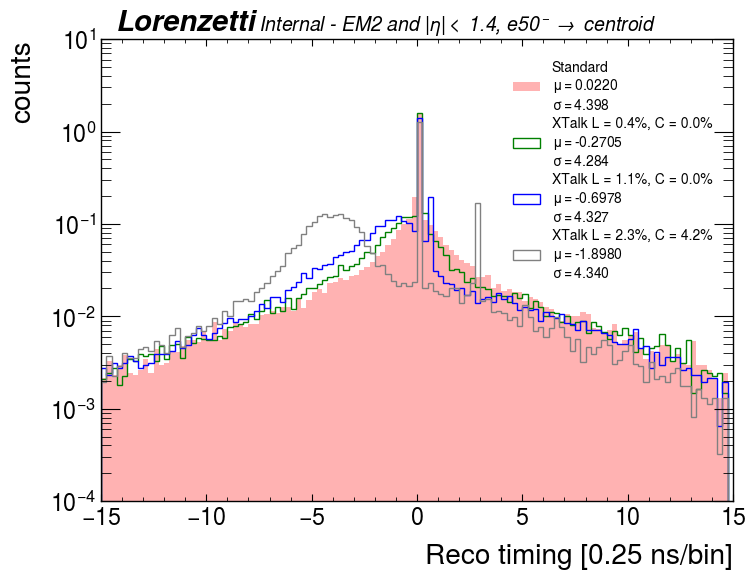

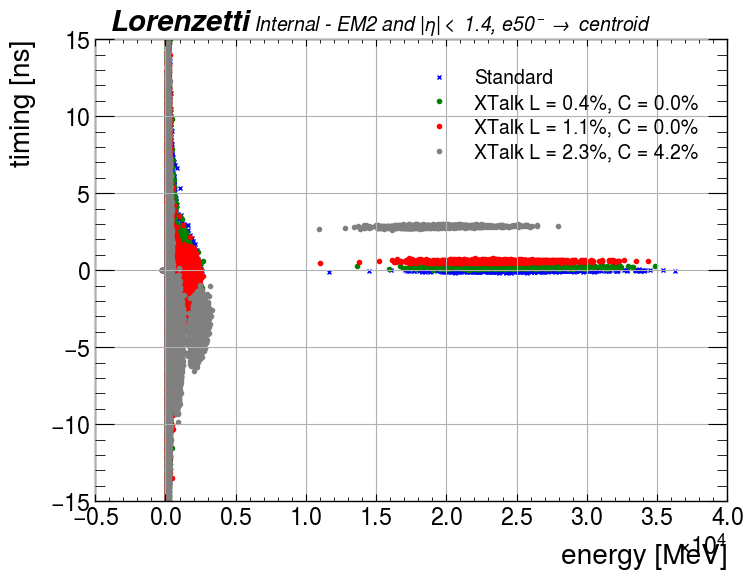

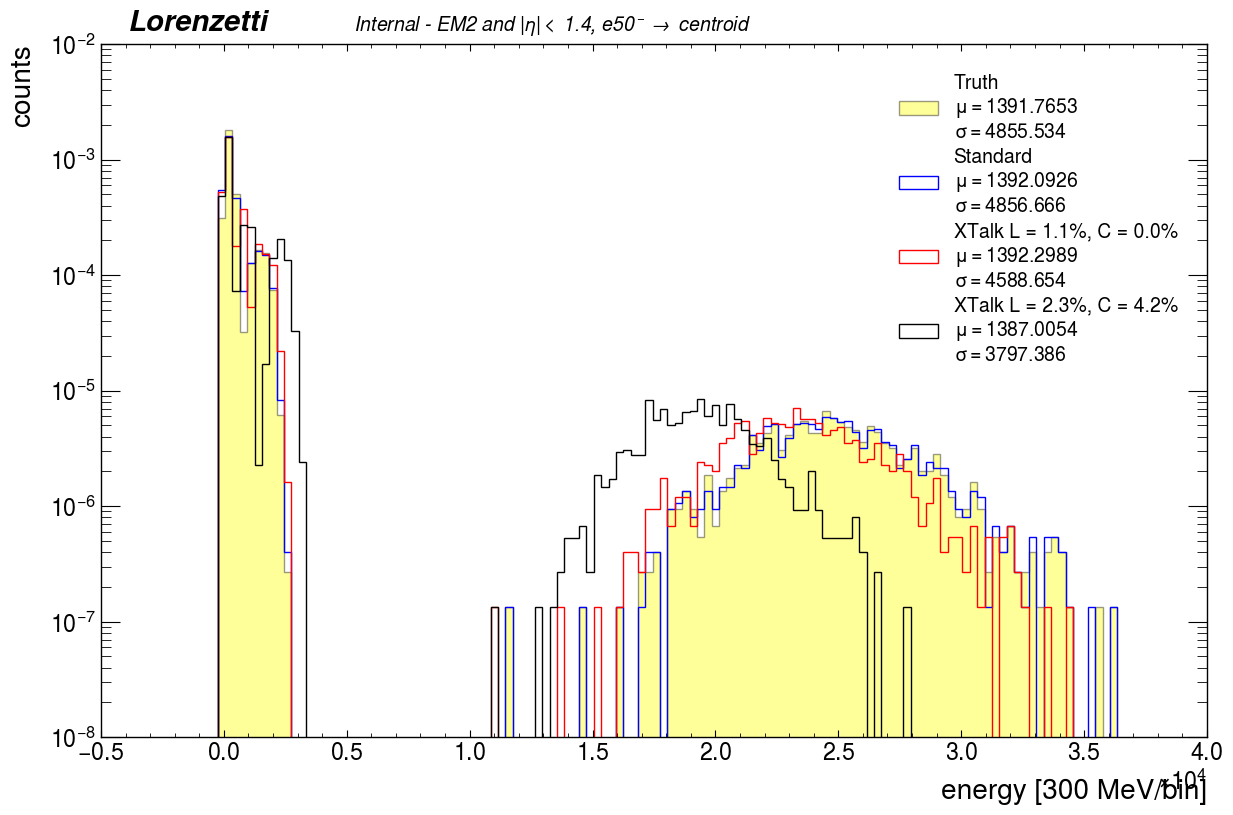

KeyError: 'e1'

In [12]:
simulationType  = 'centroid'
plotsPath       = '/home/mhufnage/lorenzetti/Plots_lorenzetti/ML_data_validation/Timing/'
aliasName       = 'timingBump_multiEnergy'

caloSampling = conditions['caloSampling']

xtLevel = [
    'L=1.1%, C=0.0%',
    'L=2.3%, C=4.2%'
]

datasetsEnergies.sort()

plt.figure()
dsEnergy = 50
dsName = 'e50'
standardDict = dataAnalysisDict['e50']
binMin   = -15
binMax   = 15
binWidth = 0.25
xbins = np.arange(binMin, binMax, binWidth)
plt.hist(np.concatenate(standardDict['cell_tau']).flatten(), bins =xbins, histtype='stepfilled',label='Standard\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['cell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['cell_tau']).flatten())),alpha=0.3, color='red', density=True)
plt.hist(np.concatenate(sig_dictCent_low['xtcell_tau']).flatten(), bins =xbins, histtype='step', label='XTalk {}\n'.format(conditionsLowXT['XTalkLevel'])+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCent_low['xtcell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCent_low['xtcell_tau']).flatten())),color='green', density=True)
plt.hist(np.concatenate(standardDict['xtcell_tau']).flatten(), bins =xbins, histtype='step', label='XTalk {}\n'.format(conditions['XTalkLevel'])+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['xtcell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['xtcell_tau']).flatten())),color='blue', density=True)
plt.hist(np.concatenate(sig_dictCent_high['xtcell_tau']).flatten(), bins =xbins, histtype='step', label='XTalk {}\n'.format(conditionsHighXT['XTalkLevel'])+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCent_high['xtcell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCent_high['xtcell_tau']).flatten())),color='gray', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
# conditionsText(conditions)
# plt.figtext(x=.2  ,y=.6,s=[],fontdict=lorenzetti_subtitle)
plt.yscale('log')
plt.xlabel('Reco timing [{} ns/bin]'.format(binWidth))
plt.ylabel('counts')
plt.legend(fontsize='10')
plt.savefig(plotsPath+'{}_{}_comparison_XTLevel_{}_{}_tau_reco_eta{}.png'.format(aliasName,dsName,simulationType,sampText[caloSampling],conditions['EtaCut']))
# plt.close()
plt.show()

plt.figure()
dsEnergy = 50
dsName = 'e50'
standardDict = dataAnalysisDict['e50']
xbins = np.arange(binMin, binMax, binWidth)
plt.plot( np.concatenate(standardDict['cell_e']).flatten() ,np.concatenate(standardDict['cell_tau']).flatten(),marker='x', mec='blue', ms=3, lw=0, label='Standard')
plt.plot( np.concatenate(sig_dictCent_low['xtcell_e']).flatten() ,np.concatenate(sig_dictCent_low['xtcell_tau']).flatten(),marker='o', mfc='green',mec='green', ms=3, lw=0, label='XTalk {}'.format(conditionsLowXT['XTalkLevel']))
plt.plot( np.concatenate(standardDict['xtcell_e']).flatten() ,np.concatenate(standardDict['xtcell_tau']).flatten(),marker='o', mfc='red', mec='red', ms=3, lw=0, label='XTalk {}'.format(conditions['XTalkLevel']))
plt.plot( np.concatenate(sig_dictCent_high['xtcell_e']).flatten() ,np.concatenate(sig_dictCent_high['xtcell_tau']).flatten(),marker='o', mfc='gray',mec='gray', ms=3, lw=0, label='XTalk {}'.format(conditionsHighXT['XTalkLevel']))
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
# conditionsText(conditions)
# plt.yscale('log')
plt.ylabel('timing [ns]')
plt.xlabel('energy [MeV]')
plt.grid()
plt.ylim([binMin,binMax])
plt.legend(fontsize='14')
plt.savefig(plotsPath+'{}_{}_comparison_XTLevel_{}_{}_ene-tau_reco_eta{}.png'.format(aliasName,dsName,simulationType,sampText[caloSampling],conditions['EtaCut']))
# plt.close()
plt.show()

fig = plt.figure(figsize=(14,9))
dsEnergy = 50
dsName = 'e50'
standardDict = dataAnalysisDict['e50']
binMin   = -250
binMax   = 40000
binWidth = 300
xbins = np.arange(binMin, binMax, binWidth)
plt.hist(np.concatenate(standardDict['cell_edep']).flatten(), bins =xbins, histtype='stepfilled',label='Truth\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['cell_edep']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['cell_edep']).flatten())),alpha=0.4,ec='black',fc='yellow', density=True)
plt.hist(np.concatenate(standardDict['cell_e']).flatten(), bins =xbins, histtype='step',label='Standard\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['cell_e']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['cell_e']).flatten())),color='blue', density=True)
# plt.hist(np.concatenate(sig_dictCent_low['xtcell_e']).flatten(), bins =xbins, histtype='step', label='XTalk {}\n'.format(conditionsLowXT['XTalkLevel'])+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCent_low['xtcell_e']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCent_low['xtcell_e']).flatten())),color='green', density=True)
plt.hist(np.concatenate(standardDict['xtcell_e']).flatten(), bins =xbins, histtype='step', label='XTalk {}\n'.format(conditions['XTalkLevel'])+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['xtcell_e']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['xtcell_e']).flatten())),color='red', density=True)
plt.hist(np.concatenate(sig_dictCent_high['xtcell_e']).flatten(), bins =xbins, histtype='step', label='XTalk {}\n'.format(conditionsHighXT['XTalkLevel'])+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCent_high['xtcell_e']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCent_high['xtcell_e']).flatten())),color='black', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
# conditionsText(conditions)
plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('energy [{} MeV/bin]'.format(binWidth))
# plt.grid()
# plt.ylim([binMin,binMax])
plt.legend(fontsize='14')
plt.savefig(plotsPath+'{}_{}_comparison_XTLevel_{}_{}_ene-reco_eta{}.png'.format(aliasName,dsName,simulationType,sampText[caloSampling],conditions['EtaCut']))
# plt.close(fig)
plt.show()

for dsEnergy in datasetsEnergies:
    dsName = 'e{}'.format(dsEnergy)
    
    standardDict = dataAnalysisDict[dsName]

    plt.figure()
    binMin   = -15
    binMax   = 15
    binWidth = 0.25
    xbins = np.arange(binMin, binMax, binWidth)
    plt.hist(np.concatenate(standardDict['cell_tau']).flatten(), bins =xbins, histtype='step',label='Standard\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['cell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['cell_tau']).flatten())),color='blue', density=True)
    plt.hist(np.concatenate(standardDict['xtcell_tau']).flatten(), bins =xbins, histtype='stepfilled', alpha=0.3,label='XTalk\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(standardDict['xtcell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(standardDict['xtcell_tau']).flatten())),color='red', density=True)
    if conditions['bNoEneCut']: lorenzettiText(pos='out',subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
    else: lorenzettiText(pos='out',subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
    conditionsText(conditions)
    plt.yscale('log')
    plt.xlabel('Reco timing [{} ns/bin]'.format(binWidth))
    plt.ylabel('counts')
    plt.legend()
    plt.savefig(plotsPath+'{}_{}_{}_{}_tau_reco_eta{}.png'.format(aliasName,dsName,simulationType,sampText[caloSampling],conditions['EtaCut']))
    plt.close()
    # plt.show()

    plt.figure()
    # plt.hist(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten(), bins =xbins, histtype='step',label='Standard (no noise)\n'+r'$\mu=${:.4f}'.format(np.mean(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten()))+"\n"+r'$\sigma=${:.3f}'.format(np.std(np.concatenate(sig_dictCentNNoise['cell_tau']).flatten())),color='blue', density=True)
    plt.plot( np.concatenate(standardDict['cell_edep']).flatten() ,np.concatenate(standardDict['cell_tof']).flatten(),marker='o', mfc='none',mec='green', ms=5, lw=0, label='Truth')
    plt.plot( np.concatenate(standardDict['cell_e']).flatten() ,np.concatenate(standardDict['cell_tau']).flatten(),marker='x', mec='blue', ms=5, lw=0, label='Standard')
    plt.plot( np.concatenate(standardDict['xtcell_e']).flatten() ,np.concatenate(standardDict['xtcell_tau']).flatten(),marker='.', mec='red', ms=3, lw=0, label='XTalk')
    if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
    else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
    # conditionsText(conditions)
    # plt.yscale('log')
    plt.ylabel('timing [ns]')
    plt.xlabel('energy [MeV]')
    plt.ylim([-15,15])
    plt.legend()
    plt.savefig(plotsPath+'{}_{}_{}_{}_ene-tau_reco_eta{}.png'.format(aliasName, dsName,simulationType,sampText[caloSampling],conditions['EtaCut']))
    plt.grid()
    plt.close()
    # plt.show()

#### Energy, Cluster, Shower Shapes

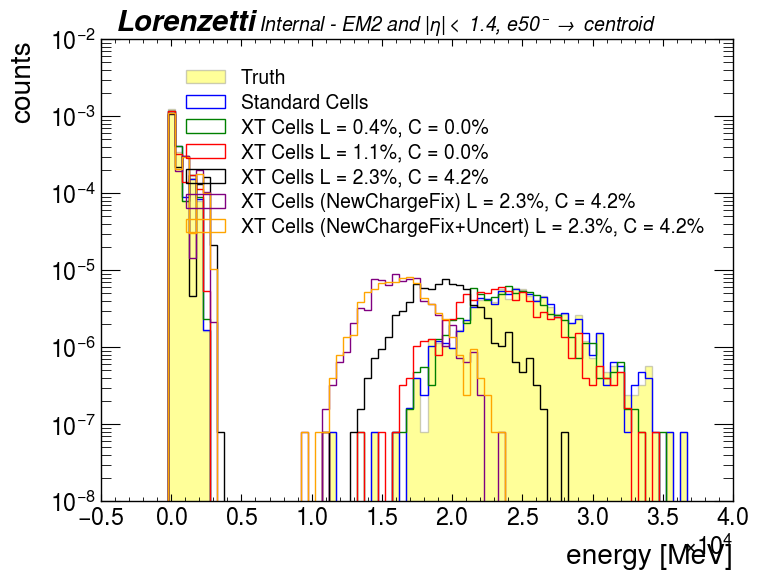

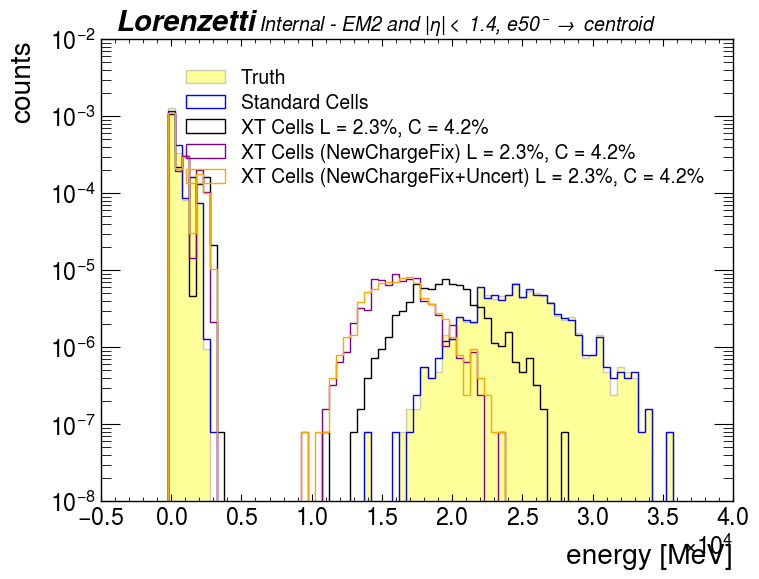

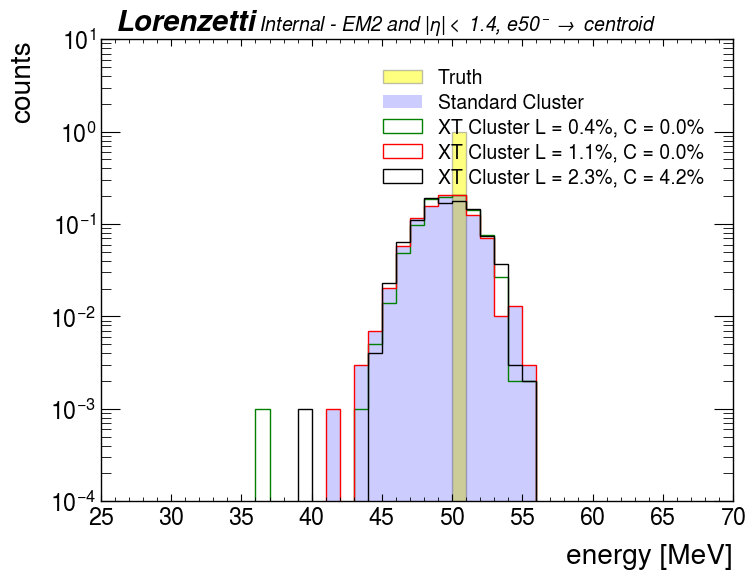

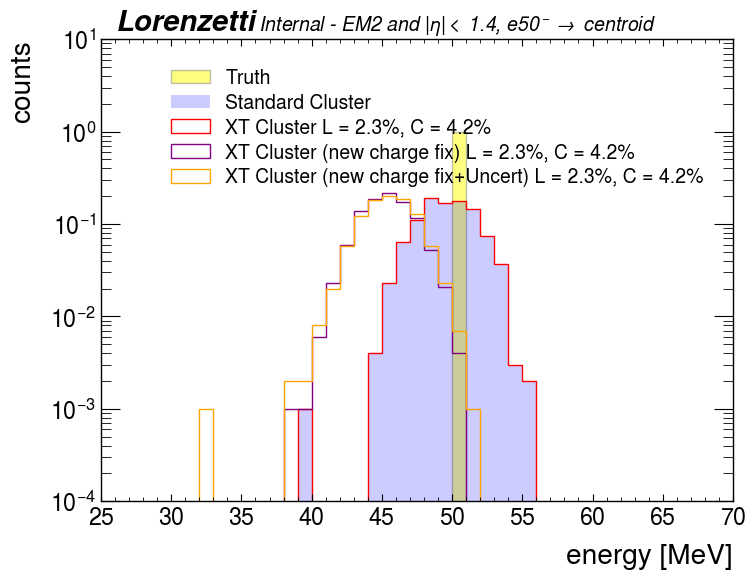

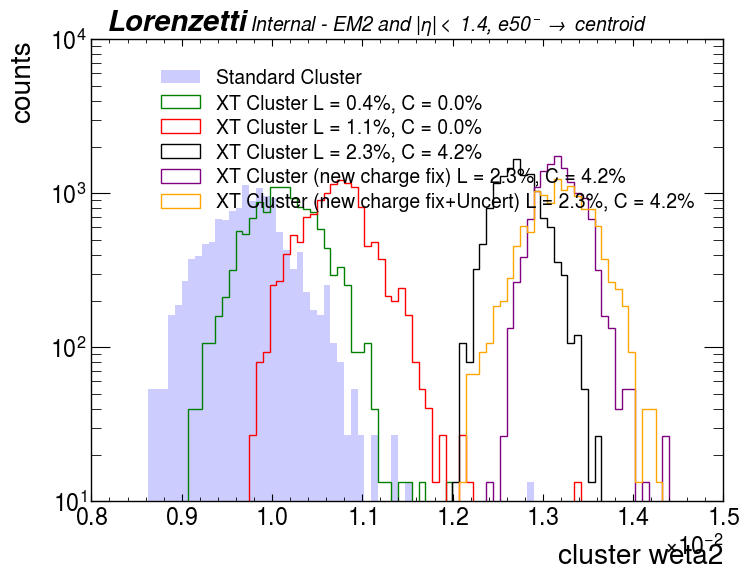

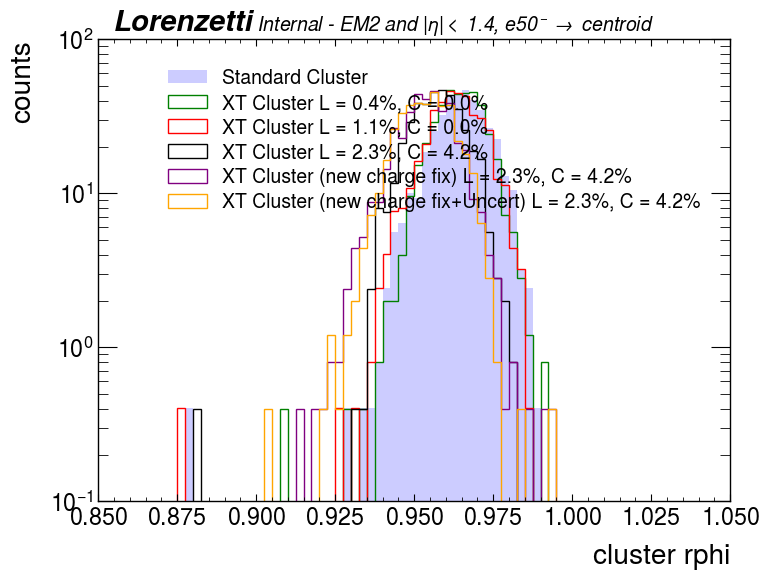

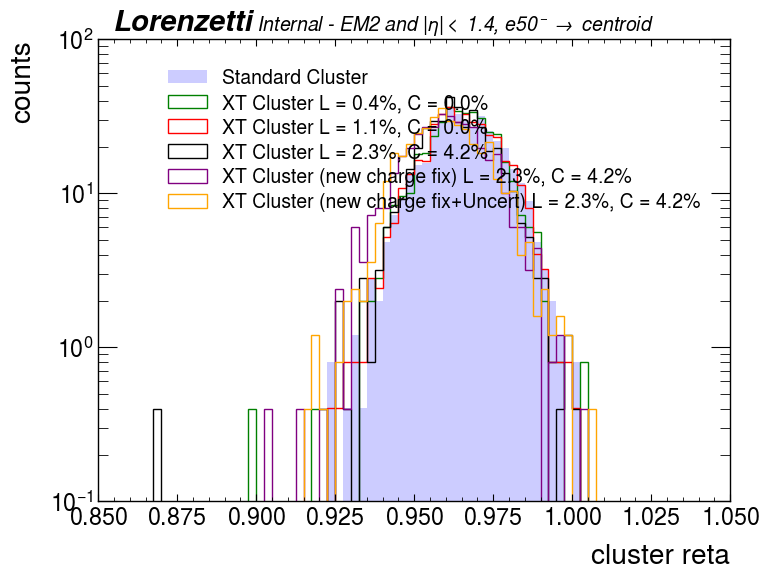

In [13]:
dsEnergy = 50
dsName = 'e50'
standardDict = dataAnalysisDict['e50']

plt.figure()
# plt.plot(sig_dict['cell_tof'][event], sig_dict['cell_tau'][event],'x')
binMin   = -250
binMax   = 40000
binWidth = 500
xbins = np.arange(binMin, binMax, binWidth)
# c, xbins = np.histogram([-500,50000], bins=40)
plt.hist(np.concatenate(standardDict['cell_edep']).flatten(), bins =xbins, histtype='stepfilled',label='Truth',alpha=0.4,ec='gray',fc='yellow', density=True)
plt.hist(np.concatenate(standardDict['cell_e']).flatten(), bins =xbins, histtype='step', label='Standard Cells',color='blue', density=True)
plt.hist(np.concatenate(sig_dictCent_low['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells {}'.format(conditionsLowXT['XTalkLevel']),color='green', density=True)
plt.hist(np.concatenate(standardDict['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells {}'.format(conditions['XTalkLevel']),color='red', density=True)
plt.hist(np.concatenate(sig_dictCent_high['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells {}'.format(conditionsHighXT['XTalkLevel']),color='black', density=True)
plt.hist(np.concatenate(sig_dictCentNewChargeFix['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells (NewChargeFix) {}'.format(conditionsHighXT['XTalkLevel']),color='purple', density=True)
plt.hist(np.concatenate(sig_dictCentNewChargeFixUncert['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells (NewChargeFix+Uncert) {}'.format(conditionsHighXT['XTalkLevel']),color='orange', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
plt.yscale('log')
plt.xlabel('energy [MeV]')
plt.ylabel('counts')
plt.legend()
plt.show()


plt.figure()
# plt.plot(sig_dict['cell_tof'][event], sig_dict['cell_tau'][event],'x')
binMin   = -250
binMax   = 40000
binWidth = 500
xbins = np.arange(binMin, binMax, binWidth)
# c, xbins = np.histogram([-500,50000], bins=40)
plt.hist(np.concatenate(sig_dictCent_high['cell_edep']).flatten(), bins =xbins, histtype='stepfilled',label='Truth',alpha=0.4,ec='gray',fc='yellow', density=True)
plt.hist(np.concatenate(sig_dictCent_high['cell_e']).flatten(), bins =xbins, histtype='step', label='Standard Cells',color='blue', density=True)
# plt.hist(np.concatenate(sig_dictCent_low['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells {}'.format(conditionsLowXT['XTalkLevel']),color='green', density=True)
# plt.hist(np.concatenate(standardDict['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells {}'.format(conditions['XTalkLevel']),color='red', density=True)
plt.hist(np.concatenate(sig_dictCent_high['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells {}'.format(conditionsHighXT['XTalkLevel']),color='black', density=True)
plt.hist(np.concatenate(sig_dictCentNewChargeFix['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells (NewChargeFix) {}'.format(conditionsHighXT['XTalkLevel']),color='purple', density=True)
plt.hist(np.concatenate(sig_dictCentNewChargeFixUncert['xtcell_e']).flatten(), bins =xbins, histtype='step',label='XT Cells (NewChargeFix+Uncert) {}'.format(conditionsHighXT['XTalkLevel']),color='orange', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
plt.yscale('log')
plt.xlabel('energy [MeV]')
plt.ylabel('counts')
plt.legend()
plt.show()


plt.figure()
binMin   = 25
binMax   = 70
binWidth = 1
xbins = np.arange(binMin, binMax, binWidth)
plt.hist(standardDict['truth_e'], bins =xbins, histtype='stepfilled',label='Truth',alpha=0.5,ec='gray',fc='yellow', density=True)
plt.hist(standardDict['cluster_e'], bins =xbins, histtype='stepfilled', label='Standard Cluster',alpha=0.2,color='blue', density=True)
plt.hist(sig_dictCent_low['xtcluster_e'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsLowXT['XTalkLevel']),color='green', density=True)
plt.hist(standardDict['xtcluster_e'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditions['XTalkLevel']),color='red', density=True)
plt.hist(sig_dictCent_high['xtcluster_e'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsHighXT['XTalkLevel']),color='black', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
plt.yscale('log')
plt.xlabel('energy [MeV]')
plt.ylabel('counts')
plt.legend()
plt.show()

plt.figure()
binMin   = 25
binMax   = 70
binWidth = 1
xbins = np.arange(binMin, binMax, binWidth)
plt.hist(sig_dictCent['truth_e'], bins =xbins, histtype='stepfilled',label='Truth',alpha=0.5,ec='gray',fc='yellow', density=True)
plt.hist(sig_dictCent['cluster_e'], bins =xbins, histtype='stepfilled', label='Standard Cluster',alpha=0.2,color='blue', density=True)
# plt.hist(sig_dictCent_low['xtcluster_e'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsLowXT['XTalkLevel']),color='green', density=True)
plt.hist(sig_dictCent['xtcluster_e'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsHighXT['XTalkLevel']),color='red', density=True)
plt.hist(sig_dictCentNewChargeFix['xtcluster_e'], bins =xbins, histtype='step',label='XT Cluster (new charge fix) {}'.format(conditionsHighXT['XTalkLevel']),color='purple', density=True)
plt.hist(sig_dictCentNewChargeFixUncert['xtcluster_e'], bins =xbins, histtype='step',label='XT Cluster (new charge fix+Uncert) {}'.format(conditionsHighXT['XTalkLevel']),color='orange', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
plt.yscale('log')
plt.xlabel('energy [MeV]')
plt.ylabel('counts')
plt.legend()
plt.show()

plt.figure()
binMin   = min(standardDict['cluster_weta2'])
binMax   = max(sig_dictCent['xtcluster_weta2'])
binWidth = 0.000075
xbins = np.arange(binMin, binMax, binWidth)
# plt.hist(standardDict['truth_e'], bins =xbins, histtype='stepfilled',label='Truth',alpha=0.5,ec='gray',fc='yellow', density=True)
plt.hist(standardDict['cluster_weta2'], bins =xbins, histtype='stepfilled', label='Standard Cluster',alpha=0.2,color='blue', density=True)
plt.hist(sig_dictCent_low['xtcluster_weta2'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsLowXT['XTalkLevel']),color='green', density=True)
plt.hist(standardDict['xtcluster_weta2'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditions['XTalkLevel']),color='red', density=True)
plt.hist(sig_dictCent_high['xtcluster_weta2'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsHighXT['XTalkLevel']),color='black', density=True)
plt.hist(sig_dictCentNewChargeFix['xtcluster_weta2'], bins =xbins, histtype='step',label='XT Cluster (new charge fix) {}'.format(conditionsHighXT['XTalkLevel']),color='purple', density=True)
plt.hist(sig_dictCentNewChargeFixUncert['xtcluster_weta2'], bins =xbins, histtype='step',label='XT Cluster (new charge fix+Uncert) {}'.format(conditionsHighXT['XTalkLevel']),color='orange', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
plt.yscale('log')
plt.xlabel('cluster weta2')
plt.ylabel('counts')
plt.legend()
plt.show()

plt.figure()
binMin   = 0.85
binMax   = 1.05
binWidth = 0.0025
xbins = np.arange(binMin, binMax, binWidth)
# plt.hist(standardDict['truth_e'], bins =xbins, histtype='stepfilled',label='Truth',alpha=0.5,ec='gray',fc='yellow', density=True)
plt.hist(standardDict['cluster_rphi'], bins =xbins, histtype='stepfilled', label='Standard Cluster',alpha=0.2,color='blue', density=True)
plt.hist(sig_dictCent_low['xtcluster_rphi'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsLowXT['XTalkLevel']),color='green', density=True)
plt.hist(standardDict['xtcluster_rphi'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditions['XTalkLevel']),color='red', density=True)
plt.hist(sig_dictCent_high['xtcluster_rphi'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsHighXT['XTalkLevel']),color='black', density=True)
plt.hist(sig_dictCentNewChargeFix['xtcluster_rphi'], bins =xbins, histtype='step',label='XT Cluster (new charge fix) {}'.format(conditionsHighXT['XTalkLevel']),color='purple', density=True)
plt.hist(sig_dictCentNewChargeFixUncert['xtcluster_rphi'], bins =xbins, histtype='step',label='XT Cluster (new charge fix+Uncert) {}'.format(conditionsHighXT['XTalkLevel']),color='orange', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
plt.yscale('log')
plt.xlabel('cluster rphi')
plt.ylabel('counts')
plt.legend()
plt.show()

plt.figure()
binMin   = 0.85
binMax   = 1.05
binWidth = 0.0025
xbins = np.arange(binMin, binMax, binWidth)
# plt.hist(standardDict['truth_e'], bins =xbins, histtype='stepfilled',label='Truth',alpha=0.5,ec='gray',fc='yellow', density=True)
plt.hist(standardDict['cluster_reta'], bins =xbins, histtype='stepfilled', label='Standard Cluster',alpha=0.2,color='blue', density=True)
plt.hist(sig_dictCent_low['xtcluster_reta'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsLowXT['XTalkLevel']),color='green', density=True)
plt.hist(standardDict['xtcluster_reta'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditions['XTalkLevel']),color='red', density=True)
plt.hist(sig_dictCent_high['xtcluster_reta'], bins =xbins, histtype='step',label='XT Cluster {}'.format(conditionsHighXT['XTalkLevel']),color='black', density=True)
plt.hist(sig_dictCentNewChargeFix['xtcluster_reta'], bins =xbins, histtype='step',label='XT Cluster (new charge fix) {}'.format(conditionsHighXT['XTalkLevel']),color='purple', density=True)
plt.hist(sig_dictCentNewChargeFixUncert['xtcluster_reta'], bins =xbins, histtype='step',label='XT Cluster (new charge fix+Uncert) {}'.format(conditionsHighXT['XTalkLevel']),color='orange', density=True)
if conditions['bNoEneCut']: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],dsEnergy,simulationType))
else: lorenzettiText(subText='      Internal - {}'.format(sampText[caloSampling])+r' and |$\eta$|$<$ {}, e$>${} GeV, $e${}$^- \rightarrow$ {}'.format(conditions['EtaCut'],conditions['SigmaCut']*sampNoise[caloSampling]/1000, dsEnergy,simulationType))
plt.yscale('log')
plt.xlabel('cluster reta')
plt.ylabel('counts')
plt.legend()
plt.show()


In [11]:
path_signal50Centroid

['/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_Cap4.2_Ind2.3/electron.AOD.root',
 50,
 'centroid']

## Machine Learning Variables: Timing spreads

	Event 3988/9970...
         total events: 5001
 Dataset energy: 50 GeV, XTalkLevel: L = 2.3%, C = 4.2%
	Event 0/9970...
	Event 1994/9970...
	Event 3988/9970...
	Event 0/9970...
	Event 1994/9970...
	Event 3988/9970...
         total events: 5001
 Dataset energy: 50 GeV, XTalkLevel: L = 0.4%, C = 0.0%
	Event 0/9970...
	Event 1994/9970...
	Event 3988/9970...
         total events: 5001
Dumped lzt data successfully


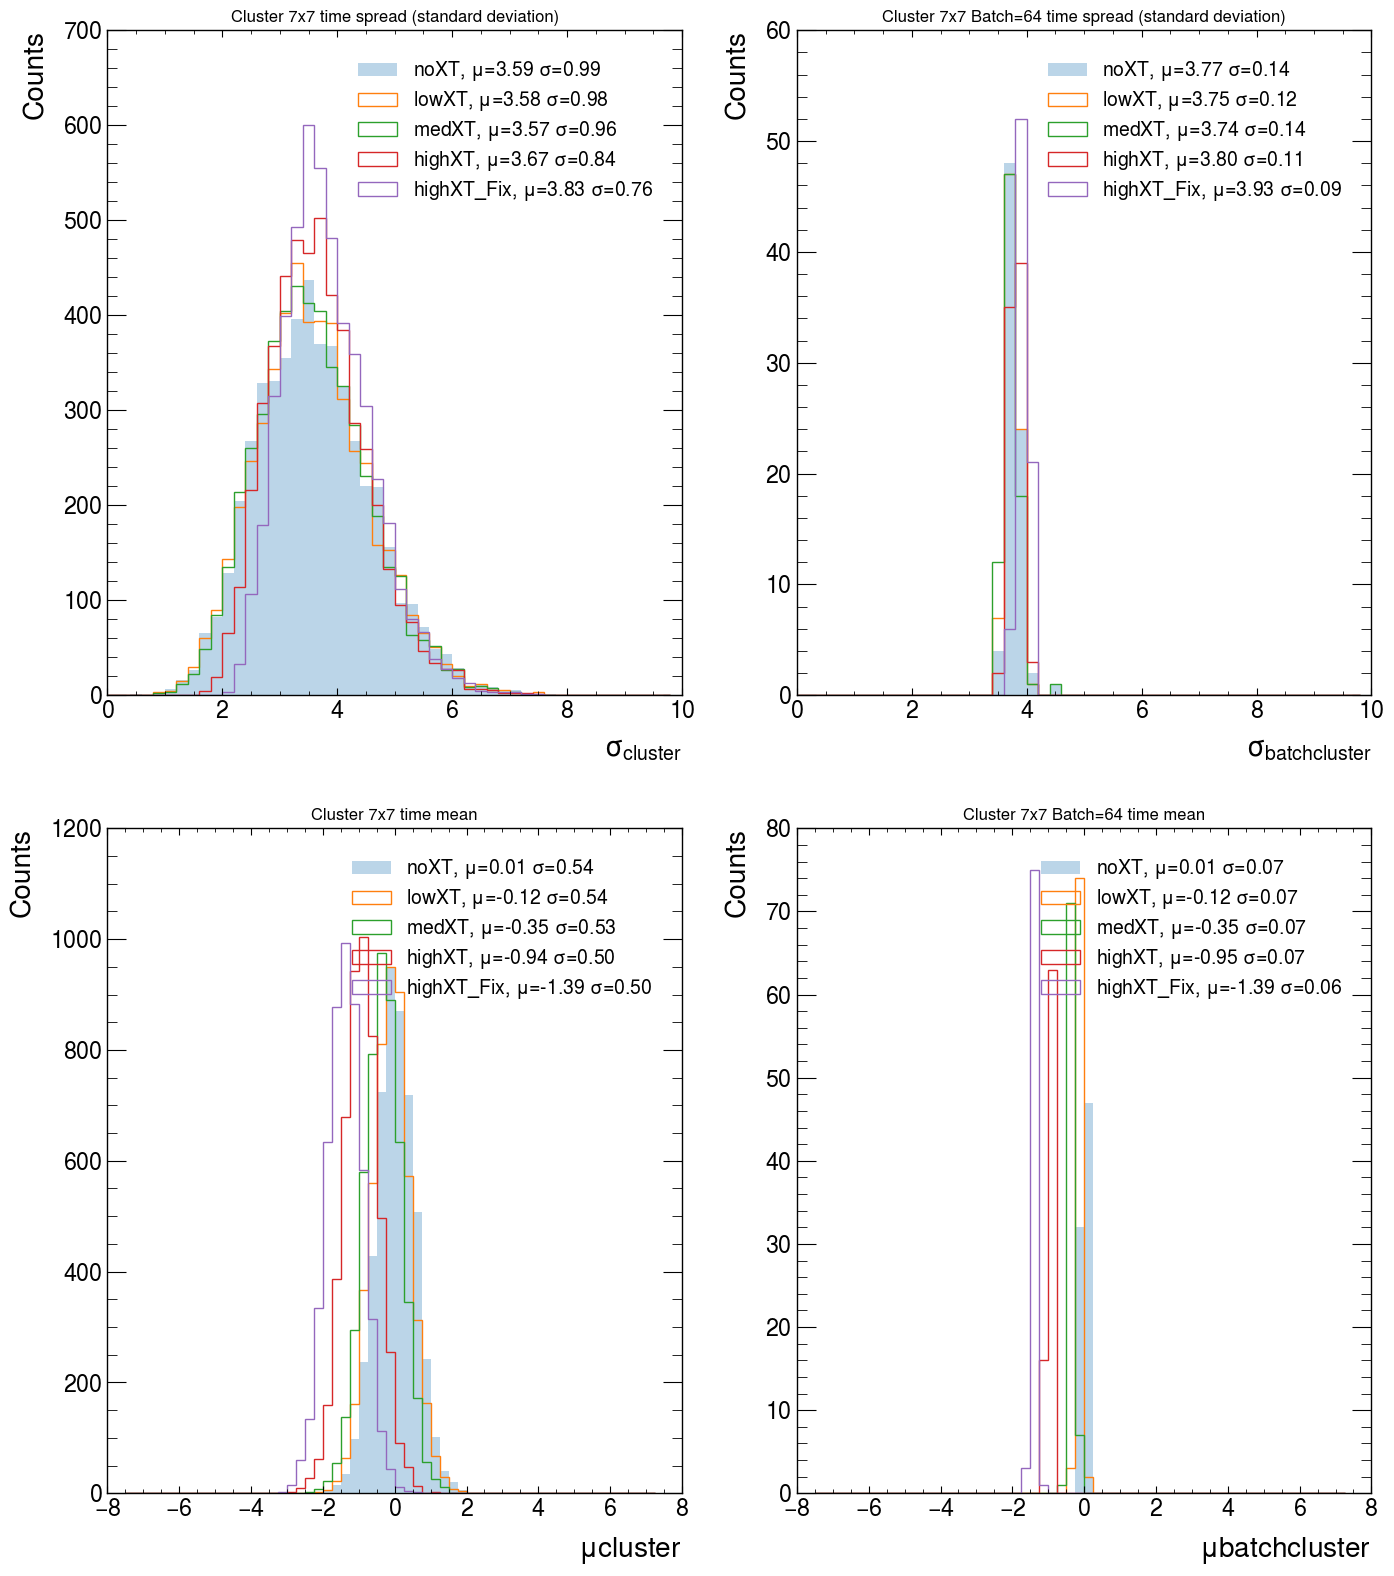

In [57]:

datasetPath     = '/data/atlas/mhufnage/lzt_single_e/'
datasets        = glob(datasetPath+'elec_1kEvts_centroid_e*/AOD/electron.AOD.root') # med XT

layersStr   = ['PSB', 'PSE', 'EM1', 'EM2', 'EM3']

data_e50_highXT_NewChargeFix ='/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_newChargeCorrection/electron.AOD.root'
data_e50_highXT              ='/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_Cap4.2_Ind2.3/electron.AOD.root'
data_e50_medXT               ='/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_Cap0.0_Ind1.1/electron.AOD.root'
data_e50_lowXT               ='/data/atlas/mhufnage/lzt_single_e/elec_singleCell_10kEvts_centroid_e50_DS1/AOD_Cap0.0_Ind0.4/electron.AOD.root'

aliasName = 'mlVariables_timingSpead'

# path            = '/'.join(path_signal.split('/')[:-1])+'/'

# Saving NPZ data 
# Plotting aux
etBin           = [[15 , 20] ,[20, 30]  ,[30, 40]  ,[40, 50],[50,100],[100,10000000]]
etaBin          = [[0.00, 0.80], [0.80, 1.37], [1.37,1.54],[1.54,2.50],[2.50,3.2]]
sampNoise       = [90, 26, 26, 60, 40] # PSB, PSE, EM1, EM2, EM3
sampText        = ['PSB', 'PSE', 'EM1', 'EM2', 'EM3']
caloDetaWidth   = [0.025, 0.025,0.00325,0.025,0.050]
caloDphiWidth   = [np.pi/32, np.pi/32 ,np.pi/32,np.pi/128,np.pi/128]

for batchSize in [8, 64]:
    print(batchSize)
    for winSize in [3,5,7]:
        print(winSize)
        #~ Conditions ~#
        evtMax          = 5000
        SigmaCut        = 1
        EtaCut          = 1.4
        caloSampling    = CaloSampling.EMB2
        etaSize         = winSize
        phiSize         = winSize
        dumpCells       = True
        bDumpWindowOnly = True
        bNoEneCut       = True

        conditions = {
            'evtMax':          evtMax,
            'SigmaCut':        SigmaCut,
            'EtaCut':          EtaCut,
            'caloSampling':    caloSampling,
            'etaSize':         etaSize,
            'phiSize':         phiSize,
            'dumpCells':       dumpCells,
            'bDumpWindowOnly': bDumpWindowOnly,
            'bNoEneCut':       bNoEneCut,
            'XTalkLevel':      'L = 1.1%, C = 0.0%'
        }

        conditionsHighXT = {
            'evtMax':          evtMax,
            'SigmaCut':        SigmaCut,
            'EtaCut':          EtaCut,
            'caloSampling':    caloSampling,
            'etaSize':         etaSize,
            'phiSize':         phiSize,
            'dumpCells':       dumpCells,
            'bDumpWindowOnly': bDumpWindowOnly,
            'bNoEneCut':       bNoEneCut,
            'XTalkLevel':      'L = 2.3%, C = 4.2%'
        }
        conditionsLowXT = {
            'evtMax':          evtMax,
            'SigmaCut':        SigmaCut,
            'EtaCut':          EtaCut,
            'caloSampling':    caloSampling,
            'etaSize':         etaSize,
            'phiSize':         phiSize,
            'dumpCells':       dumpCells,
            'bDumpWindowOnly': bDumpWindowOnly,
            'bNoEneCut':       bNoEneCut,
            'XTalkLevel':      'L = 0.4%, C = 0.0%'
        }

        # sig_dictCent_med = {}

        print(' Dataset energy: 50 GeV,  XTalkLevel: {}'.format(conditions['XTalkLevel']))
        sig_dictCent_med = read_events(data_e50_medXT ,
                                    conditions['evtMax'],
                                    1,etBin,etaBin,
                                    m_phaseSpaceDiv=False,
                                    m_dumpCells=conditions['dumpCells'],
                                    m_dumpOnlyWindow=conditions['bDumpWindowOnly'],
                                    m_sampling_filter=[conditions['caloSampling']], 
                                    m_eta_cut=conditions['EtaCut'], 
                                    m_eta_win=conditions['etaSize'], 
                                    m_phi_win=conditions['phiSize'], 
                                    m_sigma_cut=conditions['SigmaCut'], 
                                    m_noEneCut=conditions['bNoEneCut'])

                # sig_dictCent_med.update( {'e{}'.format(datasetsEnergies[dsIndex]): dsDict} )
        print('         total events: {}'.format(len(sig_dictCent_med['truth_e'])))
        print(' Dataset energy: 50 GeV, XTalkLevel: {}'.format(conditionsHighXT['XTalkLevel']))
        sig_dictCent_high = read_events(data_e50_highXT ,
                            conditionsHighXT['evtMax'],
                            1,etBin,etaBin,
                            m_phaseSpaceDiv=False,
                            m_dumpCells=conditionsHighXT['dumpCells'],
                            m_dumpOnlyWindow=conditionsHighXT['bDumpWindowOnly'],
                            m_sampling_filter=[conditionsHighXT['caloSampling']], 
                            m_eta_cut=conditionsHighXT['EtaCut'], 
                            m_eta_win=conditionsHighXT['etaSize'], 
                            m_phi_win=conditionsHighXT['phiSize'], 
                            m_sigma_cut=conditionsHighXT['SigmaCut'], 
                            m_noEneCut=conditionsHighXT['bNoEneCut'])

        sig_dictCent_highNewChargeCorr = read_events(data_e50_highXT_NewChargeFix ,
                            conditionsHighXT['evtMax'],
                            1,etBin,etaBin,
                            m_phaseSpaceDiv=False,
                            m_dumpCells=conditionsHighXT['dumpCells'],
                            m_dumpOnlyWindow=conditionsHighXT['bDumpWindowOnly'],
                            m_sampling_filter=[conditionsHighXT['caloSampling']], 
                            m_eta_cut=conditionsHighXT['EtaCut'], 
                            m_eta_win=conditionsHighXT['etaSize'], 
                            m_phi_win=conditionsHighXT['phiSize'], 
                            m_sigma_cut=conditionsHighXT['SigmaCut'], 
                            m_noEneCut=conditionsHighXT['bNoEneCut'])
        print('         total events: {}'.format(len(sig_dictCent_high['truth_e'])))

        print(' Dataset energy: 50 GeV, XTalkLevel: {}'.format(conditionsLowXT['XTalkLevel']))
        sig_dictCent_low = read_events(data_e50_lowXT ,
                            conditionsLowXT['evtMax'],
                            1,etBin,etaBin,
                            m_phaseSpaceDiv=False,
                            m_dumpCells=conditionsLowXT['dumpCells'],
                            m_dumpOnlyWindow=conditionsLowXT['bDumpWindowOnly'],
                            m_sampling_filter=[conditionsLowXT['caloSampling']], 
                            m_eta_cut=conditionsLowXT['EtaCut'], 
                            m_eta_win=conditionsLowXT['etaSize'], 
                            m_phi_win=conditionsLowXT['phiSize'], 
                            m_sigma_cut=conditionsLowXT['SigmaCut'], 
                            m_noEneCut=conditionsLowXT['bNoEneCut'])
        print('         total events: {}'.format(len(sig_dictCent_low['truth_e'])))
        print('Dumped lzt data successfully')

        stdTauCluster       = {'noXT':[], 'lowXT':[], 'medXT':[], 'highXT':[], 'highXT_Fix':[]}
        meanTauCluster      = {'noXT':[], 'lowXT':[], 'medXT':[], 'highXT':[], 'highXT_Fix':[]}
        stdTauClusterBatch  = {'noXT':[], 'lowXT':[], 'medXT':[], 'highXT':[], 'highXT_Fix':[]}
        meanTauClusterBatch = {'noXT':[], 'lowXT':[], 'medXT':[], 'highXT':[], 'highXT_Fix':[]}


        # batchSize = 16
        for ev in range(0,evtMax):
            stdTauCluster['lowXT'].append ( np.std(sig_dictCent_low['xtcell_tau'][ev]) )
            stdTauCluster['medXT'].append ( np.std(sig_dictCent_med['xtcell_tau'][ev]) )
            stdTauCluster['highXT'].append( np.std(sig_dictCent_high['xtcell_tau'][ev]) )
            stdTauCluster['highXT_Fix'].append( np.std(sig_dictCent_highNewChargeCorr['xtcell_tau'][ev]) )
            stdTauCluster['noXT'].append( np.std(sig_dictCent_med['cell_tau'][ev]) )
            
            meanTauCluster['lowXT'].append ( np.mean(sig_dictCent_low['xtcell_tau'][ev]) )
            meanTauCluster['medXT'].append ( np.mean(sig_dictCent_med['xtcell_tau'][ev]) )
            meanTauCluster['highXT'].append( np.mean(sig_dictCent_high['xtcell_tau'][ev]) )
            meanTauCluster['highXT_Fix'].append( np.mean(sig_dictCent_highNewChargeCorr['xtcell_tau'][ev]) )
            meanTauCluster['noXT'].append( np.mean(sig_dictCent_med['cell_tau'][ev]) )

        for batch in range(0,evtMax, batchSize):
            stdTauClusterBatch['lowXT'].append ( np.std(sig_dictCent_low['xtcell_tau'][batch:batch+batchSize]) )
            stdTauClusterBatch['medXT'].append ( np.std(sig_dictCent_med['xtcell_tau'][batch:batch+batchSize]) )
            stdTauClusterBatch['highXT'].append( np.std(sig_dictCent_high['xtcell_tau'][batch:batch+batchSize]) )
            stdTauClusterBatch['highXT_Fix'].append( np.std(sig_dictCent_highNewChargeCorr['xtcell_tau'][batch:batch+batchSize]) )
            stdTauClusterBatch['noXT'].append( np.std(sig_dictCent_med['cell_tau'][batch:batch+batchSize]) )
            
            meanTauClusterBatch['lowXT'].append ( np.mean(sig_dictCent_low['xtcell_tau'][batch:batch+batchSize]) )
            meanTauClusterBatch['medXT'].append ( np.mean(sig_dictCent_med['xtcell_tau'][batch:batch+batchSize]) )
            meanTauClusterBatch['highXT'].append( np.mean(sig_dictCent_high['xtcell_tau'][batch:batch+batchSize]) )
            meanTauClusterBatch['highXT_Fix'].append( np.mean(sig_dictCent_highNewChargeCorr['xtcell_tau'][batch:batch+batchSize]) )
            meanTauClusterBatch['noXT'].append( np.mean(sig_dictCent_med['cell_tau'][batch:batch+batchSize]) )

        binMin   = 0
        binMax   = 10
        binWidth = 0.2
        xbins = np.arange(binMin, binMax, binWidth)
        plt.figure(figsize=(16,19))
        plt.subplot(2,2,1)
        for key in stdTauCluster.keys():
            if key=='noXT':
                plt.hist(stdTauCluster[key], bins=xbins, histtype='stepfilled',alpha=0.3, label='{}, '.format(key)+r'$\mu$='+'{:.2f}'.format(np.mean(stdTauCluster[key]))+r' $\sigma$='+'{:.2f}'.format(np.std(stdTauCluster[key])))
            else:
                plt.hist(stdTauCluster[key], bins=xbins, histtype='step', label='{}, '.format(key)+r'$\mu$='+'{:.2f}'.format(np.mean(stdTauCluster[key]))+r' $\sigma$='+'{:.2f}'.format(np.std(stdTauCluster[key])))
        plt.legend()
        plt.title('Cluster {}x{} time spread (standard deviation)'.format(conditions['etaSize'], conditions['phiSize']), fontsize=12)
        plt.ylabel('Counts')
        plt.xlabel(r'$\sigma_{cluster}$')
        # plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/ML_data_validation/{}Analysis_sigmaCluster{}{}_{}.png'.format(aliasName, etaSize, phiSize, layersStr[caloSampling]))
        # plt.show()
        # plt.close()

        # plt.figure()
        # binMin   = 3
        # binMax   = 6
        # binWidth = 0.2
        plt.subplot(2,2,2)
        for key in stdTauCluster.keys():
            if key=='noXT':
                plt.hist(stdTauClusterBatch[key], bins=xbins, histtype='stepfilled',alpha=0.3, label='{}, '.format(key)+r'$\mu$='+'{:.2f}'.format(np.mean(stdTauClusterBatch[key]))+r' $\sigma$='+'{:.2f}'.format(np.std(stdTauClusterBatch[key])))
            else:
                plt.hist(stdTauClusterBatch[key], bins=xbins, histtype='step', label='{}, '.format(key)+r'$\mu$='+'{:.2f}'.format(np.mean(stdTauClusterBatch[key]))+r' $\sigma$='+'{:.2f}'.format(np.std(stdTauClusterBatch[key])))
        plt.legend()
        plt.title('Cluster {}x{} Batch={} time spread (standard deviation)'.format(conditions['etaSize'], conditions['phiSize'], batchSize), fontsize=12)
        plt.xlim([binMin, binMax])
        plt.ylabel('Counts')
        plt.xlabel(r'$\sigma_{batch cluster}$')
        # plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/ML_data_validation/{}Analysis_batch{}_sigmaCluster{}{}_{}.png'.format(aliasName, batchSize, etaSize, phiSize, layersStr[caloSampling]))
        # plt.show()
        # plt.close()

        binMin   = -7.5
        binMax   = 7.5
        binWidth = 0.25
        xbins = np.arange(binMin, binMax, binWidth)
        # plt.figure()
        plt.subplot(2,2,3)
        for key in stdTauCluster.keys():
            if key=='noXT':
                plt.hist(meanTauCluster[key], bins=xbins, histtype='stepfilled',alpha=0.3, label='{}, '.format(key)+r'$\mu$='+'{:.2f}'.format(np.mean(meanTauCluster[key]))+r' $\sigma$='+'{:.2f}'.format(np.std(meanTauCluster[key])))
            else:
                plt.hist(meanTauCluster[key], bins=xbins, histtype='step', label='{}, '.format(key)+r'$\mu$='+'{:.2f}'.format(np.mean(meanTauCluster[key]))+r' $\sigma$='+'{:.2f}'.format(np.std(meanTauCluster[key])))
        plt.legend()
        plt.title('Cluster {}x{} time mean'.format(conditions['etaSize'], conditions['phiSize']), fontsize=12)
        plt.ylabel('Counts')
        plt.xlabel(r'$\mu{cluster}$')
        # plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/ML_data_validation/{}Analysis_sigmaCluster{}{}_{}.png'.format(aliasName, etaSize, phiSize, layersStr[caloSampling]))
        # plt.show()
        # plt.close()

        # plt.figure()
        plt.subplot(2,2,4)
        for key in stdTauCluster.keys():
            if key=='noXT':
                plt.hist(meanTauClusterBatch[key], bins=xbins, histtype='stepfilled',alpha=0.3, label='{}, '.format(key)+r'$\mu$='+'{:.2f}'.format(np.mean(meanTauClusterBatch[key]))+r' $\sigma$='+'{:.2f}'.format(np.std(meanTauClusterBatch[key])))
            else:
                plt.hist(meanTauClusterBatch[key], bins=xbins, histtype='step', label='{}, '.format(key)+r'$\mu$='+'{:.2f}'.format(np.mean(meanTauClusterBatch[key]))+r' $\sigma$='+'{:.2f}'.format(np.std(meanTauClusterBatch[key])))
        plt.legend()
        plt.title('Cluster {}x{} Batch={} time mean'.format(conditions['etaSize'], conditions['phiSize'], batchSize), fontsize=12)
        plt.ylabel('Counts')
        plt.xlabel(r'$\mu{batch cluster}$')
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/ML_data_validation/{}Analysis_batch{}_sigmaCluster{}{}_{}.png'.format(aliasName, batchSize, etaSize, phiSize, layersStr[caloSampling]))
        plt.show()
        # plt.close()


## 5.1.2 - Calibration - Optimal Filter

In [104]:
xtalkValues = []
for t in lartime:
    xtalkValues.append(XTalk(t))
# print(lartime)

(0.0, 100.0)

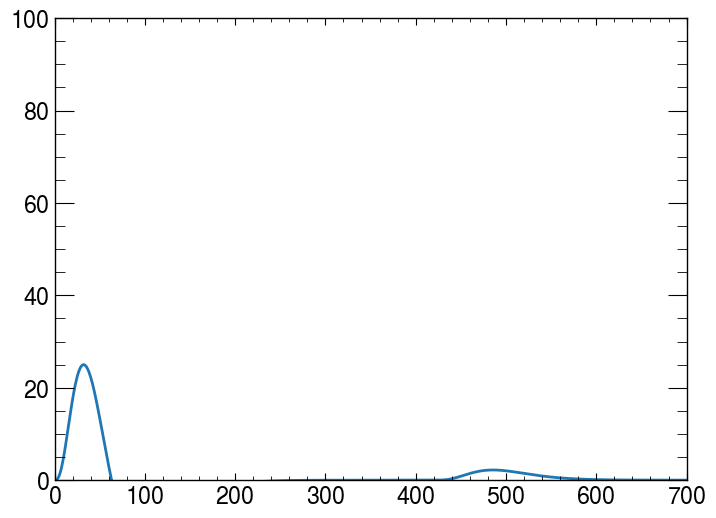

In [117]:
plt.plot(lartime[larminplottimeindex:],np.array(xtalkValues[larminplottimeindex:])*25)
plt.ylim([0,100])

OFCa=[-0.76791876  0.0766663   0.88403332  0.2575801  -0.45036097]
OFCb=[ -0.2267359  -18.89796581   1.19806999  10.93588074   5.07778683]


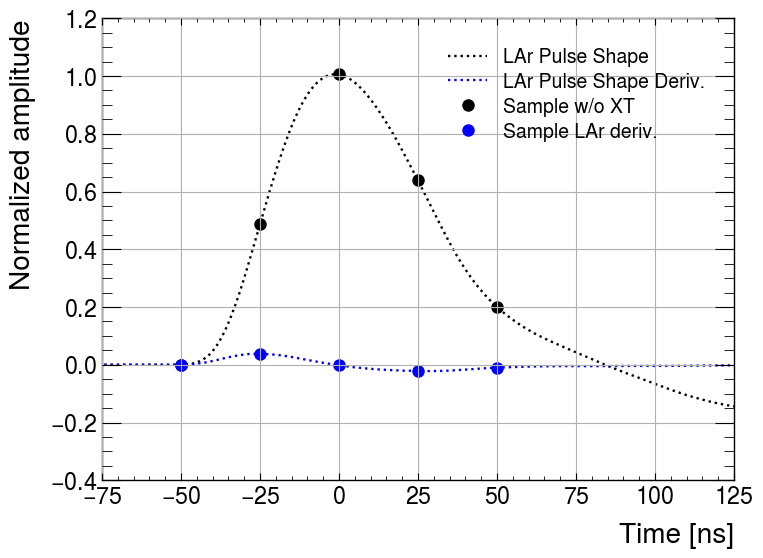

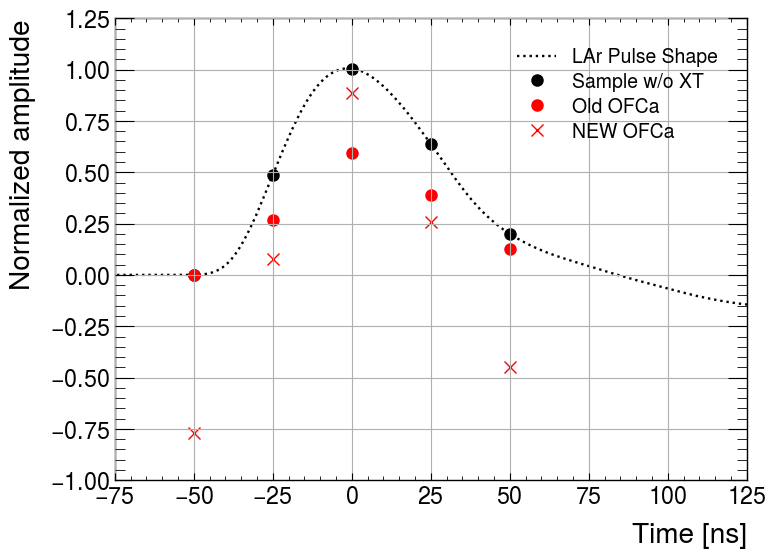

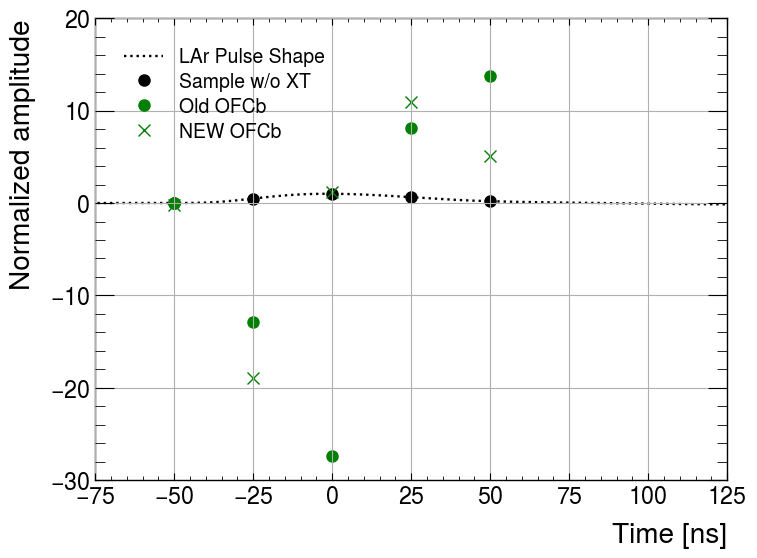

In [168]:
import OptimalFiltering as OF
import pandas as pd
from XTalkClusterModel import XTalk, XTalk_LAr

larshape            = pd.read_csv('/home/mhufnage/lorenzetti/fork_lzt_new/lorenzetti/geometry/ATLAS/data/pulseLar.dat', header=None,delim_whitespace=True)
tileshape           = pd.read_csv('/home/mhufnage/lorenzetti/fork_lzt_new/lorenzetti/geometry/ATLAS/data/pulseTile.dat', header=None,delim_whitespace=True)


# general parameters
minTimePlot         = 0.0
maxTimePlot         = 250.0
XT_inductiveAmp     = 0.011 # in percent
timeDelayCausal     = 50.0

# LAr
lartime     = larshape[0].values
lartimeSync = lartime+timeDelayCausal
laramp      = larshape[1].values
larDeriv    = np.gradient(laramp)

larshaperzeroindex      = [idx for idx,element in enumerate(lartime) if element == 0.0][0]
larminplottimeindex     = [idx for idx,element in enumerate(lartime) if element == minTimePlot][0]
larmaxplottimeindex     = [idx for idx,element in enumerate(lartime) if element == maxTimePlot][0]

# Digitization
samplerTimes        = [k-timeDelayCausal for k in [0.0, 25.0, 50.0, 75.0, 100.0]]
samplerIndexes      = []
xtalkValues = []
for tSampling in samplerTimes:
    tIndex = np.where(lartime == tSampling )[0][0]
    samplerIndexes.append( tIndex )
    xtalkValues.append( XTalk(tSampling) )
    

# print(lartime)

# OF
C   = np.identity(5)
g   = laramp[samplerIndexes]
dg  = larDeriv[samplerIndexes]
a,b = OF.generateOFCs_LAr(C, g, dg)
OFWeightsEnergy = [-0.0000853580,    0.265132,    0.594162,     0.389505,     0.124353] # on LZT
OFWeightsTime   = [-0.0000853580,   -12.870312690734863, -27.39136505126953, 8.075883865356445, 13.768877029418945] # on LZT
print("OFCa={}\nOFCb={}".format(a,b))

plt.figure()
# plt.plot(lartime, [k*XT_scale for k in XTamplitudeValues], label='{}% XT Cap. x{}'.format(int(XT_inductiveAmp*100),int(XT_scale)),color='blue',lw=1.7, ls='dotted')
# plt.plot(lartime, [k*XT_scale for k in XTDeriv], label='{}% XT Cap. Deriv. x{}'.format(int(XT_inductiveAmp*100),int(XT_scale)),color='gray',lw=1.7, ls='dotted')
plt.plot(lartime, laramp, label='LAr Pulse Shape', color='black',lw=1.7, ls='dotted')
plt.plot(lartime, larDeriv, label='LAr Pulse Shape Deriv.', color='blue',lw=1.7, ls='dotted')
# plt.plot(lartime, laramp+XTamplitudeValues, label='Resultant LAr readout', color='black',lw=1.7)
plt.plot(samplerTimes, laramp[samplerIndexes], marker='o', color='black',ls='none', label='Sample w/o XT')
plt.plot(samplerTimes, larDeriv[samplerIndexes], marker='o', color='blue',ls='none', label='Sample LAr deriv.')
# plt.plot(samplerTimes, np.array([laramp+XTamplitudeValues]).flatten()[samplerIndexes], marker='o', color='black',ls='none', label='Sample w/ XT')
plt.xlim([-75,125])
plt.xlabel('Time [ns]')
plt.ylabel('Normalized amplitude')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(lartime, laramp, label='LAr Pulse Shape', color='black',lw=1.7, ls='dotted')
plt.plot(samplerTimes, laramp[samplerIndexes], marker='o', color='black',ls='none', label='Sample w/o XT')
plt.plot(samplerTimes, OFWeightsEnergy, label='Old OFCa', marker='o', color='red',lw=1.7, ls='none')
# plt.plot(samplerTimes, OFWeightsTime, label='Old OFCb', marker='o', color='green',lw=1.7, ls='none')
plt.plot(samplerTimes, a.tolist(), label='NEW OFCa',marker='x', color='red',lw=1.7, ls='none')
# plt.plot(samplerTimes, b.tolist(), label='NEW OFCb',marker='x', color='green',lw=1.7, ls='none')
# plt.plot(samplerTimes, larDeriv[samplerIndexes], marker='o', color='green',ls='none', label='Sample LAr deriv.')
# plt.plot(samplerTimes, np.array([laramp+XTamplitudeValues]).flatten()[samplerIndexes], marker='o', color='black',ls='none', label='Sample w/ XT')
plt.xlim([-75,125])
plt.xlabel('Time [ns]')
plt.ylabel('Normalized amplitude')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(lartime, laramp, label='LAr Pulse Shape', color='black',lw=1.7, ls='dotted')
plt.plot(samplerTimes, laramp[samplerIndexes], marker='o', color='black',ls='none', label='Sample w/o XT')
# plt.plot(samplerTimes, OFWeightsEnergy, label='Old OFCa', marker='o', color='blue',lw=1.7, ls='none')
plt.plot(samplerTimes, OFWeightsTime, label='Old OFCb', marker='o', color='green',lw=1.7, ls='none')
# plt.plot(samplerTimes, a.tolist(), label='NEW OFCa',marker='x', color='blue',lw=1.7, ls='none')
plt.plot(samplerTimes, b.tolist(), label='NEW OFCb',marker='x', color='green',lw=1.7, ls='none')
# plt.plot(samplerTimes, larDeriv[samplerIndexes], marker='o', color='green',ls='none', label='Sample LAr deriv.')
# plt.plot(samplerTimes, np.array([laramp+XTamplitudeValues]).flatten()[samplerIndexes], marker='o', color='black',ls='none', label='Sample w/ XT')
plt.xlim([-75,125])
plt.xlabel('Time [ns]')
plt.ylabel('Normalized amplitude')
plt.legend()
plt.grid()
plt.show()


### Crosstalk neighbor influence (simulation)

In [198]:
# Crosstalk
plotsPath       = '/home/mhufnage/lorenzetti/Plots_lorenzetti/ML_data_validation/ClusterSimulation/'
aliasName       = 'timingBump_neighborCellSimulation'

# xtTiming    = []
# xtAmplitude = []
# timing = []
# amplitude = []
# neighborXTTiming = []
# neighborXTTimingInClus = []

neighborScaleRange  = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0, 30.0]
XT_inductiveAmpList = [0.5/100, 0.011, 2.0/100, 3.0/100, 4.0/100, 5.0/100] # in percent

var_labels = ['xtTiming','xtAmplitude','timing','amplitude','neighborXTTiming','neighborXTTimingInClus','neighborScaleRange']

resultsDict = {}
resultsDict = { str(key): {key1: [] for key1 in var_labels} for key in  XT_inductiveAmpList}


for XT_inductiveAmp in XT_inductiveAmpList:
    for scale in neighborScaleRange:
        XT_scale            = 1/XT_inductiveAmp/scale/2
        neighborScale       = scale#1.0 # times
        XTamplitudeValues   = []
        for t in lartimeSync:
            if t < 0.0:
                XTamplitudeValues.append(0)
            else:
                XTamplitudeValues.append(XTalk(t)*XT_inductiveAmp*(neighborScale))

        XTDeriv = np.gradient(XTamplitudeValues)
        
        neighborSamples = laramp*neighborScale
        neighborSamplesCorrected = neighborSamples-np.array(XTamplitudeValues)
        neighborSamplesNormalized = neighborSamplesCorrected/neighborScale
        neighborInCluster = neighborSamples-np.array(XTamplitudeValues)*8

        plt.figure(figsize=(12,9))
        plt.plot(lartime, [k*XT_scale for k in XTamplitudeValues], label='{:.2f}% XT Cap. x{}'.format((XT_inductiveAmp*100),int(XT_scale)),color='blue',lw=1.7, ls='dotted')
        # plt.plot(lartime, [k*XT_scale for k in XTDeriv], label='{}% XT Cap. Deriv. x{}'.format(int(XT_inductiveAmp*100),int(XT_scale)),color='gray',lw=1.7, ls='dotted')
        plt.plot(lartime, laramp, label='LAr Cell', color='red',lw=1.7, ls='dotted')
        plt.plot(samplerTimes, laramp[samplerIndexes], marker='o', color='red',ls='none', label='Sample w/o XT')
        plt.plot(lartime, neighborSamples/neighborScale*1.2, label='LAr Cell Neighbor ({:.1f}x higher in charge, norm.)'.format((neighborScale)), color='green',lw=1.7, ls='dotted')
        # plt.plot(lartime, neighborSamplesNormalized*1.2, label='LAr Cell Neighbor Readout (normalized x1.2)'.format(int(neighborScale)), color='green',lw=1.7)
        # plt.plot(samplerTimes, neighborSamplesNormalized.flatten()[samplerIndexes]*1.2, marker='o', color='green',ls='none', label='Neighbor Sample w/ XT')
        # plt.plot(lartime, larDeriv, label='LAr Pulse Shape Deriv.', color='green',lw=1.7, ls='dotted')
        plt.plot(lartime, laramp+XTamplitudeValues, label='LAr Cell readout', color='black',lw=1.7)
        plt.plot(samplerTimes, np.array([laramp+XTamplitudeValues]).flatten()[samplerIndexes], marker='o', color='black',ls='none', label='Sample w/ XT')
        # plt.plot(samplerTimes, larDeriv[samplerIndexes], marker='o', color='green',ls='none', label='Sample LAr deriv.')
        plt.xlim([-75,125])
        plt.xlabel('Time [ns]')
        plt.ylabel('Normalized amplitude')
        plt.legend()
        plt.grid()
        plt.savefig(plotsPath+'{}_indAmp{:.1f}_neighborScale{:.1f}.png'.format(aliasName, XT_inductiveAmp*100, scale))
        # plt.show()
        plt.close()
        
        plt.figure(figsize=(12,9))
        # plt.plot(lartime, [k*XT_scale for k in XTamplitudeValues], label='{:.2f}% XT Cap. x{}'.format((XT_inductiveAmp*100),int(XT_scale)),color='blue',lw=1.7, ls='dotted')
        # plt.plot(lartime, [k*XT_scale for k in XTDeriv], label='{}% XT Cap. Deriv. x{}'.format(int(XT_inductiveAmp*100),int(XT_scale)),color='gray',lw=1.7, ls='dotted')
        # plt.plot(lartime, laramp, label='LAr Cell', color='red',lw=1.7, ls='dotted')
        # plt.plot(samplerTimes, laramp[samplerIndexes], marker='o', color='red',ls='none', label='Sample w/o XT')
        plt.plot(lartime, neighborSamples/neighborScale, label='LAr Cell Neighbor ({:.1f}x higher in charge, norm.)'.format((neighborScale)), color='green',lw=1.7, ls='dotted')
        plt.plot(lartime, neighborSamplesNormalized, label='LAr Cell Neighbor Readout', color='green',lw=1.7)
        plt.plot(samplerTimes, neighborSamplesNormalized.flatten()[samplerIndexes], marker='o', color='green',ls='none', label='Neighbor Sample w/ XT')
        # plt.plot(lartime, larDeriv, label='LAr Pulse Shape Deriv.', color='green',lw=1.7, ls='dotted')
        # plt.plot(lartime, laramp+XTamplitudeValues, label='LAr Cell readout', color='black',lw=1.7)
        # plt.plot(samplerTimes, np.array([laramp+XTamplitudeValues]).flatten()[samplerIndexes], marker='o', color='black',ls='none', label='Sample w/ XT')
        # plt.plot(samplerTimes, larDeriv[samplerIndexes], marker='o', color='green',ls='none', label='Sample LAr deriv.')
        plt.xlim([-75,125])
        plt.xlabel('Time [ns]')
        plt.ylabel('Normalized amplitude')
        # plt.title()
        plt.legend()
        plt.grid()
        plt.savefig(plotsPath+'{}_readoutOnly_indAmp{:.1f}_neighborScale{:.1f}.png'.format(aliasName, XT_inductiveAmp*100, scale))
        # plt.show()
        plt.close()

        # ----------------------------------------------------------------

        amp     = np.dot(g, a)
        tau     = np.dot(g, b)/amp
        ampxt   = np.dot(np.array([laramp+XTamplitudeValues]).flatten()[samplerIndexes],a)
        ampxtneighbor = np.dot(neighborSamplesCorrected.flatten()[samplerIndexes],a)
        ampxtneighborInClus = np.dot(neighborInCluster.flatten()[samplerIndexes],a)
        
        tauxt   = np.dot(np.array([laramp+XTamplitudeValues]).flatten()[samplerIndexes],b)/ampxt
        tauxtneighbor   = np.dot(np.array(neighborSamplesCorrected).flatten()[samplerIndexes],b)/ampxtneighbor
        tauxtneighborInClus = np.dot(np.array(neighborInCluster).flatten()[samplerIndexes],b)/ampxtneighborInClus
        
        resultsDict[str(XT_inductiveAmp)]['amplitude'].append(amp)
        resultsDict[str(XT_inductiveAmp)]['timing'].append(tau)
        resultsDict[str(XT_inductiveAmp)]['xtTiming'].append(tauxt)
        resultsDict[str(XT_inductiveAmp)]['xtAmplitude'].append(ampxt)
        resultsDict[str(XT_inductiveAmp)]['neighborXTTiming'].append(tauxtneighbor)
        resultsDict[str(XT_inductiveAmp)]['neighborXTTimingInClus'].append(tauxtneighborInClus)

    # print('Scale {}x -> A = {:.3f} ADC\ntau = {:.3f} ns\nA_xt = {:.3f} ADC\ntau_xt = {:.3f} ns, neighbor_xt_tau = {:.3f}, neighbor_inClus_xt_tau={:.3f}'.format(scale,amp, tau, ampxt, tauxt, tauxtneighbor, tauxtneighborInClus))

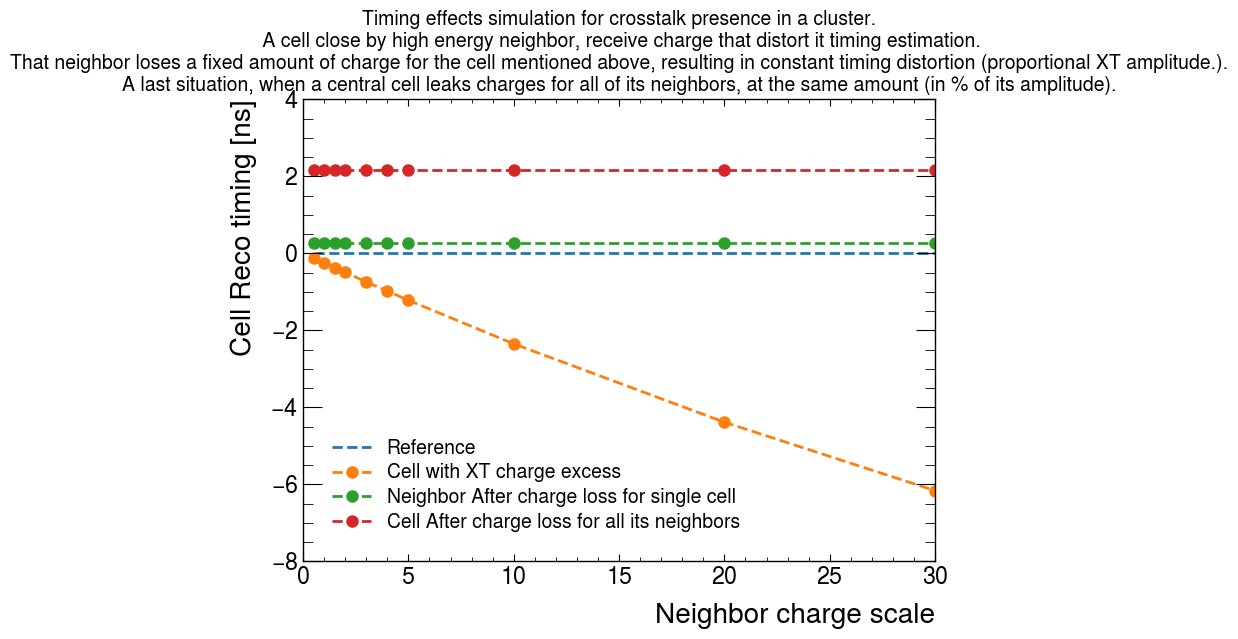

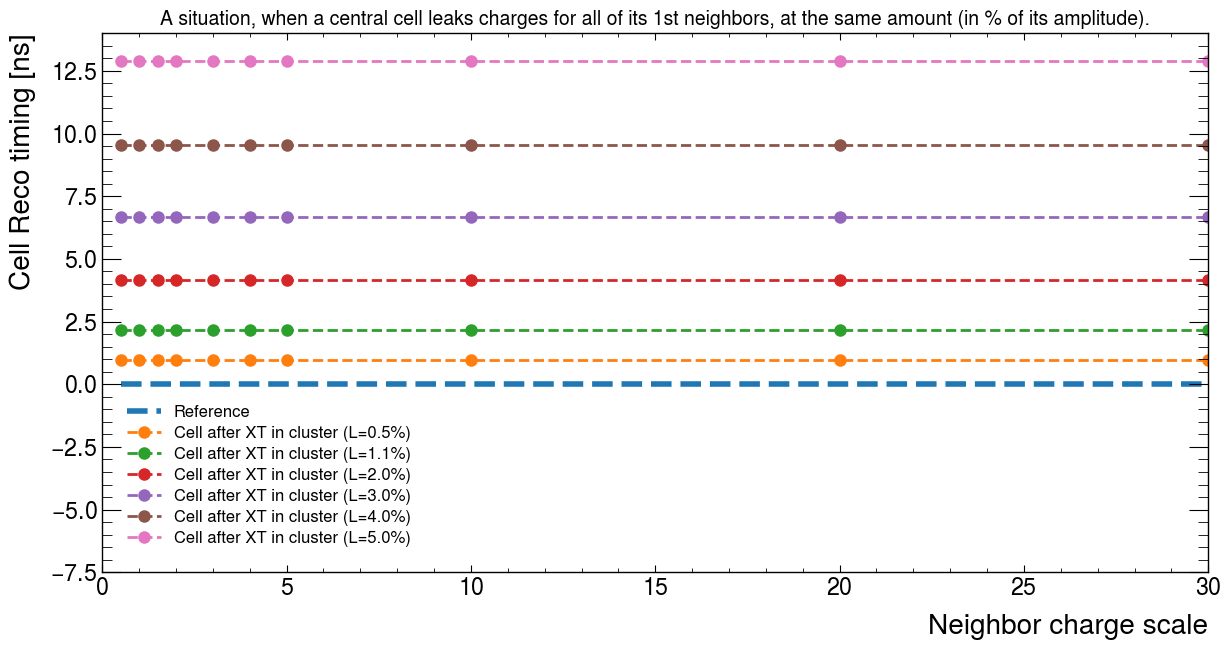

In [212]:
plt.figure()
plt.plot(neighborScaleRange, resultsDict['0.011']['timing'],'--', label='Reference')
plt.plot(neighborScaleRange, resultsDict['0.011']['xtTiming'],'--o', label='Cell with XT charge excess')
plt.plot(neighborScaleRange, resultsDict['0.011']['neighborXTTiming'],'--o', label='Neighbor After charge loss for single cell')
plt.plot(neighborScaleRange, resultsDict['0.011']['neighborXTTimingInClus'],'--o', label='Cell After charge loss for all its neighbors')
plt.ylabel('Cell Reco timing [ns]')
plt.xlabel('Neighbor charge scale')
plt.title('Timing effects simulation for crosstalk presence in a cluster.\n A cell close by high energy neighbor, receive charge that distort it timing estimation.\nThat neighbor loses a fixed amount of charge for the cell mentioned above, resulting in constant timing distortion (proportional XT amplitude.).\nA last situation, when a central cell leaks charges for all of its neighbors, at the same amount (in % of its amplitude).',fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(14,7))
plt.plot(neighborScaleRange, resultsDict['0.011']['timing'],'--',lw=4, label='Reference')
# plt.plot(neighborScaleRange, resultsDict['0.011']['xtTiming'],'--o', label='Cell with XT charge excess')
# plt.plot(neighborScaleRange, resultsDict['0.011']['neighborXTTiming'],'--o', label='Neighbor After charge loss for single cell')
for xtIndAmp in XT_inductiveAmpList:
    plt.plot(neighborScaleRange, resultsDict[str(xtIndAmp)]['neighborXTTimingInClus'],'--o', label='Cell after XT in cluster (L={:.1f}%)'.format(xtIndAmp*100))
plt.ylabel('Cell Reco timing [ns]')
plt.xlabel('Neighbor charge scale')
plt.ylim([-7.5,14])
plt.title('A situation, when a central cell leaks charges for all of its 1st neighbors, at the same amount (in % of its amplitude).',fontsize=14)
plt.legend(fontsize='12')
plt.show()

In [200]:
resultsDict.keys()

dict_keys(['0.005', '0.011', '0.02', '0.03', '0.04', '0.05'])

### Save OFCs

In [ ]:
import json

# json.dumps(a)
out_file = open("ofcs_lzt.json", "w") 

ofcs = {}
ofcs['OFCa'] = a.tolist()
ofcs['OFCb'] = b.tolist()
json.dump(ofcs, out_file, indent = 6) 
  
out_file.close() 

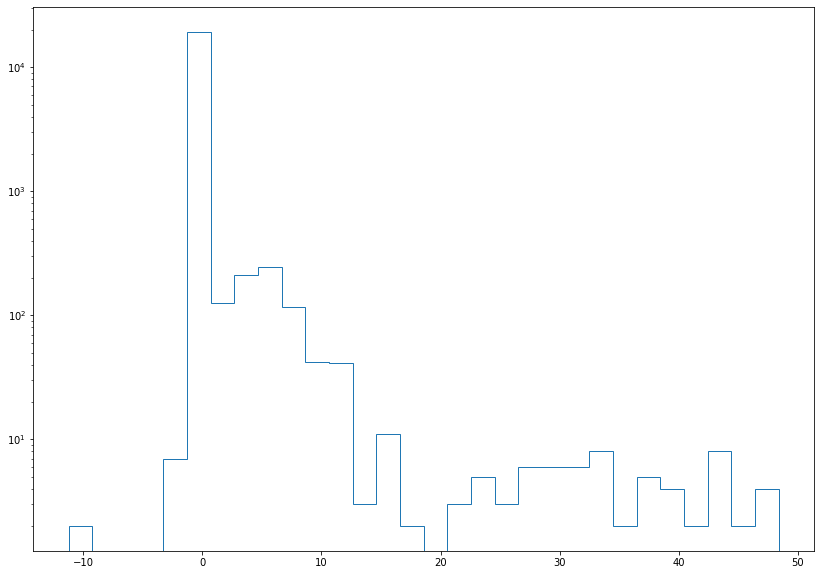

In [6]:
# plt.hist(clus_size)
plt.figure(figsize=(14,10))
theEvt = 6
pulse = 3

# c, xbins = np.histogram(np.concatenate(sig_dict['cell_pulse'][theEvt]).flatten(),bins=150)
# plt.hist((np.concatenate(sig_dict['cell_pulse'][theEvt]).flatten()),histtype='stepfilled',alpha=0.4, bins=xbins)
# plt.hist((np.concatenate(sig_dict['xtcell_pulse'][theEvt]).flatten()),histtype='step', bins=xbins)
# # plt.hist(((sig_dict['cluster_eratio'])),histtype='step', bins=40)
# # plt.hist(((sig_dict['xtcluster_eratio'])),histtype='stepfilled', alpha=0.4, bins=40)
# plt.yscale('log')
# plt.show()

diffPulse = []
for theEvt in range(0, len(sig_dict['cell_pulse'])):
    for pulse in range(0,len(sig_dict['cell_tof'][theEvt])):
        # if sig_dict['cell_e'][theEvt][pulse] > 120:
        normalPulse = np.array(sig_dict['cell_tau'][theEvt][pulse], dtype=float)
        xtPulse     = np.array(sig_dict['xtcell_tau'][theEvt][pulse], dtype=float)
        diffPulse.append( (normalPulse-xtPulse) )
            # plt.figure(figsize=(10,7))
            # plt.plot(np.arange(1,6),sig_dict['cell_pulse'][theEvt][pulse], 'o',ms=20)
            # plt.plot(np.arange(1,6),sig_dict['xtcell_pulse'][theEvt][pulse], 'x',ms=20)
            # plt.show()
plt.hist(diffPulse,histtype='step', bins=30)
# plt.hist(((sig_dict['cluster_eratio'])),histtype='step', bins=40)
# plt.hist(((sig_dict['xtcluster_eratio'])),histtype='stepfilled', alpha=0.4, bins=40)
plt.yscale('log')
plt.show()
# plt.figure(figsize=(14,10))
# plt.hist(np.concatenate(sig_dict['cell_sampling']).flatten(),histtype='stepfilled',alpha=0.4)

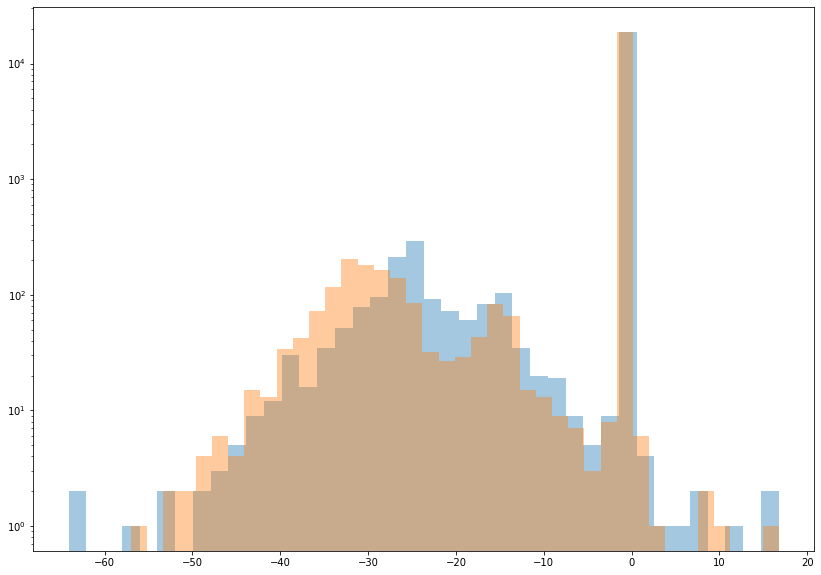

In [9]:
plt.figure(figsize=(14,10))
plt.hist(np.concatenate(sig_dict['cell_tau']).flatten(),histtype='stepfilled',alpha=0.4, bins=40)
plt.hist(np.concatenate(sig_dict['xtcell_tau']).flatten(),histtype='stepfilled',alpha=0.4, bins=40)
plt.yscale('log')
plt.show()

## 5.2 - Uproot code

In [7]:
matplotlib.use('Agg') #CHANGES THE MATPLOTLIB BACKEND FOR LOOP PLOTS
# matplotlib.use('module://ipykernel.pylab.backend_inline')  # show plots
# pythia=pythia
# atlas=atlas

aliasName               = 'vertexAnalysis_zee'
PythiaVertexFileName    = '/data/atlas/mhufnage/lzt_zee/Zee10000Evts_thesisData_001/ESD/Zee.ESD.root.0'
ATLASVertexFileName     = '/data/atlas/mhufnage/lzt_zee/Zee10000Evts_thesisData_002/ESD/Zee.ESD.root.0'

# query layer
nbins       = 70
eta         = 1.4
layerEcuts  = [90,26,60,40] #MeV
layers      = [CaloSampling.PSB, CaloSampling.EMB1, caloSampling, CaloSampling.EMB3]
layersStr   = ['PSB','EMB1','EMB2','EMB3']

if PythiaVertexFileName.split('/')[-1].split('.')[1] == 'AOD':
    treeName = 'physics'
if PythiaVertexFileName.split('/')[-1].split('.')[1] == 'ESD':
    treeName = 'CollectionTree'

# branchName      = 'CaloDetDescriptor_Cells'
for cnt in ['Cells', 'XTCells']:
    cntName         = 'CaloDetDescriptorContainer_{}'.format(cnt)
    print("Reading {}...".format(cntName))
    uprootLibrary   = 'ak'#'pd'
    MeVToGeV        = 1/1000
    psTons          = 1/1000

    pythiaTree      = uproot.open(PythiaVertexFileName+":{}/{}".format(treeName, cntName))
    atlasTree       = uproot.open(ATLASVertexFileName+":{}/{}".format(treeName, cntName))

    pythiaCells     = pythiaTree.arrays(library=uprootLibrary) #using pandas
    atlasCells      = atlasTree.arrays(library=uprootLibrary) #using pandas

    # rename 
    newColNames = {}
    for key in pythiaCells.keys():
        newKey = key.split('.')[1]
        newColNames[key] = newKey
    pythiaCells = pythiaCells.rename(columns=newColNames,errors='raise')
    atlasCells  = atlasCells.rename(columns=newColNames,errors='raise')

    # change unit
    pythiaCells['e']       = pythiaCells['e']*MeVToGeV
    pythiaCells['edep']    = pythiaCells['edep']*MeVToGeV
    # pythiaCells['tof']     = pythiaCells['tof']*psTons
    # pythiaCells['tau']     = pythiaCells['tau']*psTons
    atlasCells['e']    = atlasCells['e']*MeVToGeV
    atlasCells['edep'] = atlasCells['edep']*MeVToGeV
    # atlasCells['tau']  = atlasCells['tau']*psTons

    # new variables
    pythiaCells['e_error']      = pythiaCells['edep'] - pythiaCells['e']
    pythiaCells['tau_error']    = pythiaCells['tof'] - pythiaCells['tau']
    atlasCells['e_error']       = atlasCells['edep'] - atlasCells['e']
    atlasCells['tau_error']     = atlasCells['tof'] - atlasCells['tau']

    for layIdx, layer, cellEcut in zip(range(0,len(layers)), layers, layerEcuts):
        rule = str('sampling == {} and abs(eta) < {} and edep > {}'.format(layer,eta,cellEcut*MeVToGeV))

        ## Energy: Reco and Truth
        plt.figure()
        hist, bin_edges = np.histogram(pythiaCells.query(rule).e,bins=nbins)
        plt.hist(pythiaCells.query(rule).e,bins=bin_edges, histtype='step',label="Pythia vertex", color='blue') 
        plt.hist(atlasCells.query(rule).e,bins=bin_edges, histtype='step',label="ATLAS vertex",color='red')
        # lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$_{truth}>${} MeV, {}'.format(eta,cellEcut,cnt))
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {},'.format(eta)+r' e$_{truth}>$'+r'{} MeV, {}'.format(cellEcut,cnt))
        plt.xlabel('Reconstructed Energy [GeV]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}/{}_{}_ene_{}_eta{}.png'.format(aliasName, aliasName,cnt,layersStr[layIdx],eta))
        # plt.show()
        plt.close()

        plt.figure()
        hist, bin_edges = np.histogram(pythiaCells.query(rule).edep,bins=nbins)
        plt.hist(pythiaCells.query(rule).edep,bins=bin_edges, histtype='step',label="Pythia vertex", color='blue') 
        plt.hist(atlasCells.query(rule).edep,bins=bin_edges, histtype='step',label="ATLAS vertex",color='red')
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {},'.format(eta)+r' e$_{truth}>$'+r'{} MeV, {}'.format(cellEcut,cnt))
        plt.xlabel('Truth Energy [GeV]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        # plt.show()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}/{}_{}_edep_{}_eta{}.png'.format(aliasName, aliasName,cnt,layersStr[layIdx],eta))
        plt.close()

        ## Time: Reco and Truth
        plt.figure()
        hist, bin_edges = np.histogram(pythiaCells.query(rule).tau,bins=nbins)
        plt.hist(pythiaCells.query(rule).tau,bins=bin_edges, histtype='step',label="Pythia vertex", color='blue') 
        plt.hist(atlasCells.query(rule).tau,bins=bin_edges, histtype='step',label="ATLAS vertex",color='red')
        # lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {}, e$_{truth}>${} MeV, {}'.format(eta,cellEcut,cnt))
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {},'.format(eta)+r' e$_{truth}>$'+r'{} MeV, {}'.format(cellEcut,cnt))
        plt.xlabel('Reconstructed Time [ns]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}/{}_{}_tau_{}_eta{}.png'.format(aliasName, aliasName,cnt,layersStr[layIdx],eta))
        # plt.show()
        plt.close()

        plt.figure()
        hist, bin_edges = np.histogram(pythiaCells.query(rule).tof,bins=nbins)
        plt.hist(pythiaCells.query(rule).tof,bins=bin_edges, histtype='step',label="Pythia vertex", color='blue') 
        plt.hist(atlasCells.query(rule).tof,bins=bin_edges, histtype='step',label="ATLAS vertex",color='red')
        lorenzettiText(subText='      Internal - {}'.format(layersStr[layIdx])+r' and |$\eta$|$<$ {},'.format(eta)+r' e$_{truth}>$'+r'{} MeV, {}'.format(cellEcut,cnt))
        plt.xlabel('Truth Time [ns]')
        plt.ylabel('Counts')
        plt.yscale('log')
        plt.legend()
        # plt.show()
        plt.savefig('/home/mhufnage/lorenzetti/Plots_lorenzetti/{}/{}_{}_tof_{}_eta{}.png'.format(aliasName, aliasName,cnt,layersStr[layIdx],eta))
        plt.close()
        

NameError: name 'matplotlib' is not defined

In [12]:
layerEcuts  = [90,26,60,40]/1000

SyntaxError: invalid syntax (<ipython-input-12-f2c6bd44737b>, line 1)